In [1]:

    # load libraries
library(ggplot2) 
library(readr) 
library(dplyr)
library(RColorBrewer)
library(reshape2)
library(gridExtra)
library(scales)
library(tidyr)
library(purrr)
library(stringr)
library(ggrepel)
library(pander)
library(e1071)
library(tree)
library(MASS)
library(tidyverse)
library(ggrepel)
library(viridis)
library(ggcorrplot)

library(hrbrthemes)
library(gganimate)
library(gapminder)
library(babynames)
library(ggthemes)
library(cowplot)



colors = brewer.pal(8, "Blues")


# Lets tak a look at the overall sumary
str(data)

game=read.csv("C:/datasets/all_games.csv")

options(repr.plot.width = 20, repr.plot.height = 8)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'scales'


The following object is masked from 'package:readr':

    col_factor



Attaching package: 'tidyr'


The following object is masked from 'package:reshape2':

    smiths



Attaching package: 'purrr'


The following object is masked from 'package:scales':

    discard



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.6     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x scales::col_factor() masks readr::col_factor()
x gridExtra::combine() masks dplyr::combine()
x pur

function (..., list = character(), package = NULL, lib.loc = NULL, verbose = getOption("verbose"), 
    envir = .GlobalEnv, overwrite = TRUE)  


In [2]:
str(game)

'data.frame':	18800 obs. of  6 variables:
 $ name        : chr  "The Legend of Zelda: Ocarina of Time" "Tony Hawk's Pro Skater 2" "Grand Theft Auto IV" "SoulCalibur" ...
 $ platform    : chr  " Nintendo 64" " PlayStation" " PlayStation 3" " Dreamcast" ...
 $ release_date: chr  "November 23, 1998" "September 20, 2000" "April 29, 2008" "September 8, 1999" ...
 $ summary     : chr  "As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain "| __truncated__ "As most major publishers' development efforts shift to any number of next-generation platforms, Tony Hawk 2 wil"| __truncated__ "[Metacritic's 2008 PS3 Game of the Year; Also known as \"GTA IV\"] What does the American Dream mean today? For"| __truncated__ "This is a tale of souls and swords, transcending the world and all its history, told for all eternity... The gr"| __truncated__ ...
 $ meta_score  : int  99 98 98 98 98 97 97 97 97 97 ...
 $ user_review : chr  "9.1" "7.4" "7.7" "8

#### What do the first few rows of the data look like?

In [3]:
head(game, 10)

name                                 platform       release_date      
1  The Legend of Zelda: Ocarina of Time  Nintendo 64   November 23, 1998 
2  Tony Hawk's Pro Skater 2              PlayStation   September 20, 2000
3  Grand Theft Auto IV                   PlayStation 3 April 29, 2008    
4  SoulCalibur                           Dreamcast     September 8, 1999 
5  Grand Theft Auto IV                   Xbox 360      April 29, 2008    
6  Super Mario Galaxy                    Wii           November 12, 2007 
7  Super Mario Galaxy 2                  Wii           May 23, 2010      
8  Red Dead Redemption 2                 Xbox One      October 26, 2018  
9  Grand Theft Auto V                    Xbox One      November 18, 2014 
10 Grand Theft Auto V                    PlayStation 3 September 17, 2013
   summary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1  As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
2  As most major publishers' development efforts shift to any number of next-generation platforms, Tony Hawk 2 will likely stand as one of the last truly fantastic games to be released on the PlayStation.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### Summary of the dataset

In [4]:
#summary is for summarize the full dataset
summary(game)

     name             platform         release_date         summary         
 Length:18800       Length:18800       Length:18800       Length:18800      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   meta_score    user_review       
 Min.   :20.00   Length:18800      
 1st Qu.:64.00   Class :character  
 Median :72.00   Mode  :character  
 Mean   :70.65                     
 3rd Qu.:80.00                     
 Max.   :99.00                     

## Games Released Per Year 

In [5]:
game = filter(game,!is.na(Year))
year_sales = game %>%  group_by(Year) %>% summarise(Count = n()) 

ggplot(data=year_sales,aes(x=Year,y=Count,fill=Count)) + 
geom_bar(colour='black',stat='identity', width=.8, position = position_dodge(width = .25)) + 
theme_bw()+
ggtitle('Release per year') +
theme(axis.text.x = element_text(size=20,angle=45,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) + 
scale_fill_distiller(palette = 'YlGnBu')




ERROR: [1m[33mError[39m in [1m[1m`filter()`:[22m
[1m[22m[33m![39m Problem while computing `..1 = !is.na(Year)`.
[1mCaused by error:[22m
[33m![39m object 'Year' not found


## Genre Popularity over the Years

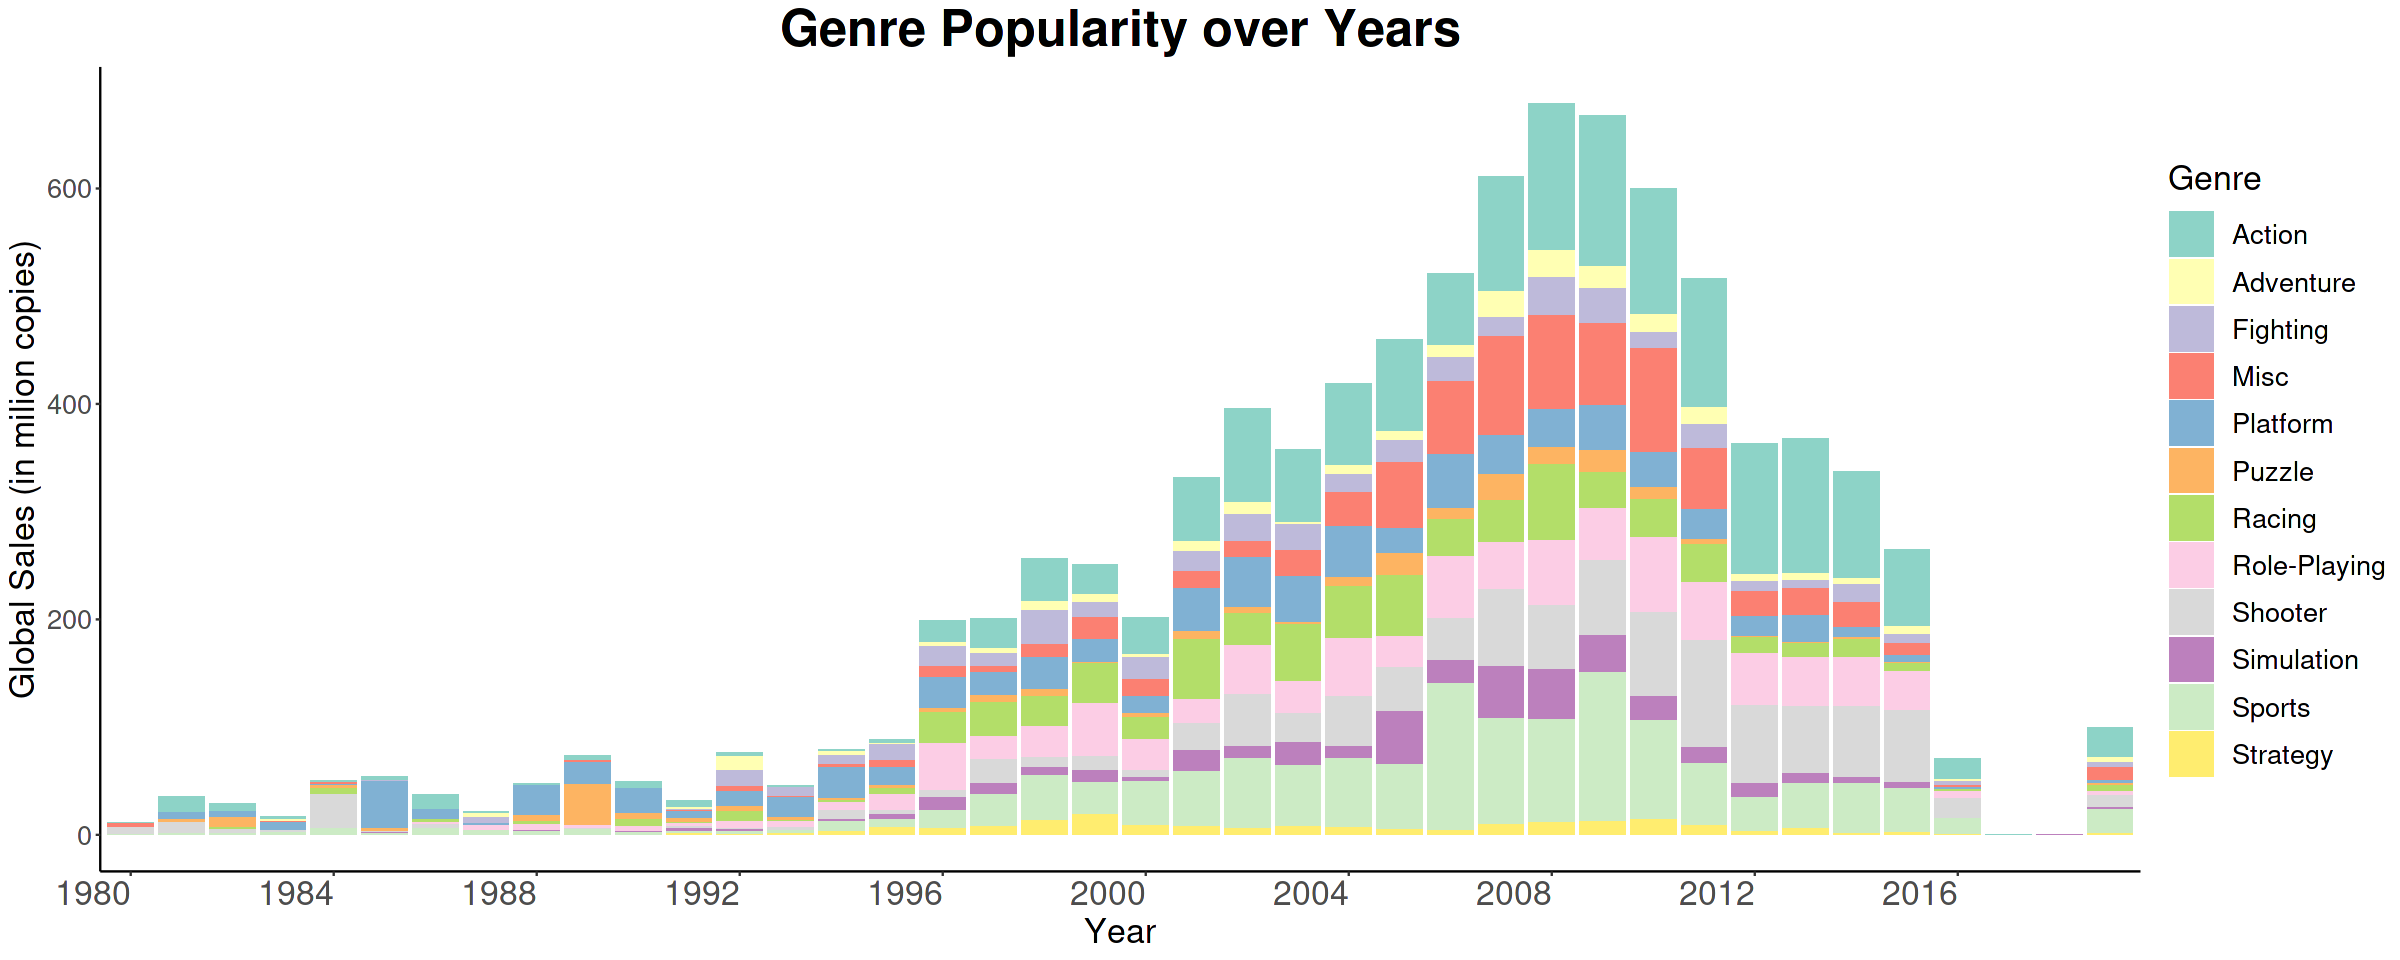

In [ ]:
game %>% 
  ggplot(aes(x = Year, y = Global_Sales, fill = Genre)) +
  geom_bar(stat = "identity") +
  labs(title = "Genre Popularity over Years", x = "Year", y = "Global Sales (in milion copies)") +
  scale_x_discrete(breaks = as.character(seq(from = 1980, to = 2016, by = 4))) +
  theme_classic() +
  theme(axis.text.x = element_text(size=20,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) +
  scale_fill_brewer(palette = "Set3")



## Games Released On Platform per year

`summarise()` has grouped output by 'Platform'. You can override using the `.groups` argument.



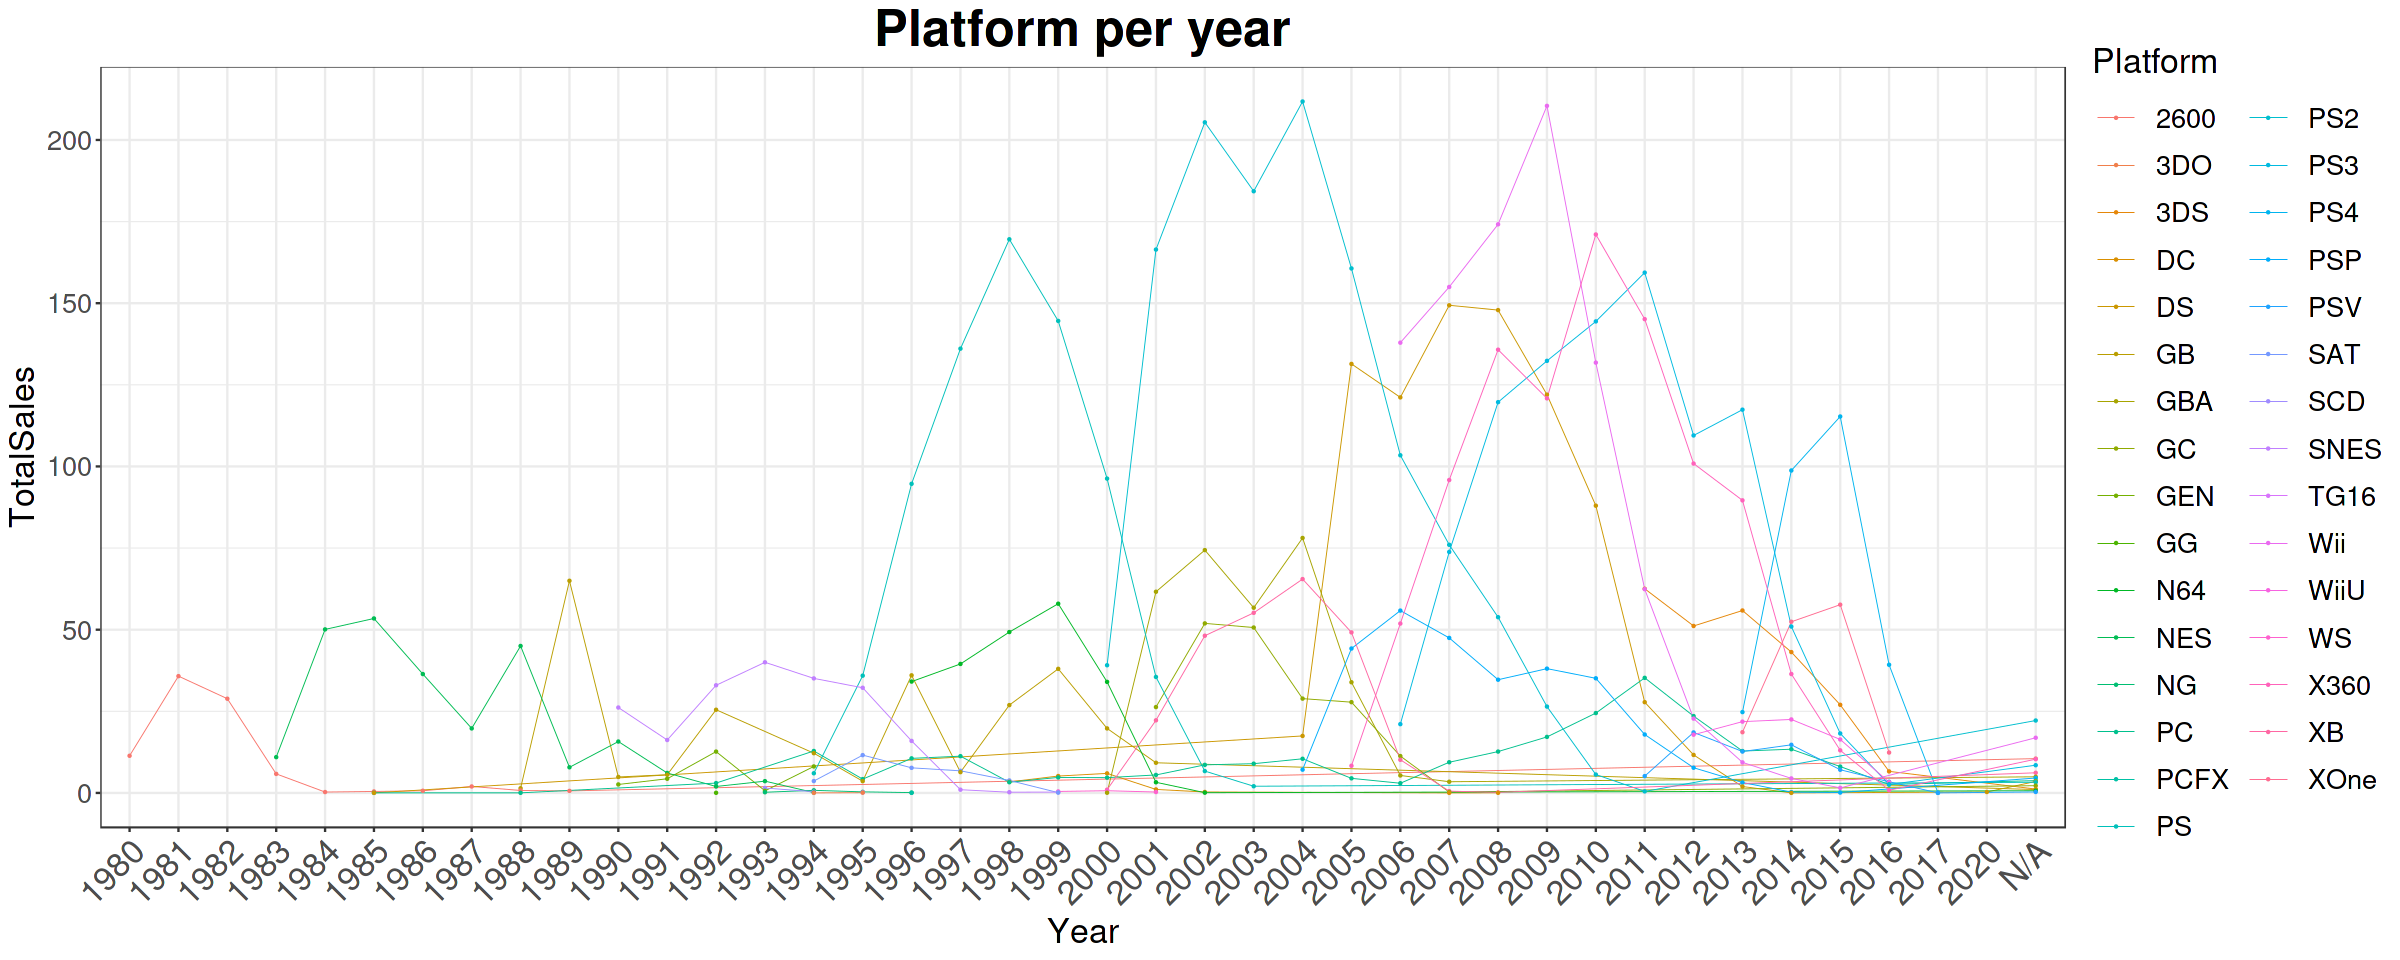

In [ ]:
platform = game %>% group_by(Platform,Year) %>%
           summarize(TotalSales = sum(Global_Sales)) %>%
           arrange(desc(TotalSales))

ggplot(data=platform,aes(x = Year,y=TotalSales,colour=Platform,group=Platform)) + 
geom_line(size=.2) + 
geom_point(size=.2)+
ggtitle('Platform per year') + 
theme_bw()+
theme(axis.text.x = element_text(size=20,angle=45,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust=0.5),
      text = element_text(size = 20),
        legend.key.size = unit(1, 'cm'))



## Games Released In Genre per year

`summarise()` has grouped output by 'Genre'. You can override using the `.groups` argument.



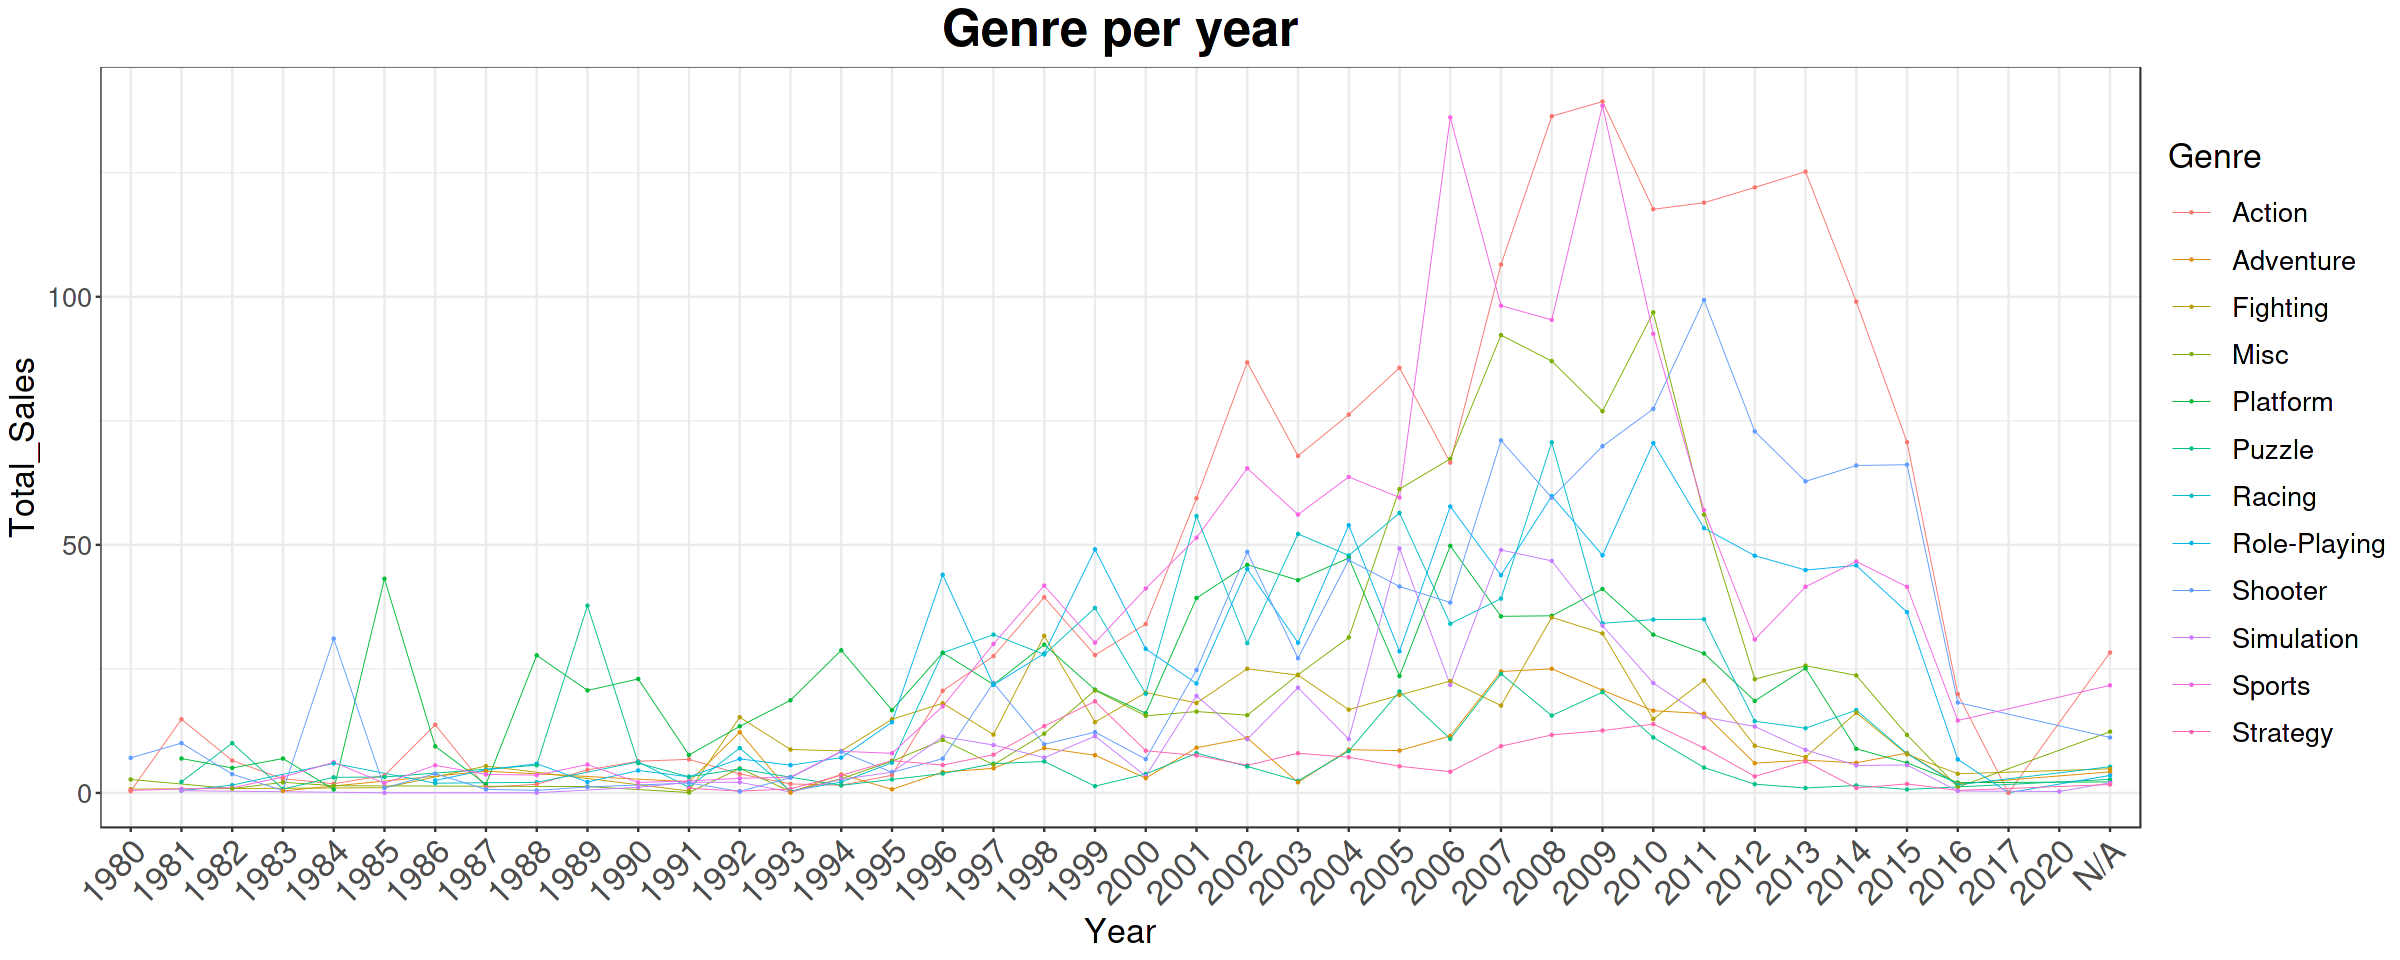

In [ ]:
genre = game %>% group_by(Genre,Year) %>%
        summarise(Total_Sales = sum(Global_Sales)) %>%
        arrange(desc(Total_Sales))
ggplot(data=genre,aes(x = Year, y = Total_Sales, colour=Genre, group=Genre)) + 
geom_line(size=.2) + 
geom_point(size=.2)+
ggtitle('Genre per year') + 
theme_bw() + 
theme(axis.text.x = element_text(size=20,angle=45,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm'))



## Platform Count

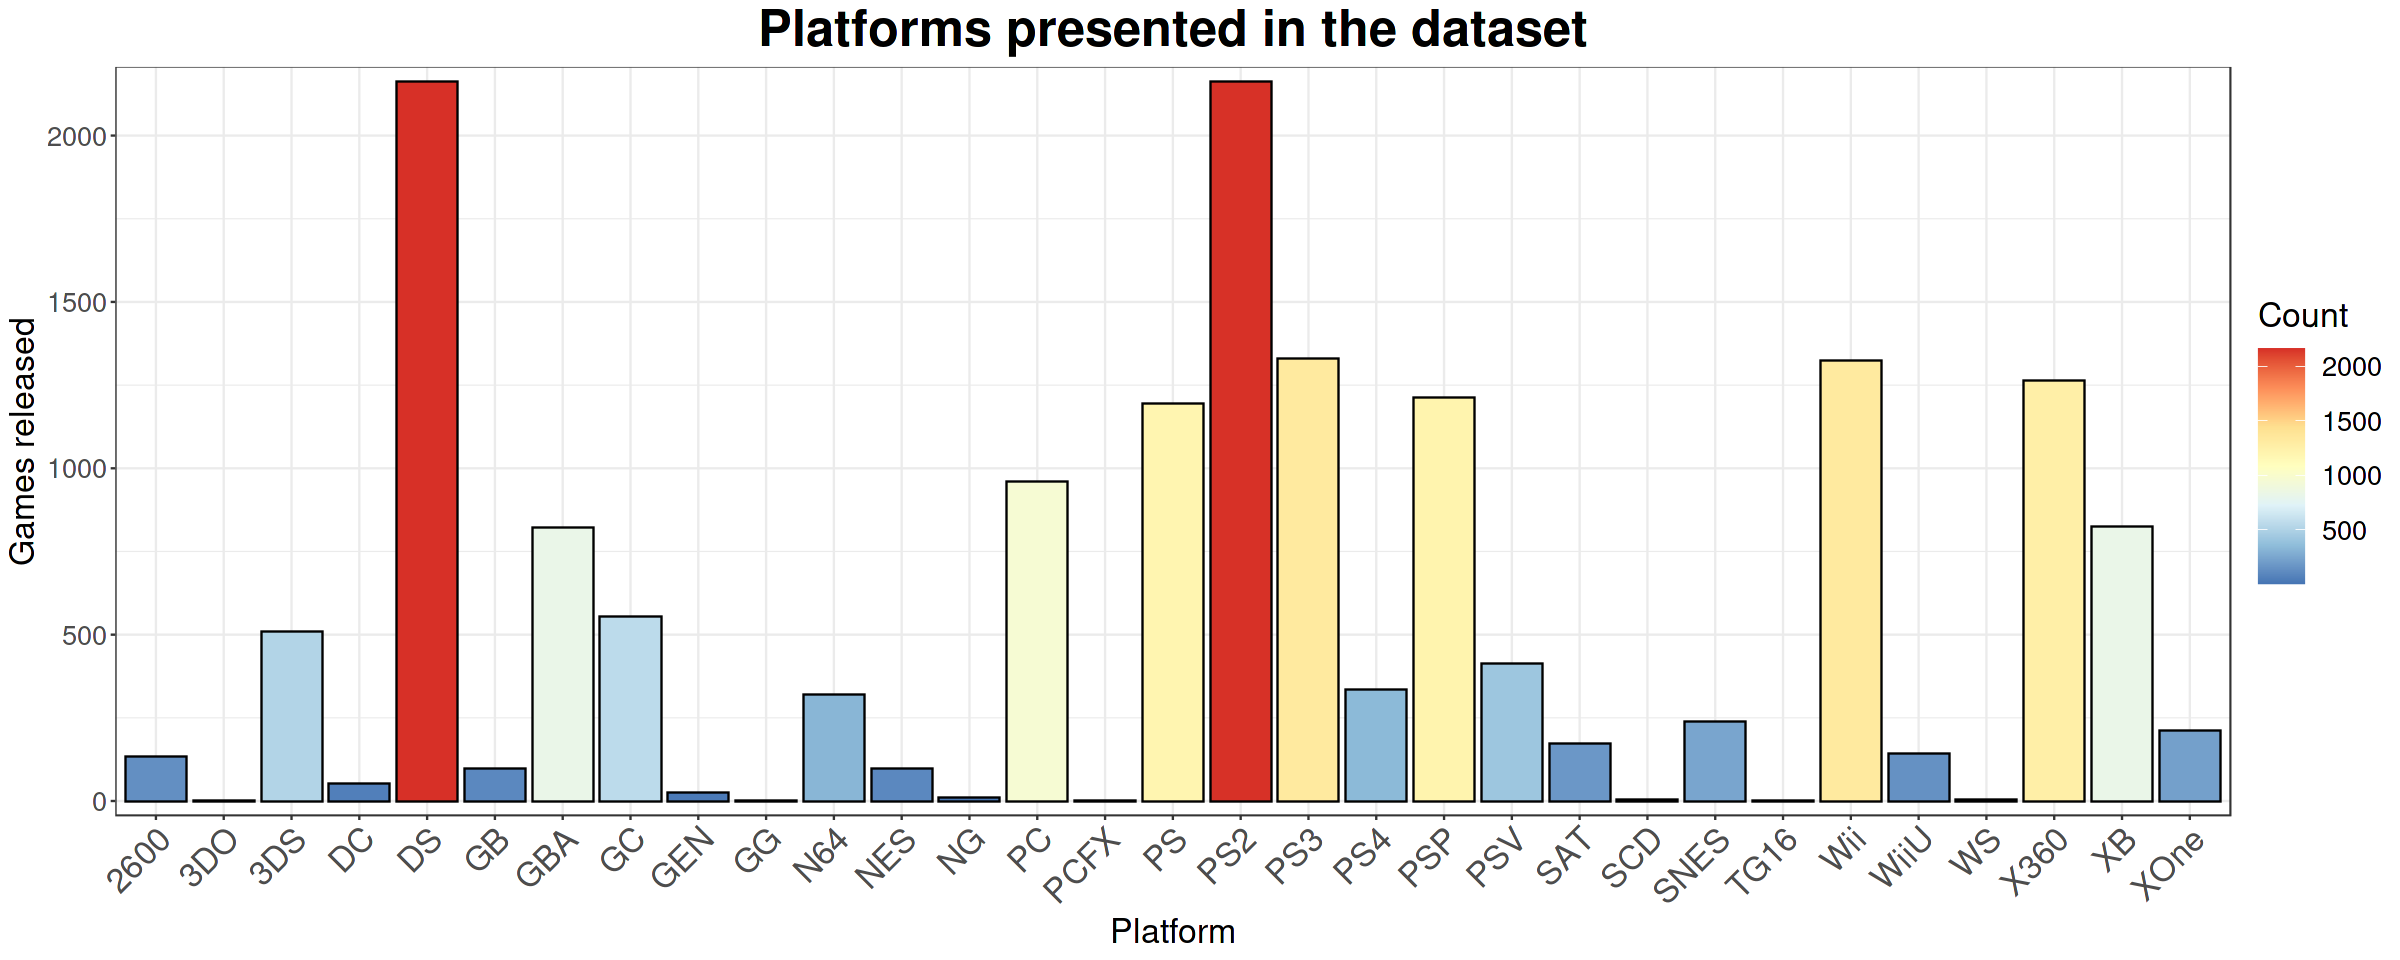

In [ ]:
by_platform = game %>% group_by(Platform) %>% summarise(Count = n())

p1 = ggplot(aes(x = Platform, y = Count, fill = Count), data = by_platform) + 
geom_bar(, colour = "black", stat = "identity") + 
theme_bw() + 
theme(axis.text.x = element_text(size=20,angle = 45, hjust = 1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),
      text = element_text(size = 20),
      legend.key.size = unit(1, 'cm')) + 
ggtitle("Platforms presented in the dataset") + 
scale_fill_distiller(palette = "RdYlBu") +
scale_y_continuous(expand = c(.02, .02)) + 
ylab("Games released")
grid.arrange(p1,  ncol = 1)




## Platform Sales

Using Platform as id variables



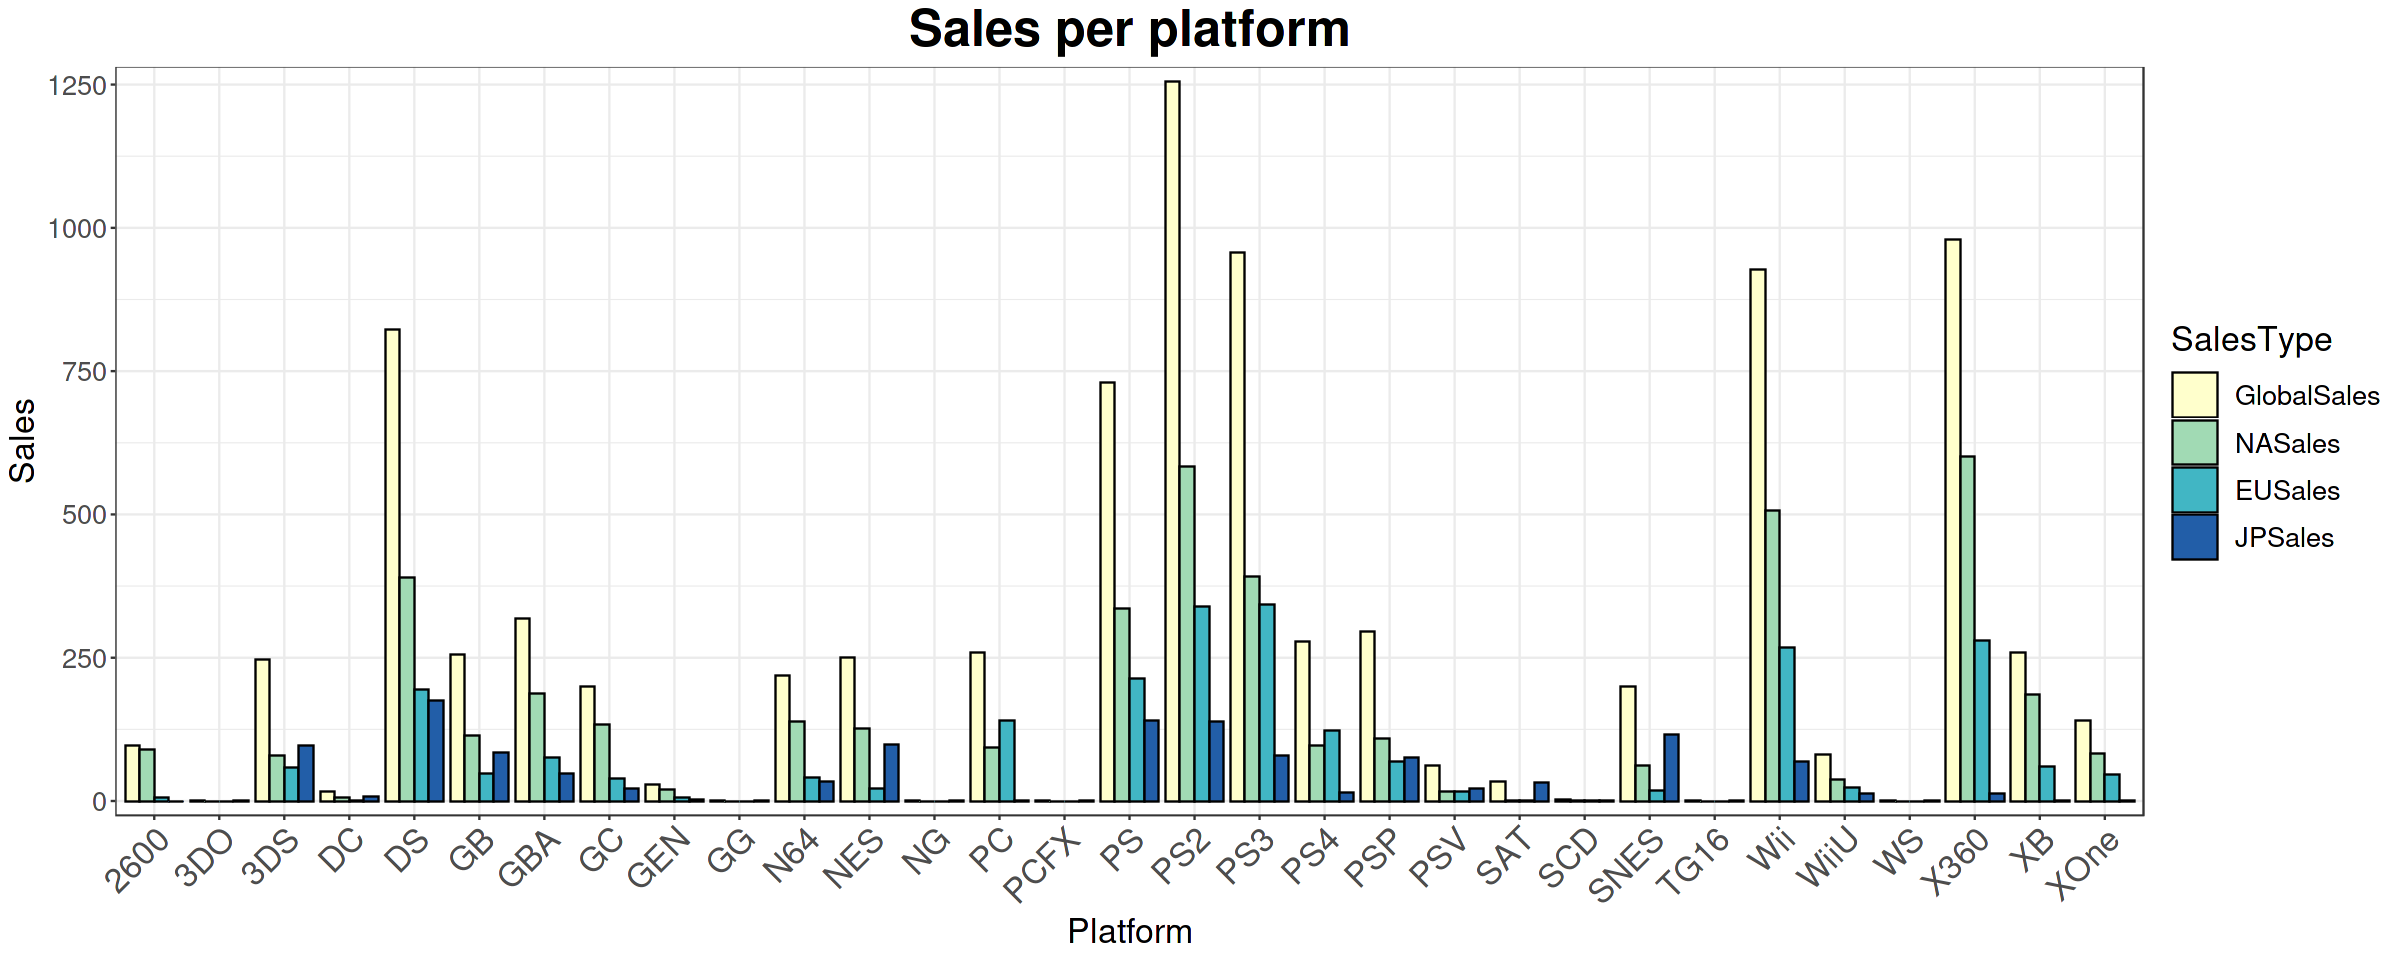

In [ ]:
sales_by_platform = game %>% 
group_by(Platform) %>% 
summarise(GlobalSales = sum(Global_Sales), NASales = sum(NA_Sales), EUSales = sum(EU_Sales), JPSales = sum(JP_Sales))

sales_by_platform = melt(sales_by_platform)
colnames(sales_by_platform) = c("Platform", "SalesType", "Sales")

p2 = ggplot(aes(x = Platform, y = Sales, fill = SalesType), data = sales_by_platform) + 
geom_bar(colour = "black", stat = "identity", position = "dodge") + 
theme_bw() + 
theme(axis.text.x = element_text(size=20,angle=45,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) + 
ggtitle("Sales per platform") +  
scale_fill_brewer(palette = "YlGnBu") +
scale_y_continuous(expand = c(.02, .02)) + 
ylab("Sales")
grid.arrange(p2, ncol = 1)




## Genre Count

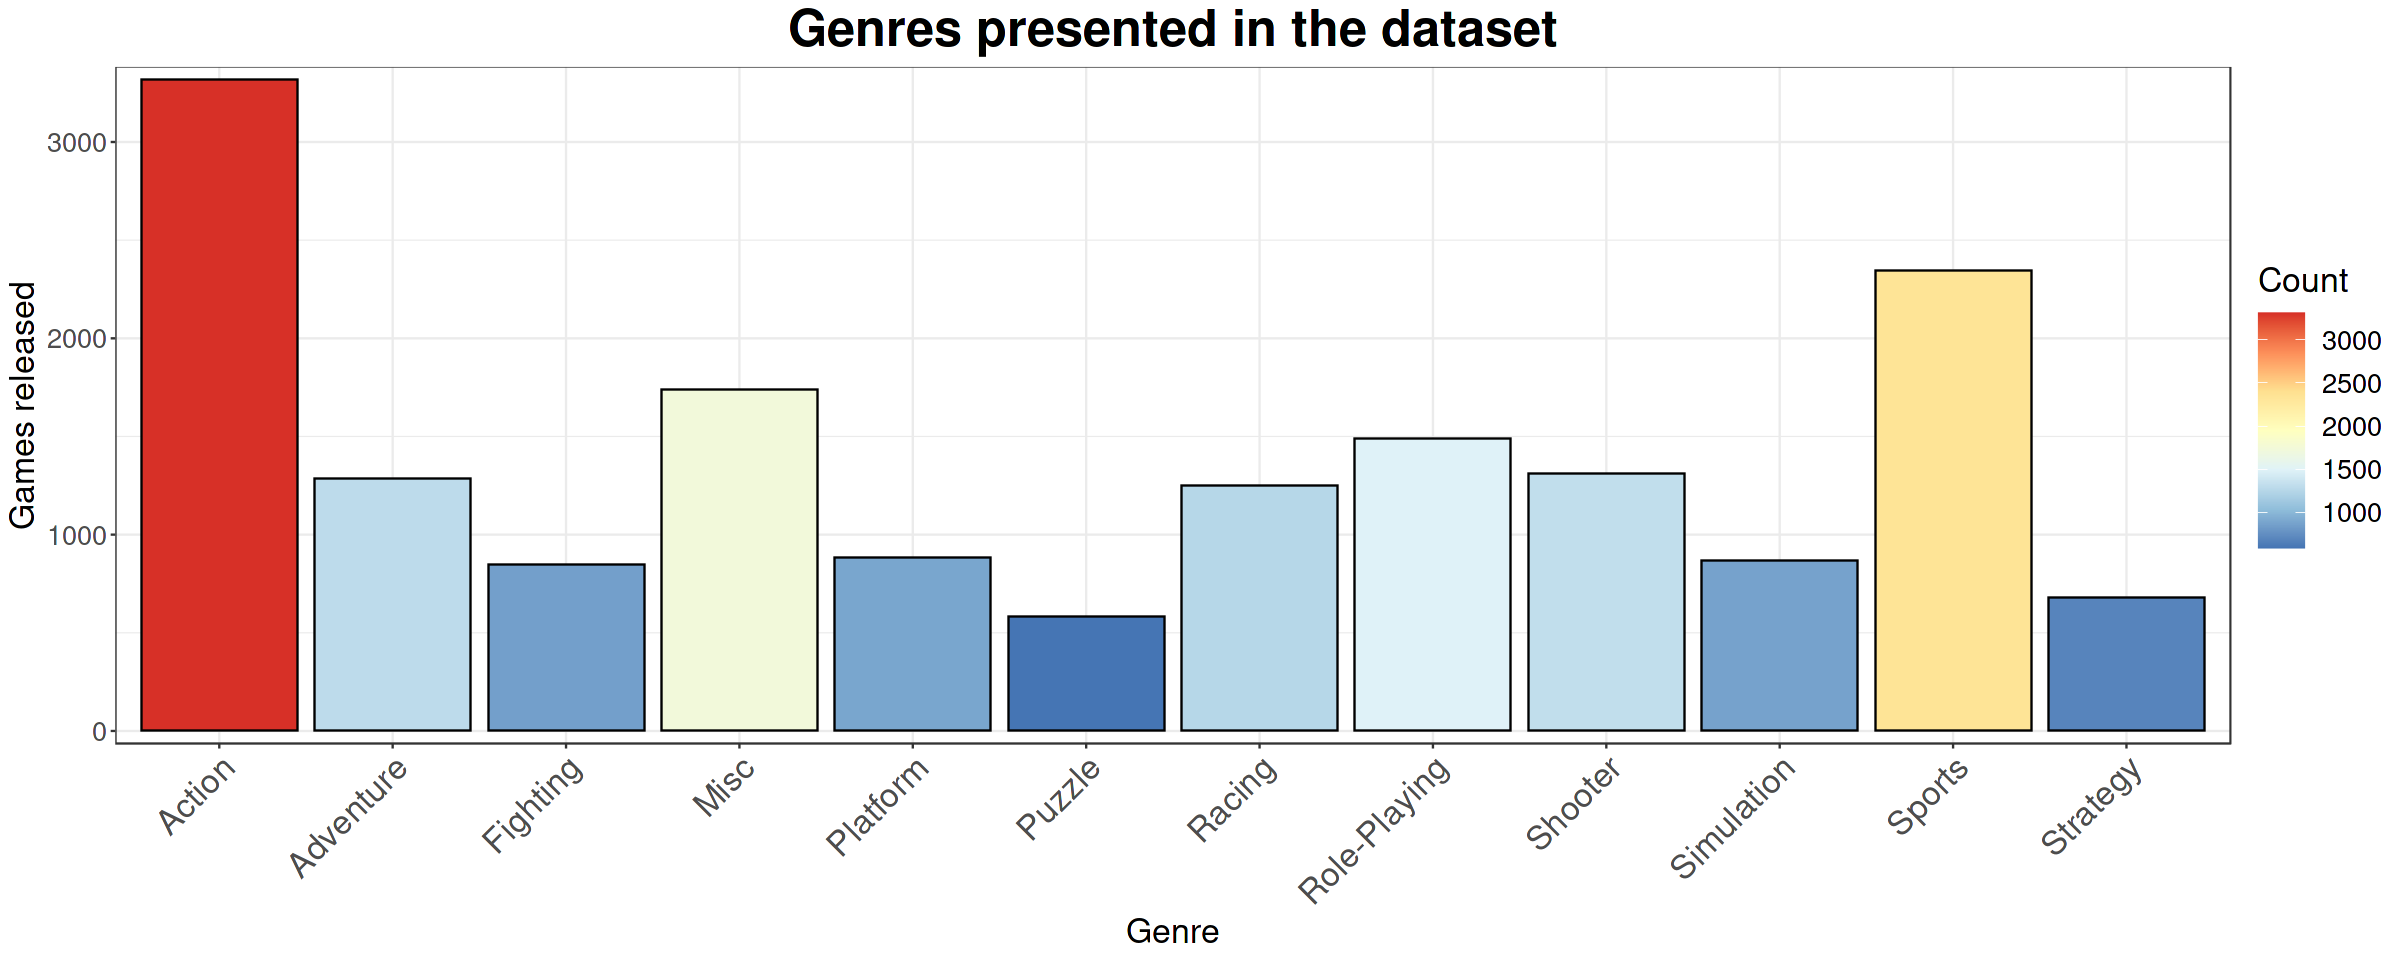

In [ ]:
by_genre = game %>% group_by(Genre) %>% summarise(Count = n())

p1 = ggplot(aes(x = Genre, y = Count, fill = Count), data = by_genre) + 
geom_bar(, colour = "black", stat = "identity") + 
theme_bw() + 
theme(axis.text.x = element_text(size=20,angle=45,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) + 
ggtitle("Genres presented in the dataset") + 
scale_fill_distiller(palette = "RdYlBu") +
scale_y_continuous(expand = c(.02, .02)) + 
ylab("Games released")

grid.arrange(p1, ncol = 1)




## Genre Sales

Using Genre as id variables



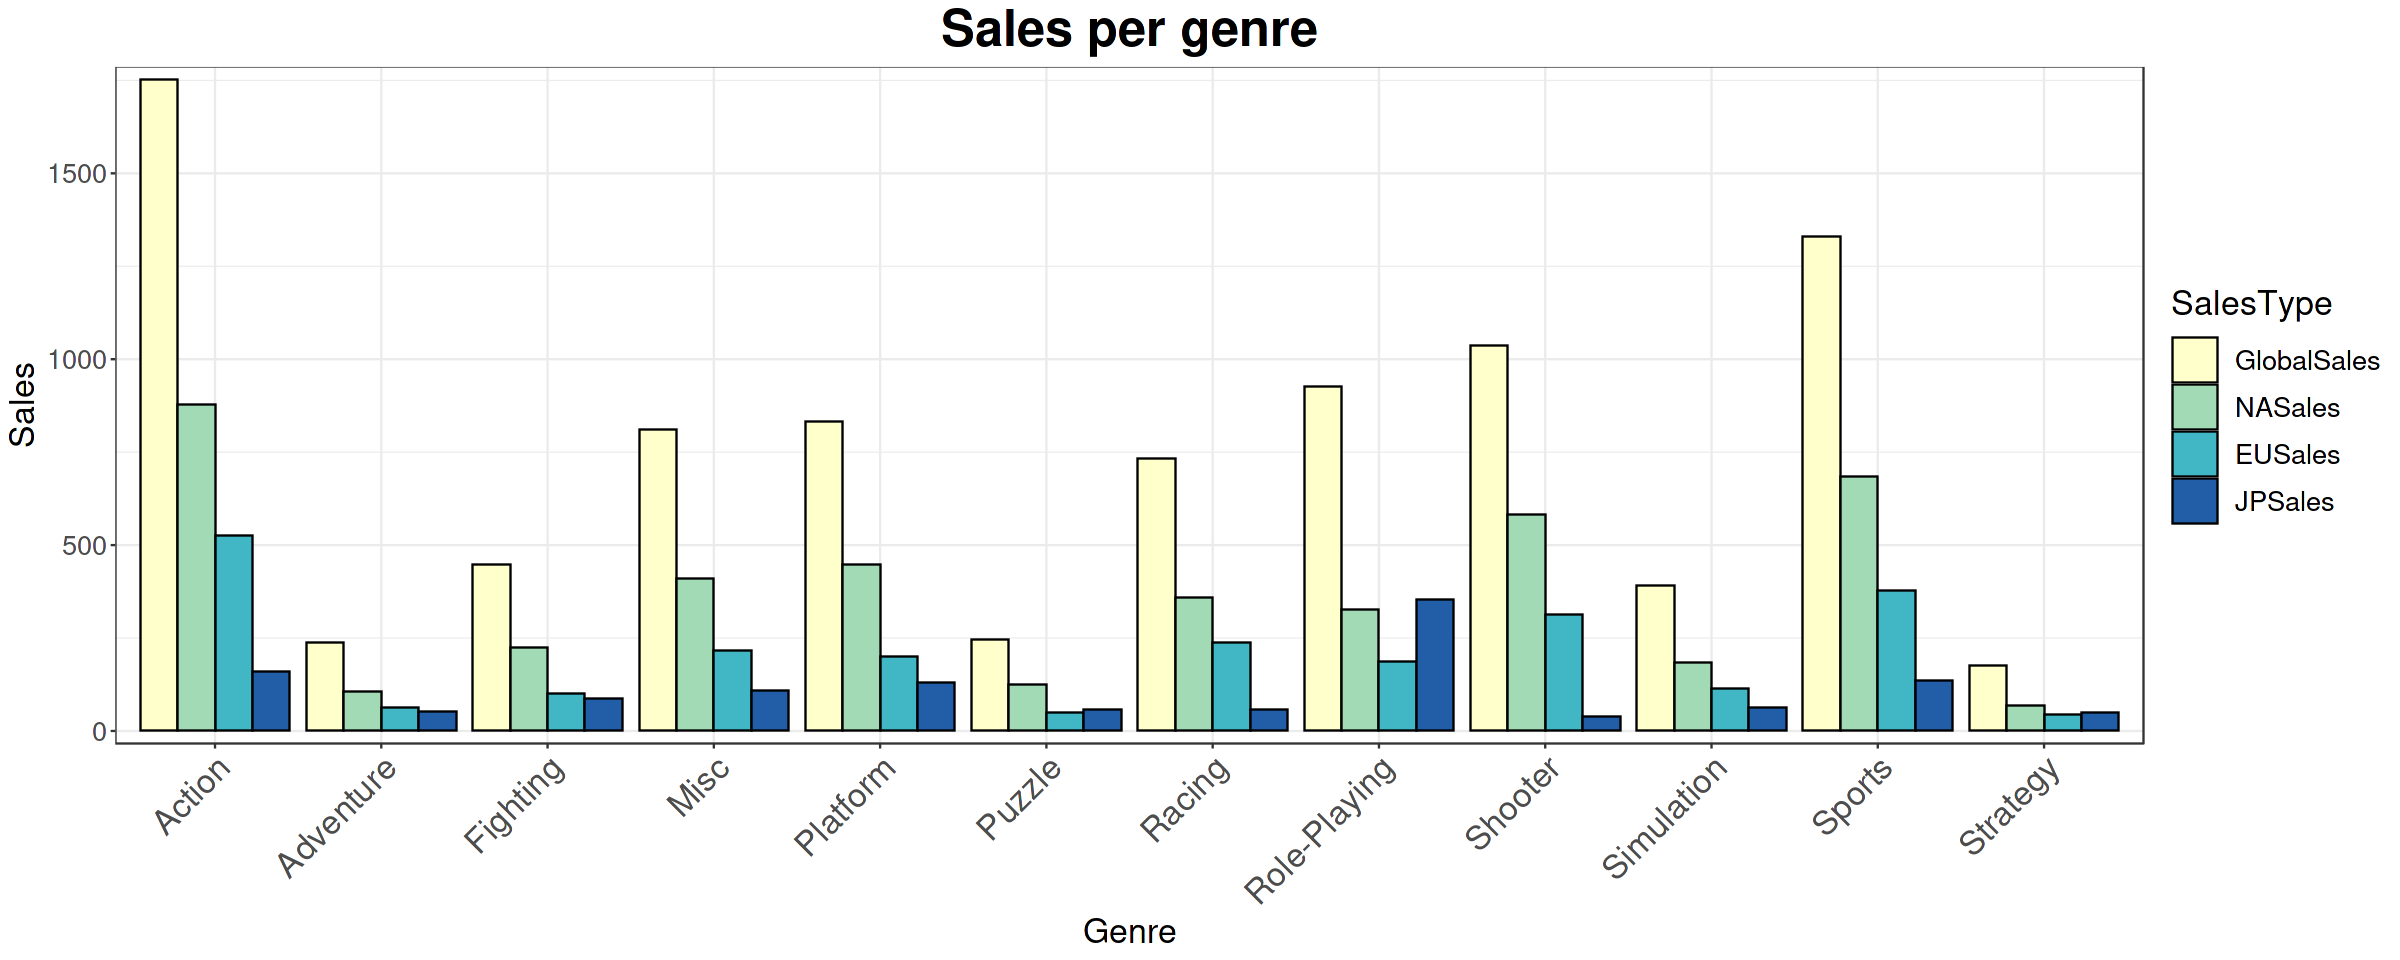

In [ ]:
sales_by_genre = game %>% 
group_by(Genre) %>% 
summarise(GlobalSales = sum(Global_Sales), NASales = sum(NA_Sales), EUSales = sum(EU_Sales), JPSales = sum(JP_Sales))

sales_by_genre = melt(sales_by_genre)
colnames(sales_by_genre) = c("Genre", "SalesType", "Sales")

p2 = ggplot(aes(x = Genre, y = Sales, fill = SalesType), data = sales_by_genre) + 
geom_bar(colour = "black", stat = "identity", position = "dodge") + 
theme_bw() + 
theme(axis.text.x = element_text(size=20,angle=45,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) + 
ggtitle("Sales per genre") +  
scale_fill_brewer(palette = "YlGnBu") +
scale_y_continuous(expand = c(.02, .02)) + 
ylab("Sales")


grid.arrange(p2, ncol = 1)

## Number of Sales by Region

In [ ]:

#game$Year <- game(game$Year,levels=c(1980:2015))
#na <- game %>% select(Year,NA_Sales) %>% group_by(Year) %>% summarise(s=sum(NA_Sales))

#eu <- game %>% select(Year,EU_Sales) %>% group_by(Year) %>% summarise(s=sum(EU_Sales))

#jp <- game %>% select(Year,JP_Sales) %>%group_by(Year) %>% summarise(s=sum(JP_Sales))

#oth <- game %>% select(Year,Other_Sales) %>% group_by(Year) %>% summarise(s=sum(Other_Sales))

#data_sales <- data.frame(year = c(1980:2017,2020),oth$s,jp$s,eu$s,na$s)
#ggplot(data_sales, aes((year))) + 
#  geom_line(aes(y = na$s , colour = "NA_Sales"),size=1) + 
#  geom_line(aes(y = eu$s, colour = "EU_Sales"),size=1)+
#  geom_line(aes(y= jp$s ,colour='JP_Sales'),size=1)+
#  geom_line(aes(y=oth$s,colour='Other_Sales'),size=1)+ylab('Count in Millions')

## Genre Sales by Regions

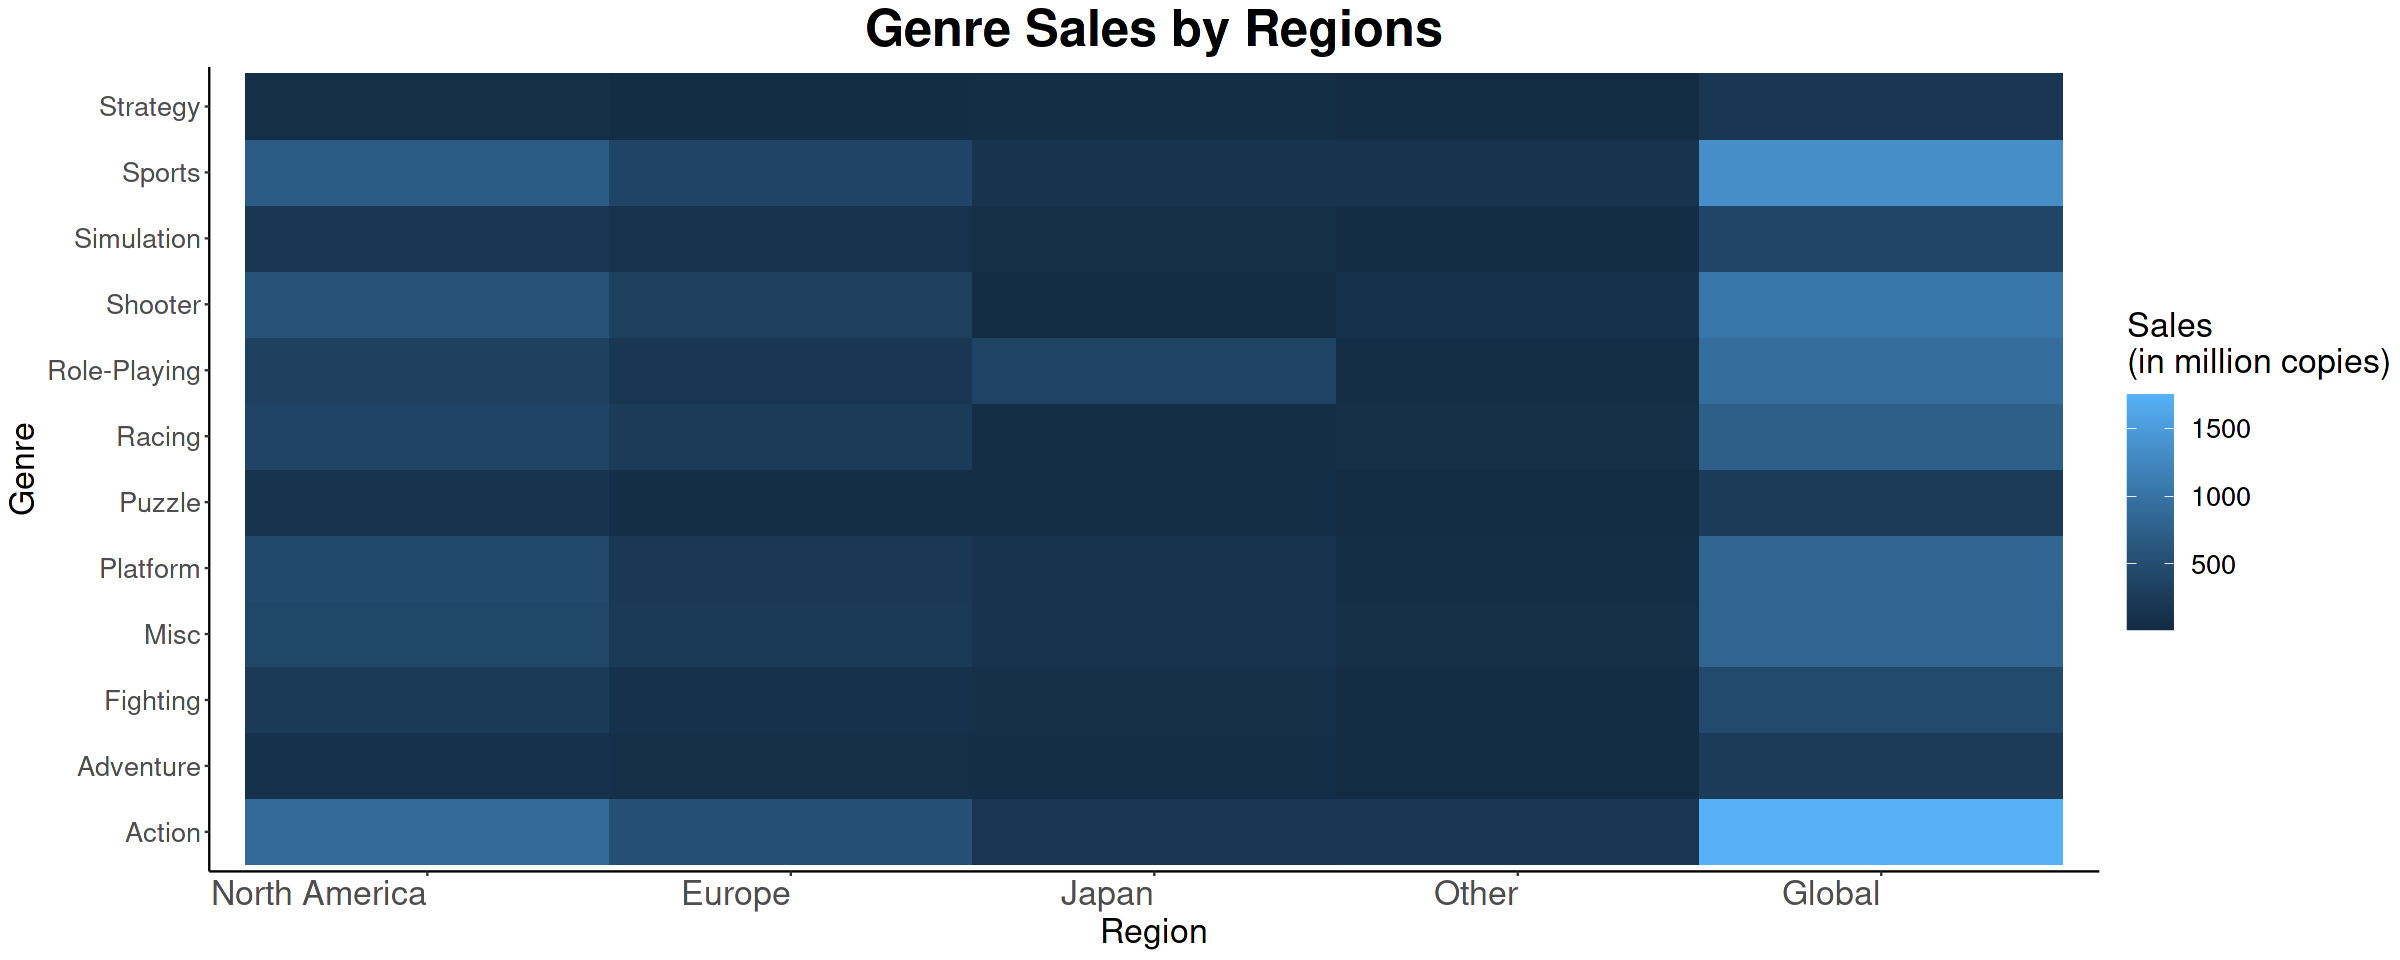

In [ ]:
game %>% 
  group_by(Genre) %>% 
  summarise_if(is.numeric, sum) %>% 
  ungroup() %>% 
  gather(Region, Sales, NA_Sales:Global_Sales) %>% 
  mutate(Region = str_replace(Region, "_Sales$", "") %>% 
           factor(levels = c("NA", "EU", "JP", "Other", "Global"),
                  labels = c("North America", "Europe", "Japan", "Other", "Global"))) %>% 
  ggplot(aes(x = Region, y = Genre)) +
  geom_tile(aes(fill = Sales)) +
  labs(title = "Genre Sales by Regions", x = "Region", y = "Genre") +
  scale_fill_continuous(name = "Sales\n(in million copies)") +
  theme_classic() +
  theme(axis.text.x = element_text(size=20,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm'))

## Global Sales by Genre of the Top 10 Publishers

In [ ]:
top10 <- game %>% 
  group_by(Publisher) %>% 
  summarise(Sum_Sales = sum(Global_Sales)) %>% 
  arrange(desc(Sum_Sales)) %>% 
  top_n(10)

top10 %>% pandoc.table(style = "rmarkdown")

Selecting by Sum_Sales





|          Publisher           | Sum_Sales |
|:----------------------------:|:---------:|
|           Nintendo           |   1787    |
|       Electronic Arts        |   1110    |
|          Activision          |   727.5   |
| Sony Computer Entertainment  |   607.5   |
|           Ubisoft            |   474.7   |
|     Take-Two Interactive     |   399.5   |
|             THQ              |   340.8   |
| Konami Digital Entertainment |   283.6   |
|             Sega             |    273    |
|      Namco Bandai Games      |   254.1   |



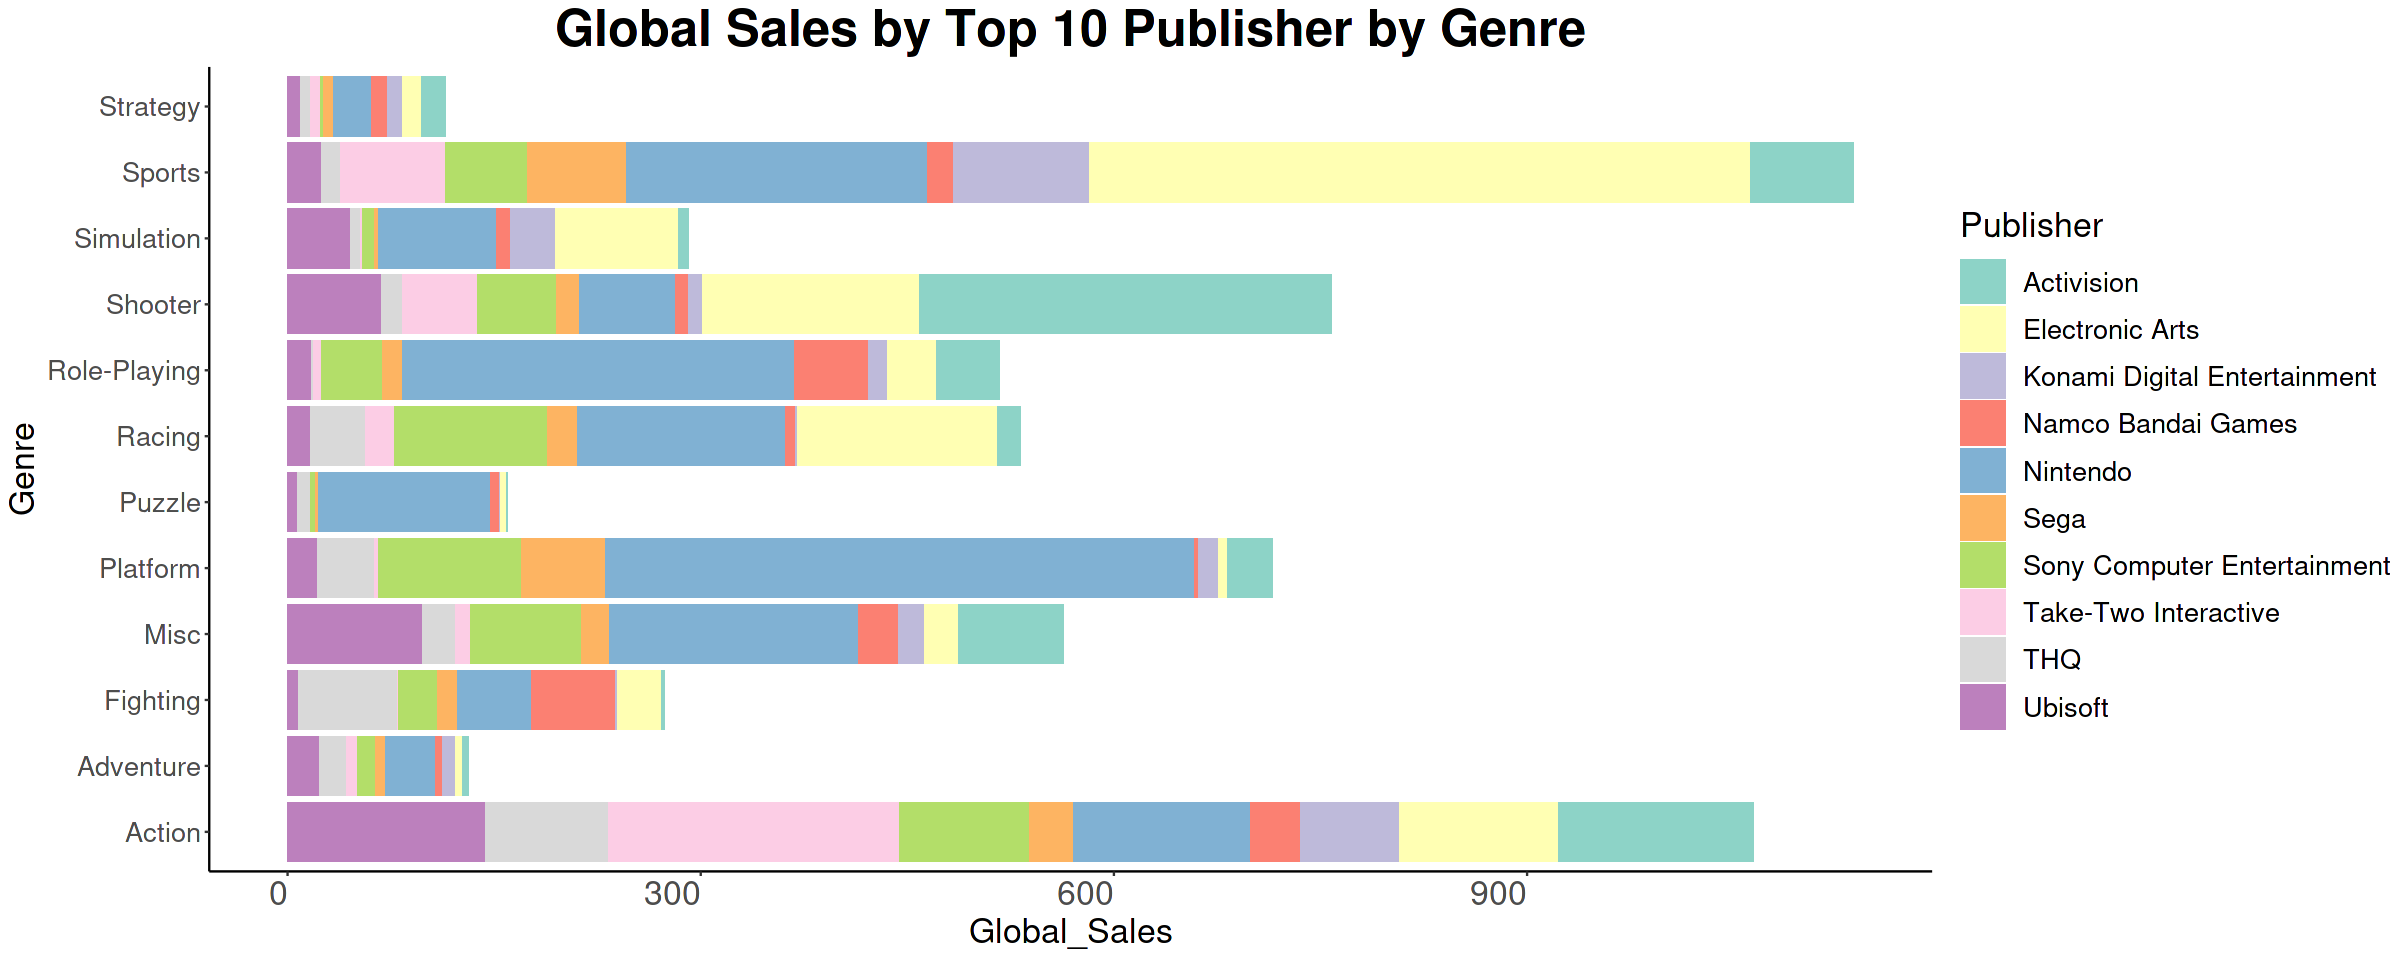

In [ ]:
publishers <- top10$Publisher
game %>% 
  filter(Publisher %in% publishers) %>% 
  ggplot(aes(x = Genre, y = Global_Sales)) +
  geom_bar(stat = "identity", aes(fill = Publisher)) +
  coord_flip() +
  labs(title = "Global Sales by Top 10 Publisher by Genre", xlab = "Cumulative Global Sales") +
  theme_classic() +
  theme(axis.text.x = element_text(size=20,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) +
  scale_fill_brewer(palette = "Set3")

## Top 20 Publisher

Selecting by Count



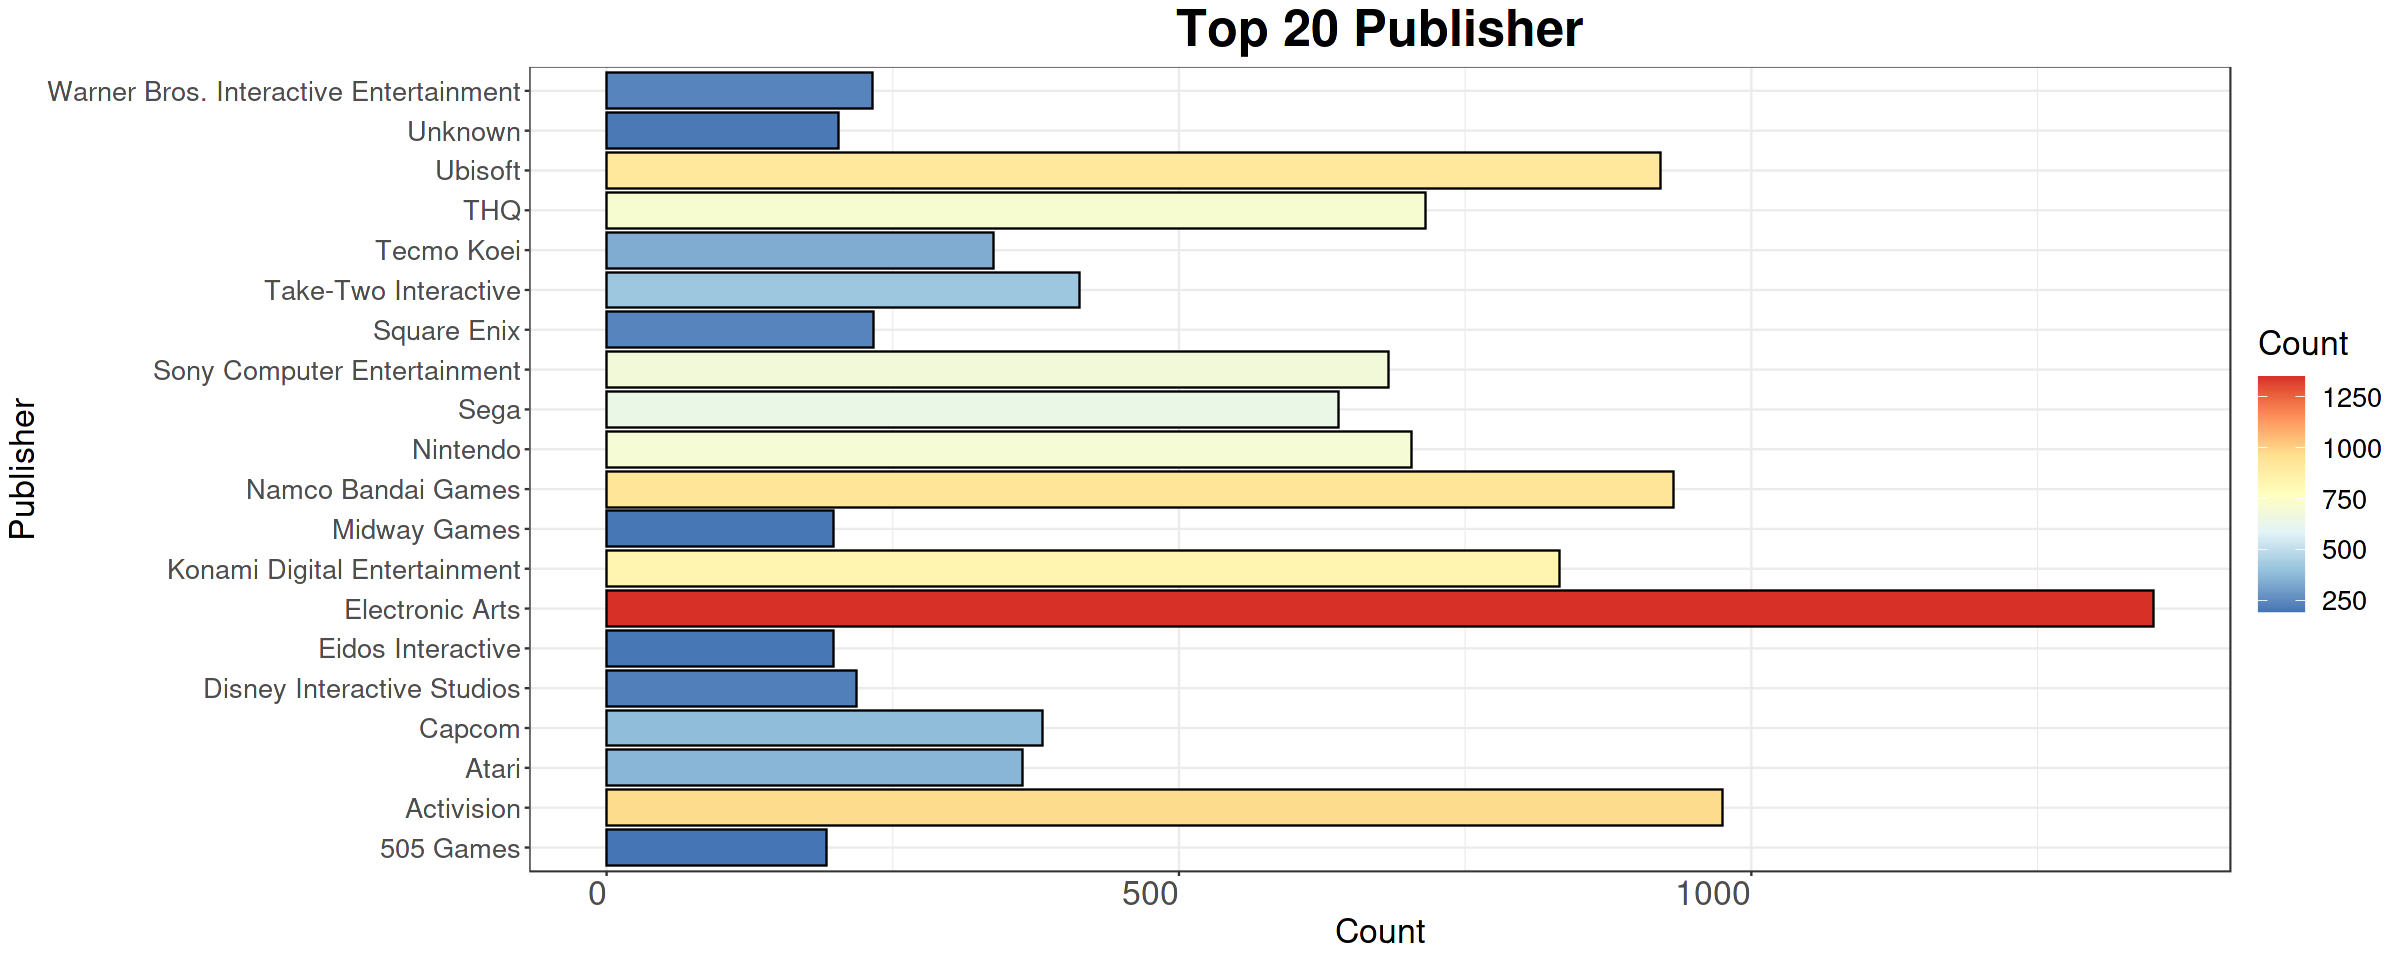

In [ ]:
top_publisher = game %>% group_by(Publisher) %>% 
                summarise(Count = n()) %>% 
                arrange(desc(Count)) %>% top_n(20)

ggplot(data=top_publisher,aes(x=Publisher,y=Count,fill=Count)) +
geom_bar(colour='black',stat='identity') + 
theme_bw() +
ggtitle('Top 20 Publisher') + 
theme(axis.text.x = element_text(size=20,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) + 
scale_fill_distiller(palette = 'RdYlBu') + 
coord_flip() ## coordinate flip bar == > barh

## Top 20 Publisher Of EU Sales

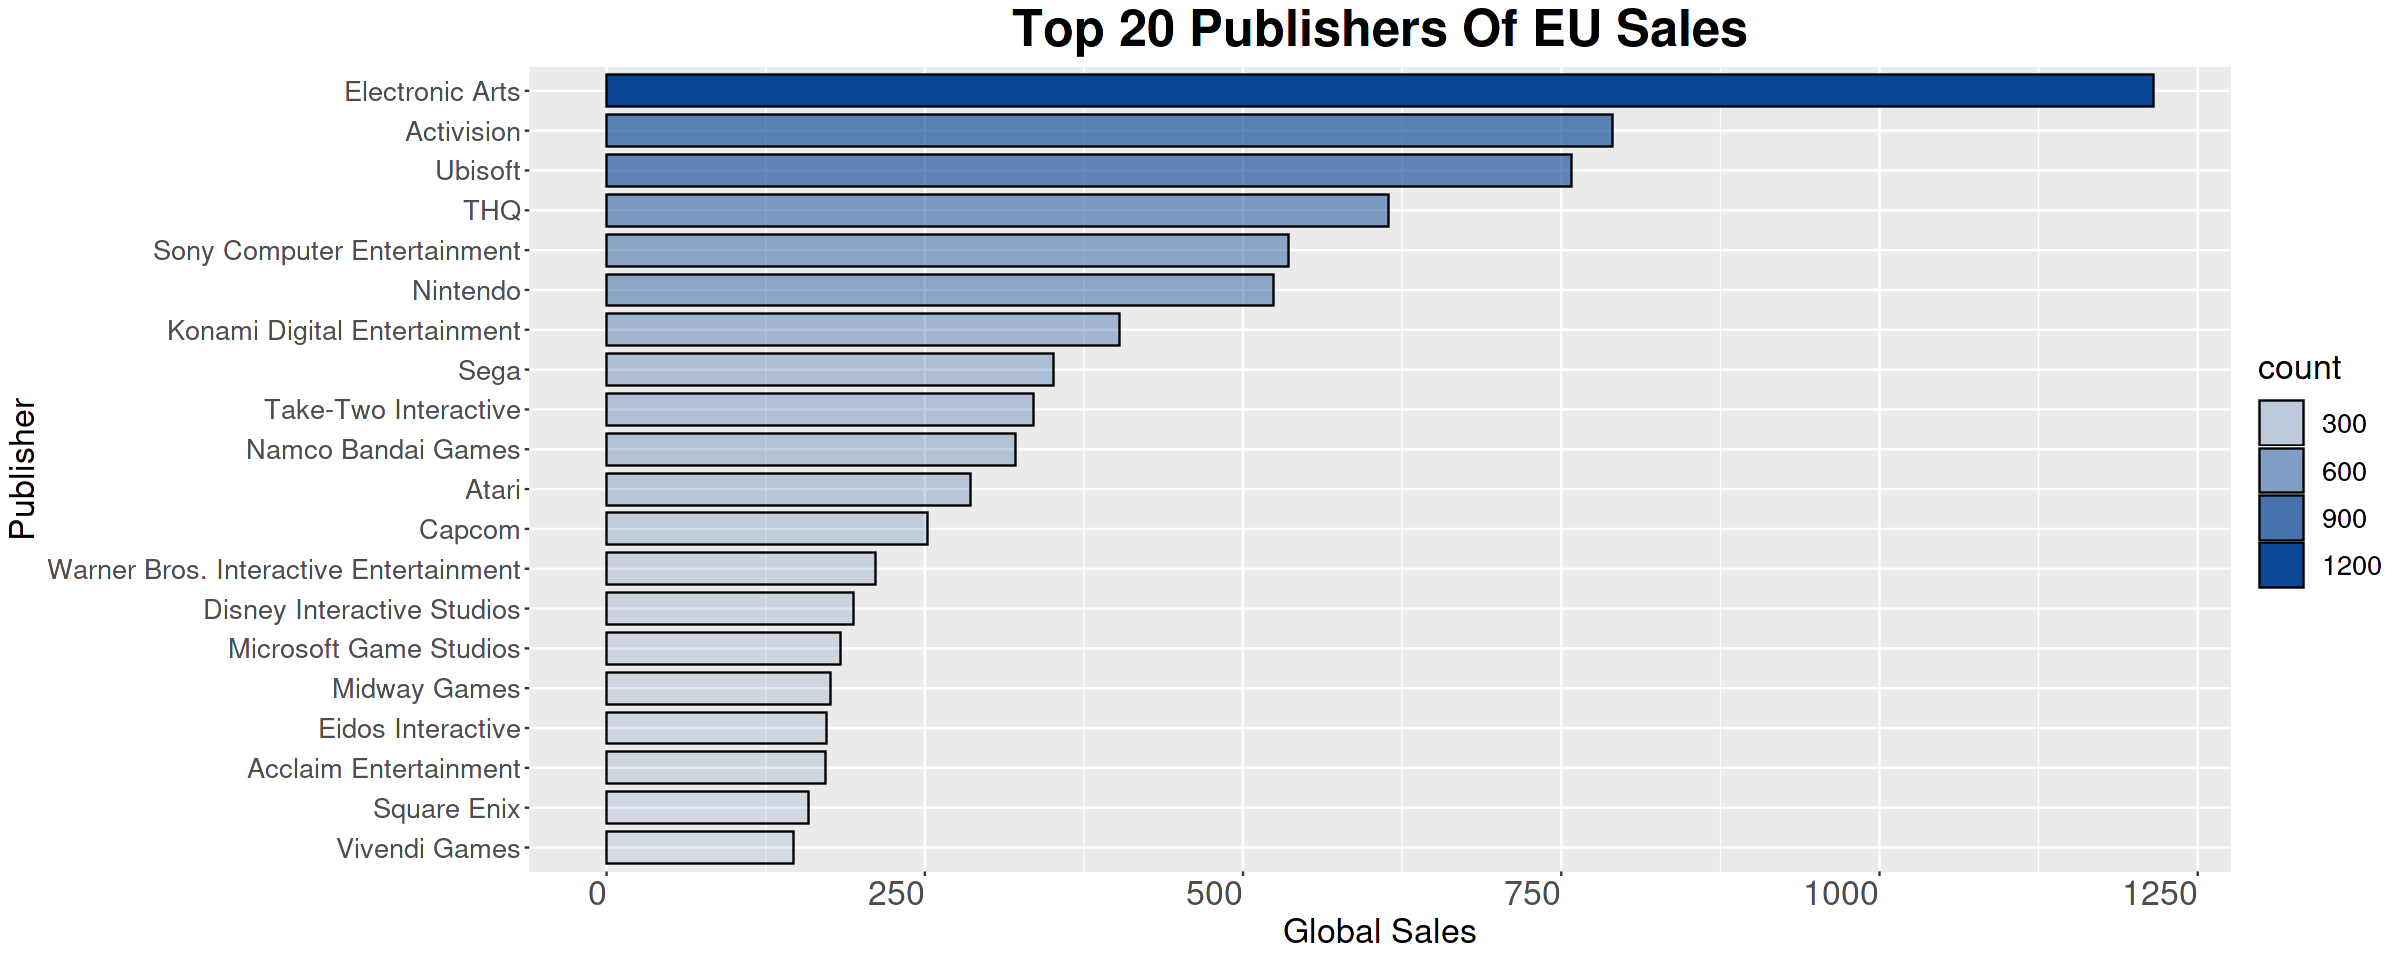

In [ ]:
EU_Sales = filter(game, EU_Sales > 0 ) %>%
  group_by(Publisher) %>%
  dplyr::summarise(count=n()) %>%
  arrange(desc(count))

ggplot(EU_Sales[1:20,], aes(x = reorder(factor(Publisher), count), y=count, alpha=count)) + 
  geom_bar(colour = "black", fill=colors[8], width = 0.8, stat="identity") + 
  xlab("Publisher") + 
  ylab("Global Sales") + 
  ggtitle("Top 20 Publishers Of EU Sales") + 
    theme(axis.text.x = element_text(size=20,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) +

  coord_flip()

## Top 20 Publisher Of North American Sale

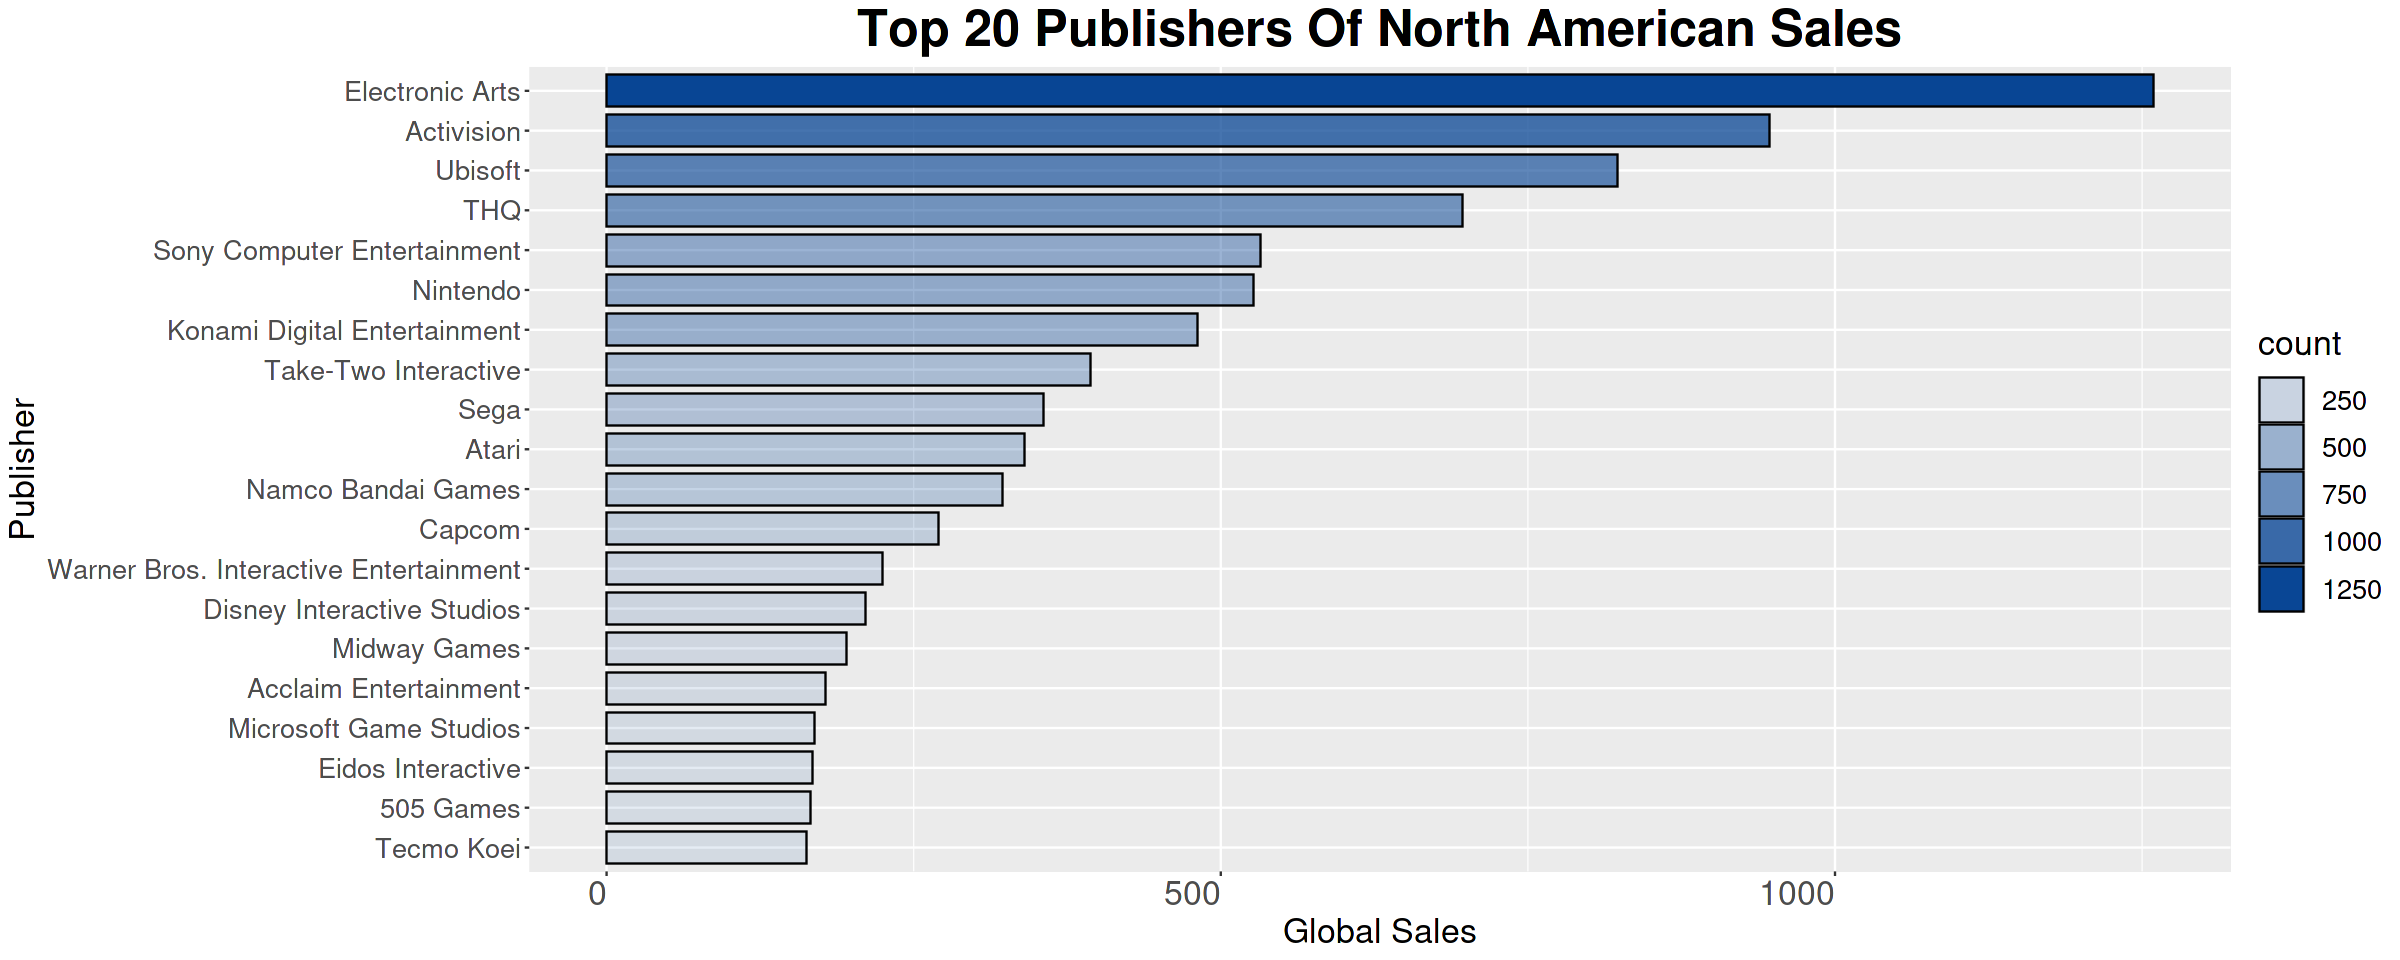

In [ ]:
NA_Sales = filter(game, NA_Sales > 0 ) %>%
  group_by(Publisher) %>%
  dplyr::summarise(count=n()) %>%
  arrange(desc(count))

ggplot(NA_Sales[1:20,], aes(x = reorder(factor(Publisher), count), y=count, alpha=count)) + 
  geom_bar(colour = "black", fill=colors[8], width = 0.8, stat="identity") + 
  xlab("Publisher") + 
  ylab("Global Sales") + 
  ggtitle("Top 20 Publishers Of North American Sales") +
    theme(axis.text.x = element_text(size=20,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) +
  coord_flip()

## Top 20 Publishers Of Japanese Sales

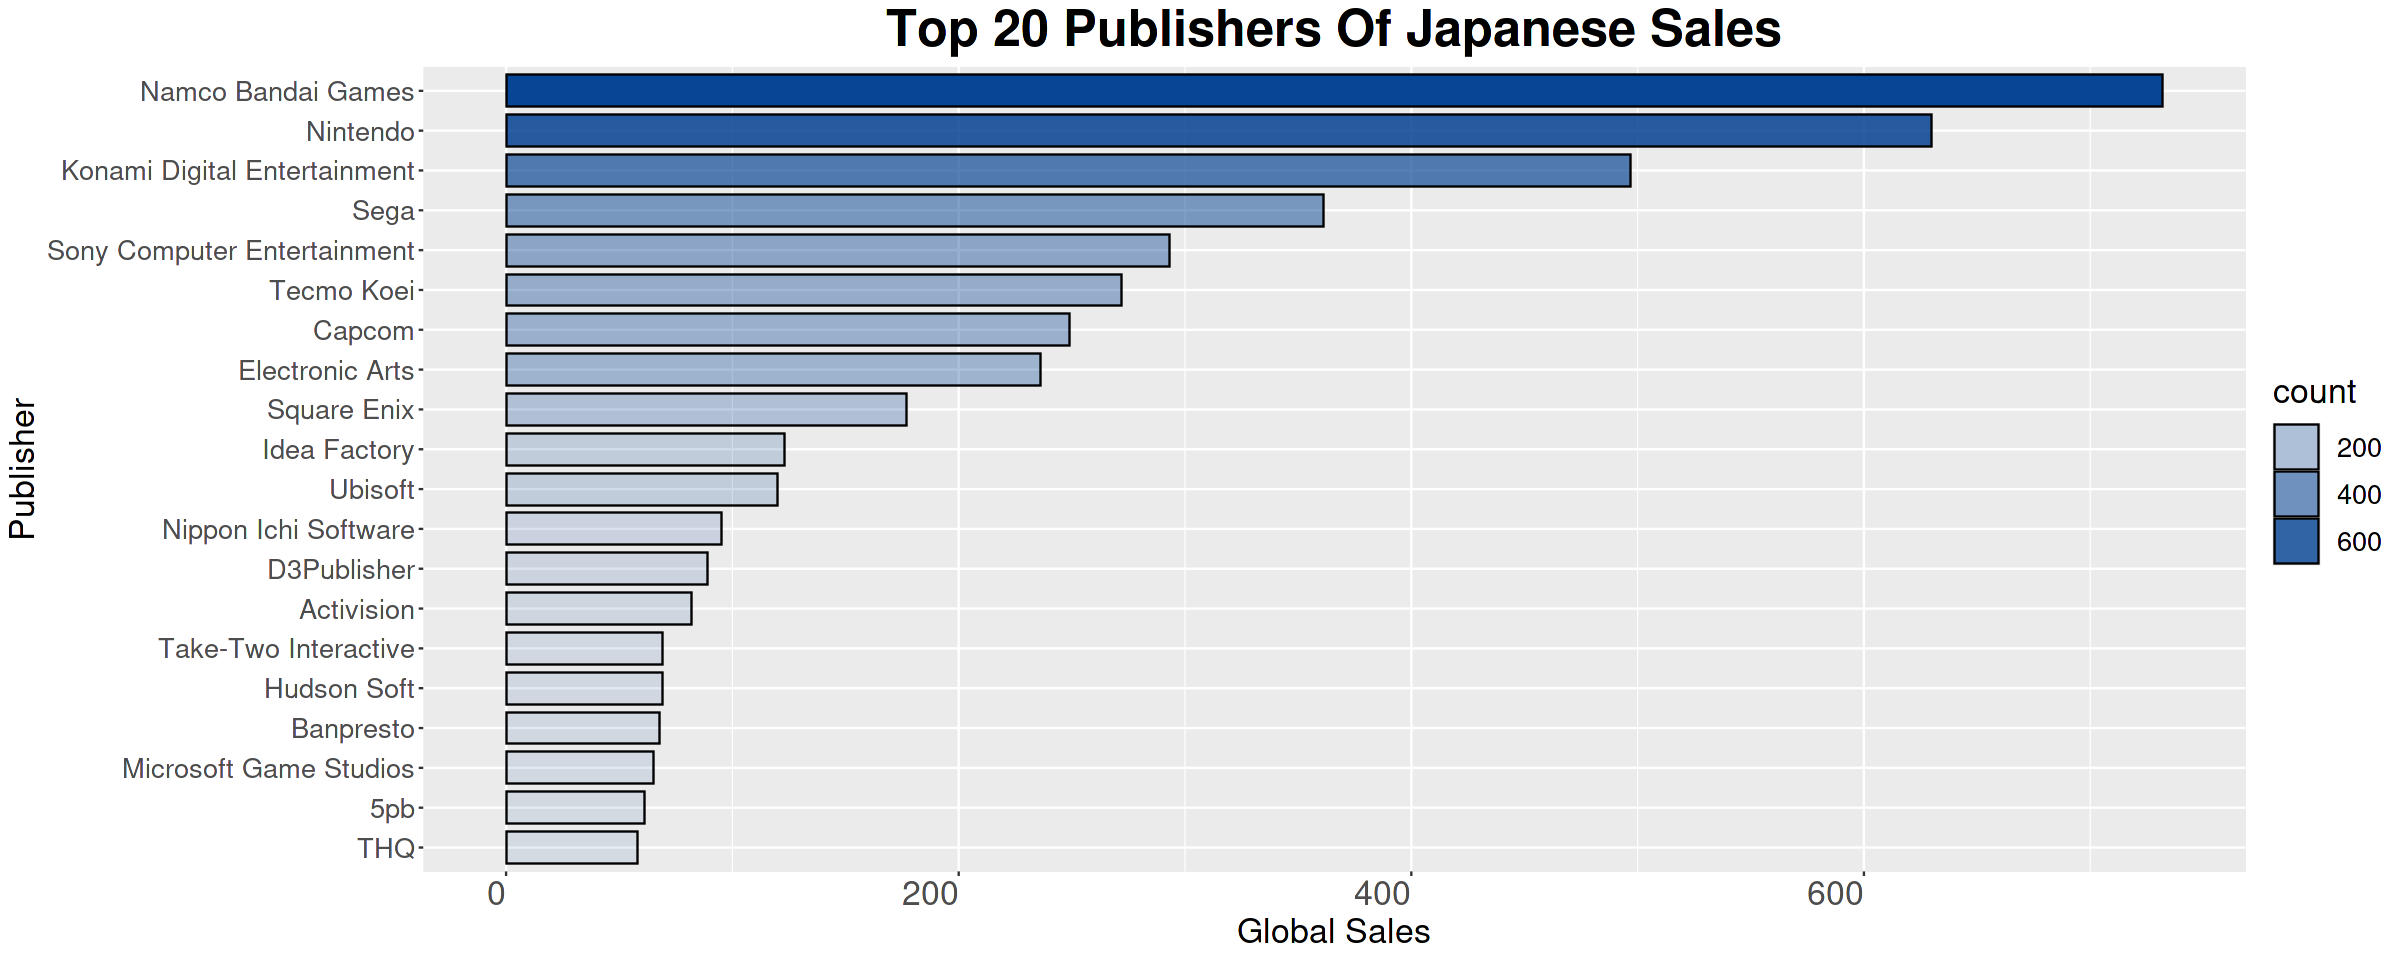

In [ ]:
JP_Sales = filter(game, JP_Sales > 0 ) %>%
  group_by(Publisher) %>%
  dplyr::summarise(count=n()) %>%
  arrange(desc(count))

ggplot(JP_Sales[1:20,], aes(x = reorder(factor(Publisher), count), y=count, alpha=count)) + 
  geom_bar(colour = "black", fill=colors[8], width = 0.8, stat="identity") + 
  xlab("Publisher") + 
  ylab("Global Sales") + 
  ggtitle("Top 20 Publishers Of Japanese Sales") +
    theme(axis.text.x = element_text(size=20,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) +
  coord_flip()

## Top 20 Publishers Of Other Sales

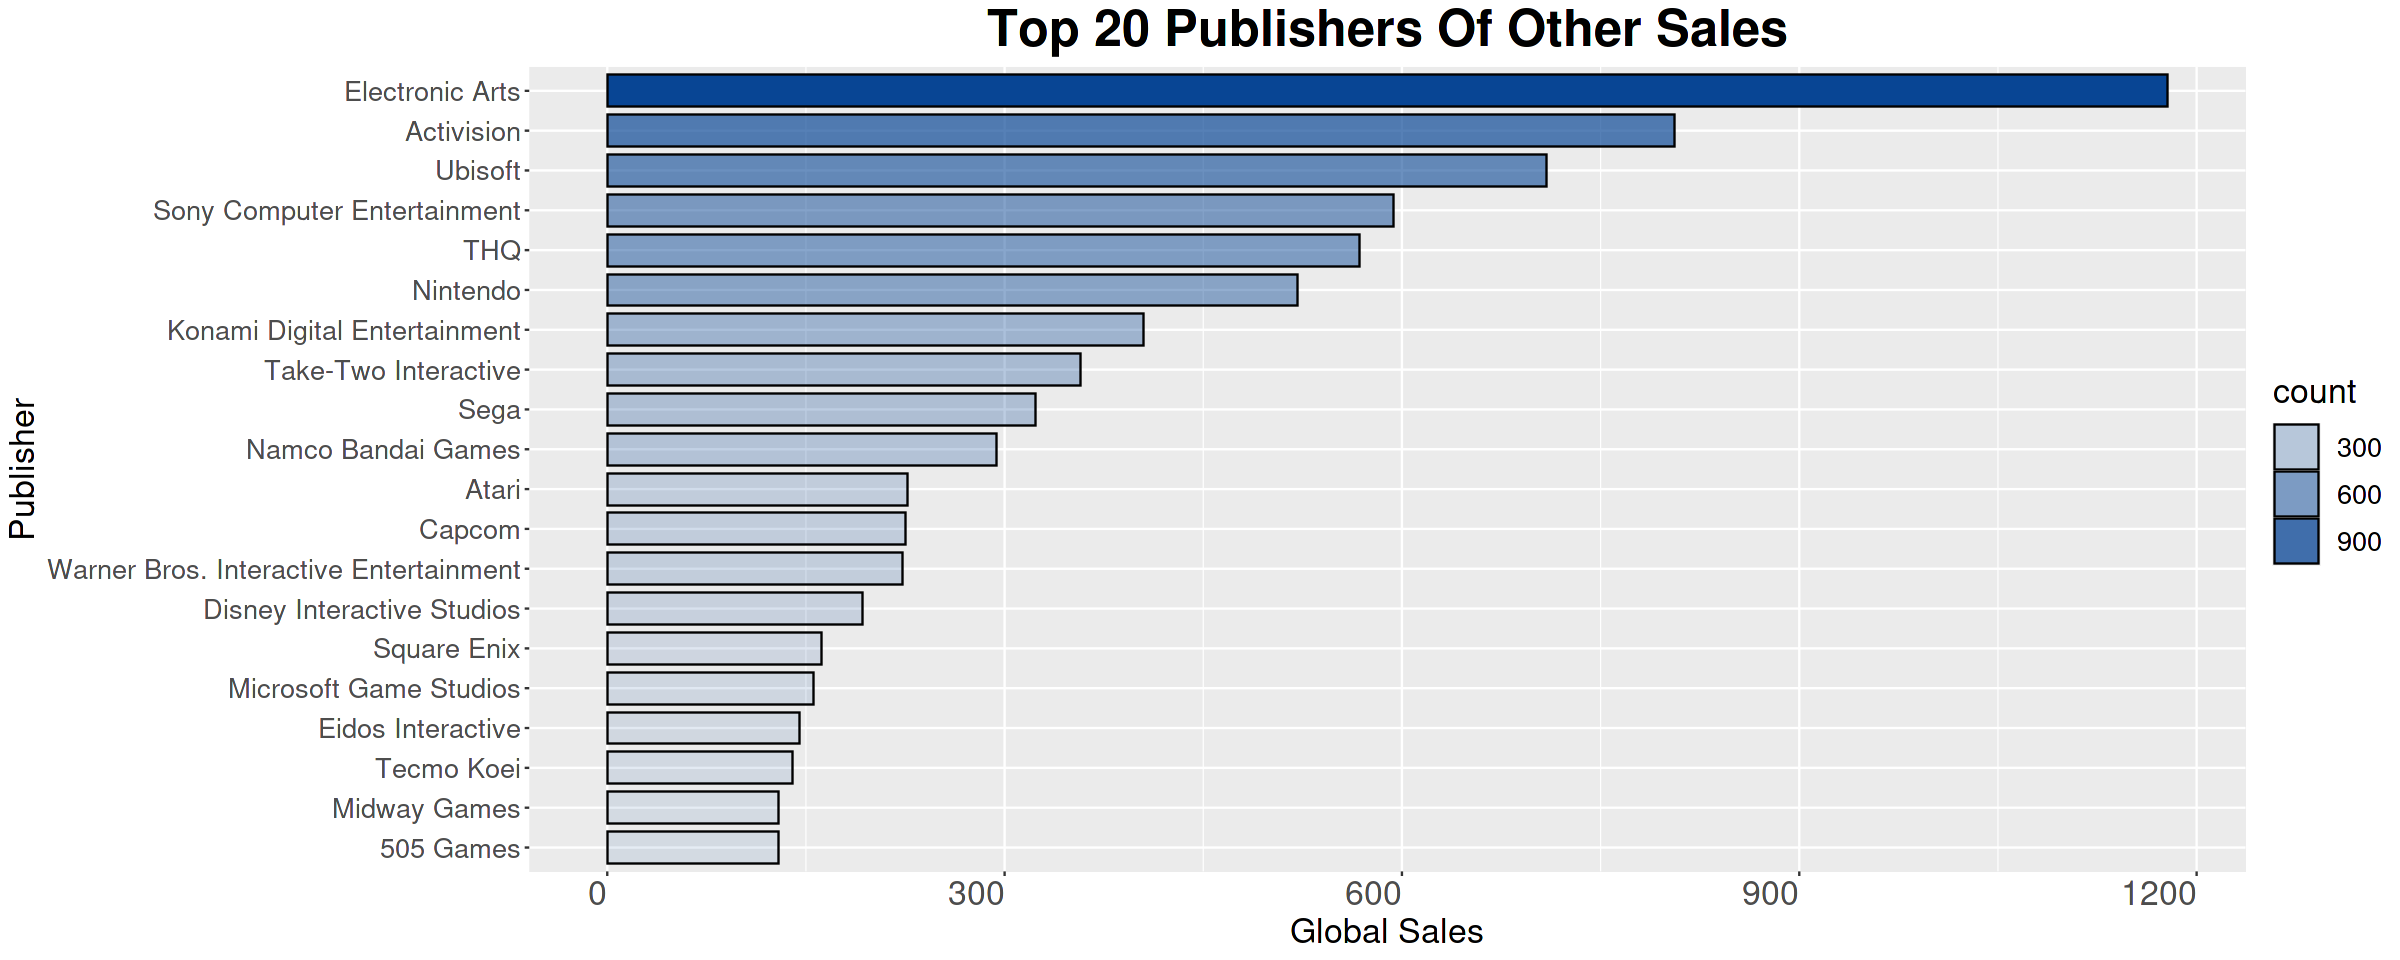

In [ ]:
Other_Sales = filter(game, Other_Sales > 0 ) %>%
  group_by(Publisher) %>%
  dplyr::summarise(count=n()) %>%
  arrange(desc(count))

ggplot(Other_Sales[1:20,], aes(x = reorder(factor(Publisher), count), y=count, alpha=count)) + 
  geom_bar(colour = "black", fill=colors[8], width = 0.8, stat="identity") + 
  xlab("Publisher") + 
  ylab("Global Sales") + 
  ggtitle("Top 20 Publishers Of Other Sales") +
    theme(axis.text.x = element_text(size=20,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) +
  coord_flip()

## Global Sales Per Year

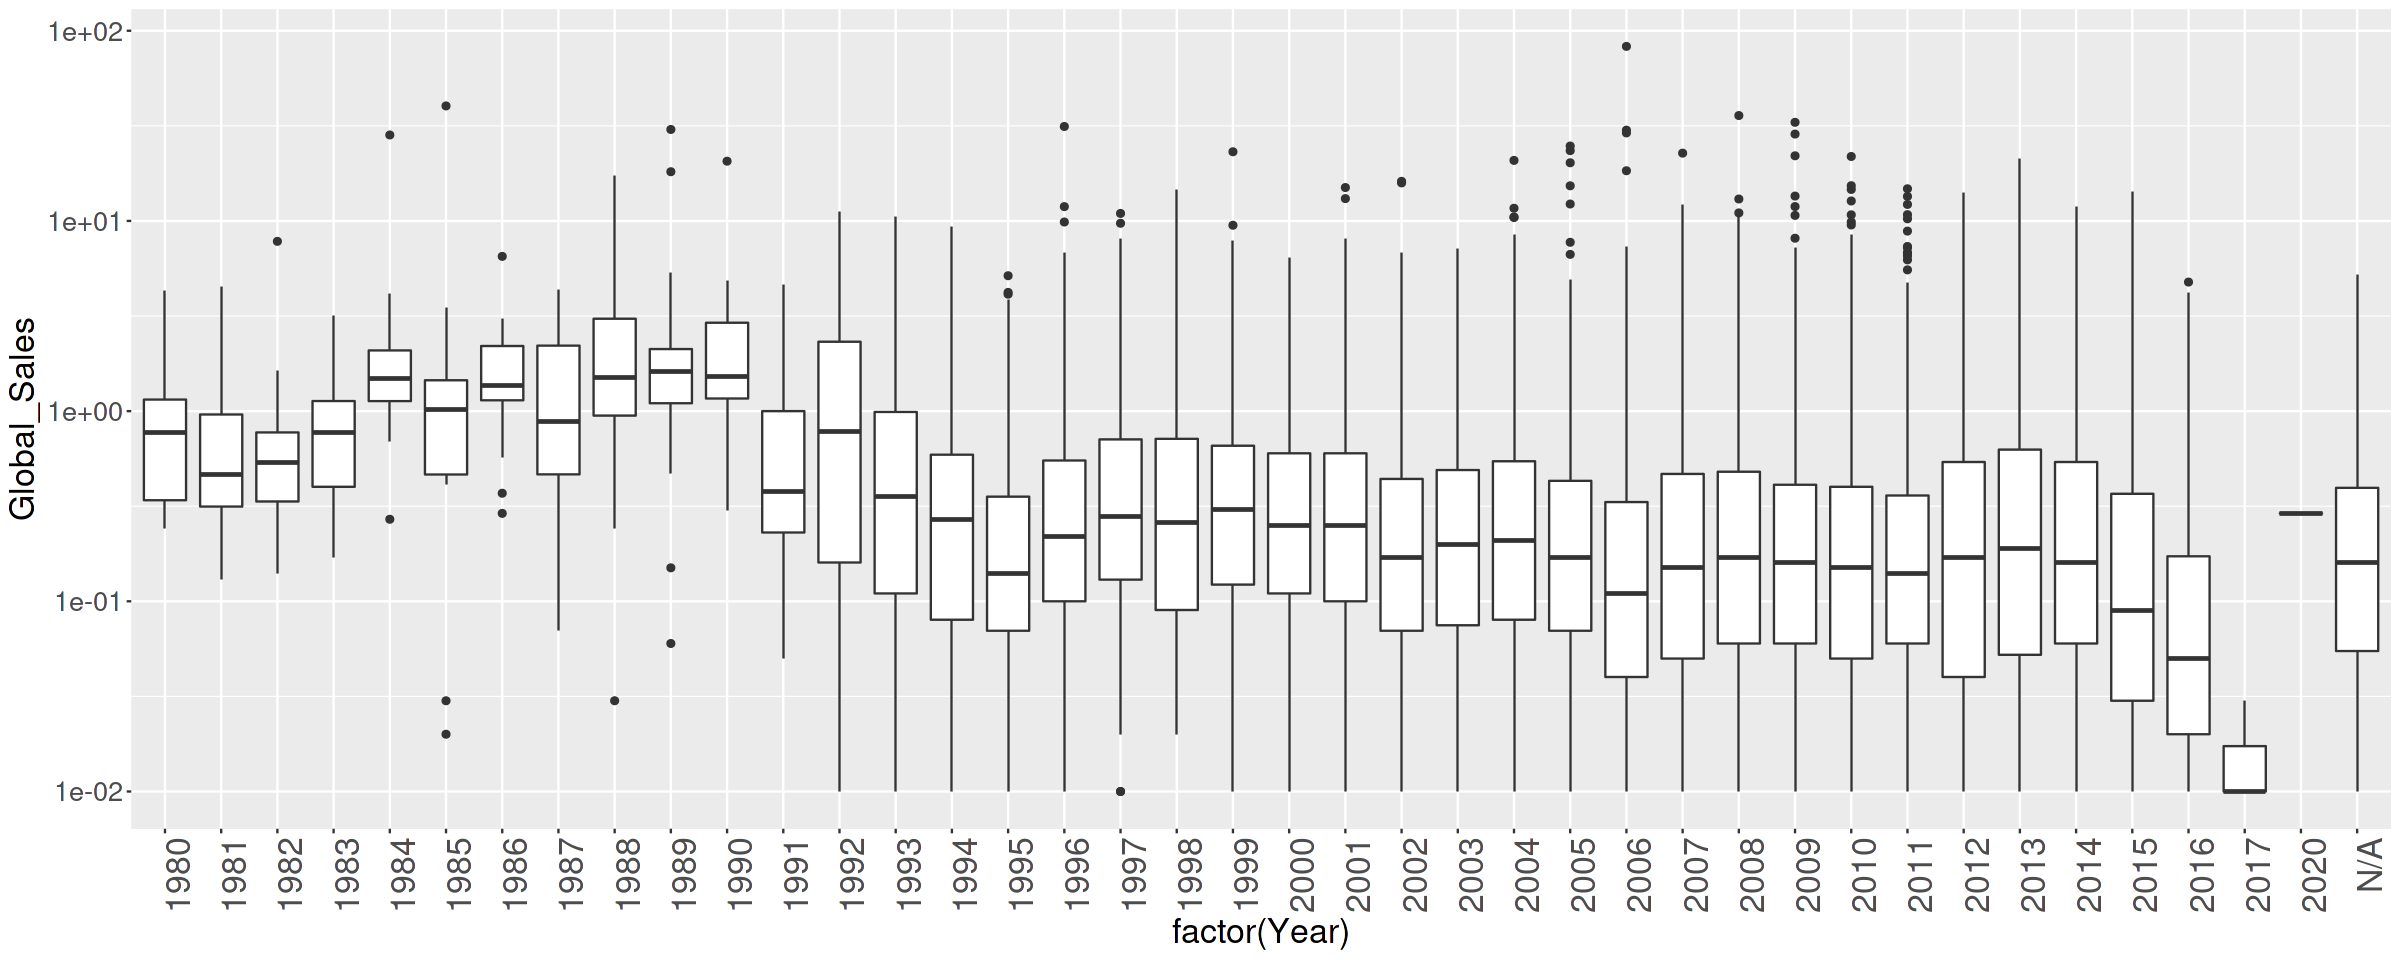

In [ ]:
ggplot(game, aes(x=factor(Year), y=Global_Sales)) + 
geom_boxplot() + 
scale_y_log10() + 
theme(axis.text.x = element_text(size=20, angle = 90, hjust = 1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),
      text = element_text(size = 20),
      legend.key.size = unit(1, 'cm'))

## Clear Leaders For Sales: DS, PS, PS2, PS3, Wii, X360. 

`summarise()` has grouped output by 'Platform'. You can override using the `.groups` argument.

Using Platform, Year as id variables

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message:
“Removed 6 row(s) containing missing values (geom_path).”


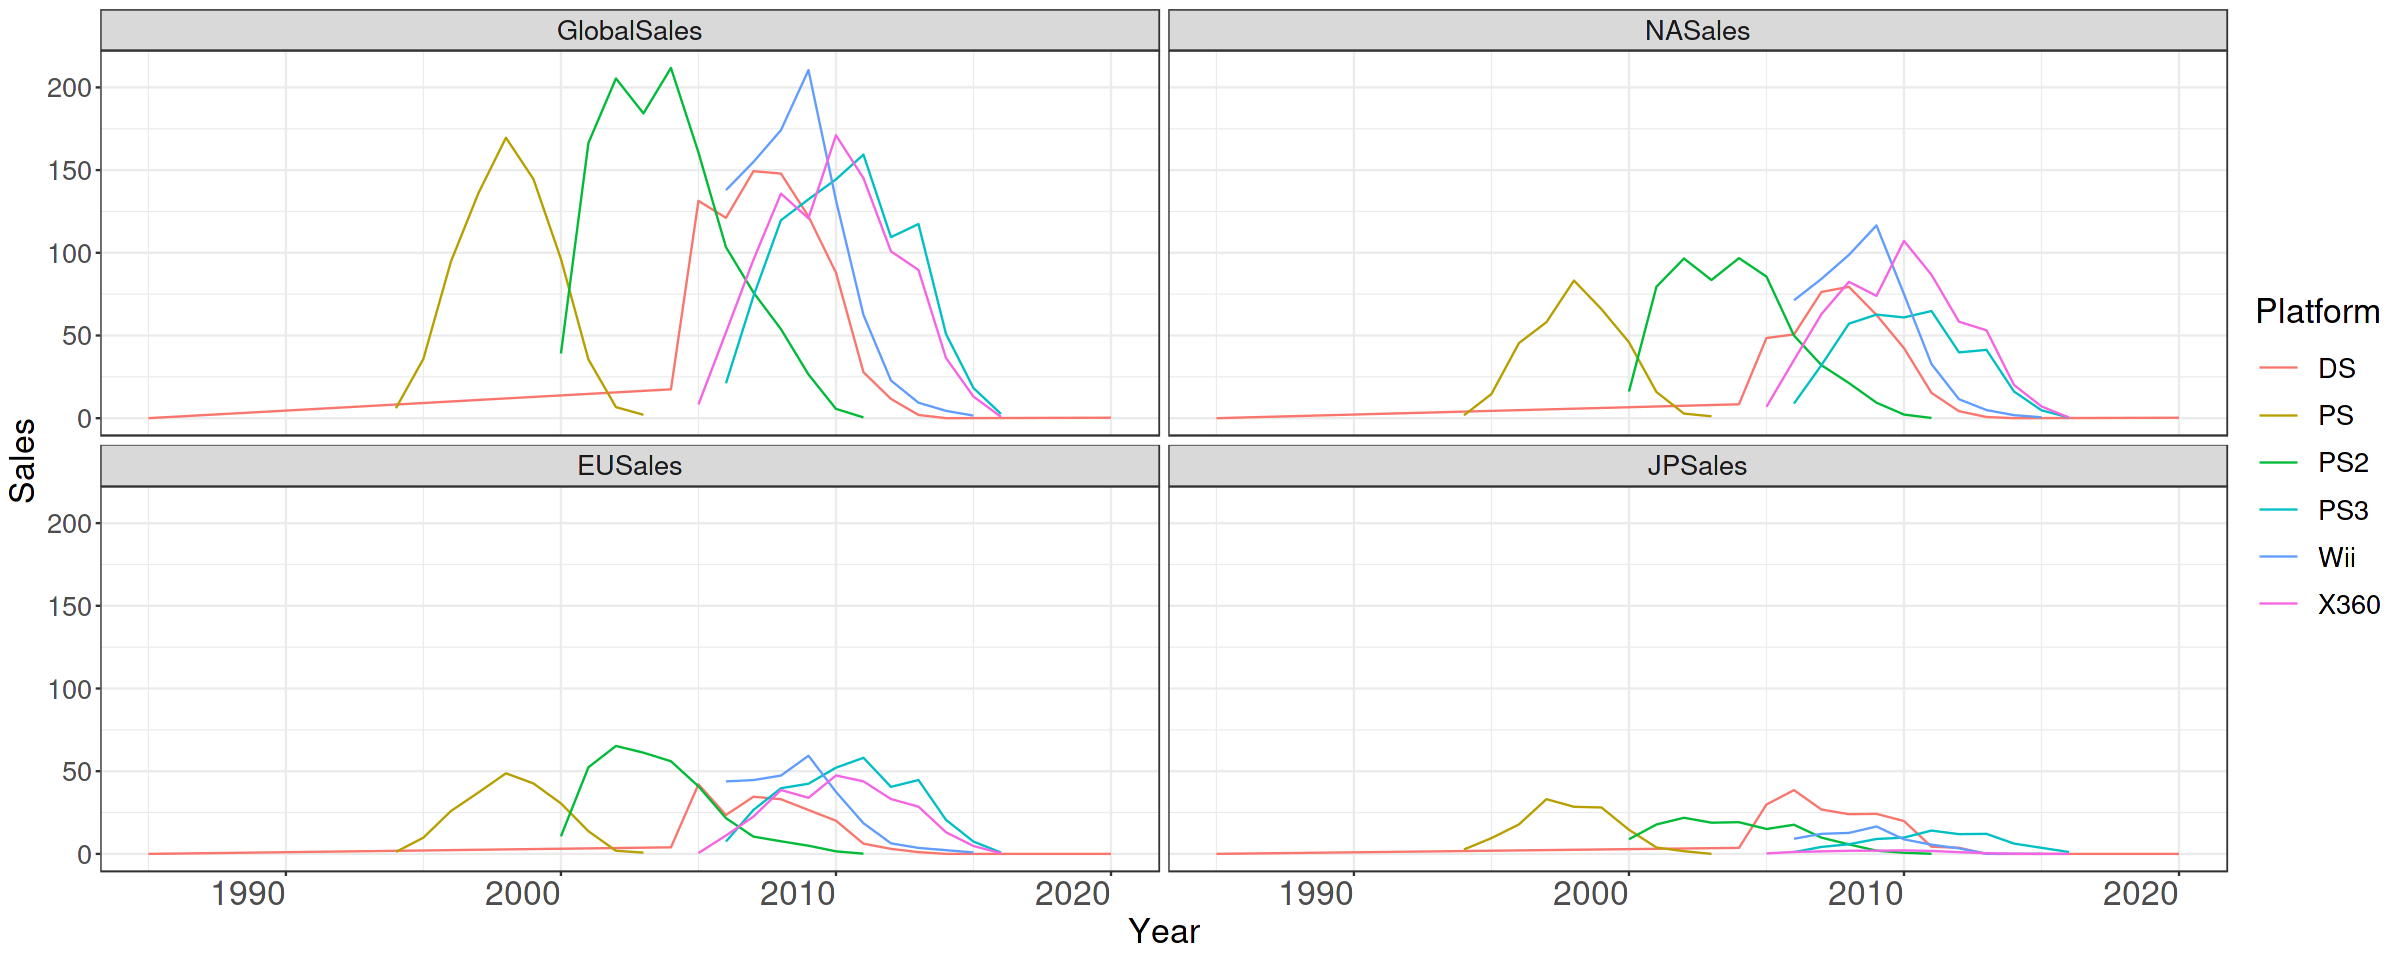

In [ ]:
sales_by_platform = game %>% 
filter(Platform %in% c("DS", "PS", "PS2", "PS3", "Wii", "X360")) %>%
group_by(Platform, Year) %>% 
summarise(GlobalSales = sum(Global_Sales), NASales = sum(NA_Sales), EUSales = sum(EU_Sales), JPSales = sum(JP_Sales))

sales_by_platform = melt(sales_by_platform)
colnames(sales_by_platform) = c("Platform", "Year", "SalesType", "Sales")
sales_by_platform$Year = as.numeric(sales_by_platform$Year)

ggplot(aes(x = Year, y = Sales, colour = Platform, group = Platform), data = sales_by_platform) + 
geom_line() + 
facet_wrap(~SalesType) +
ylab("Sales") + 
theme_bw()+
theme(axis.text.x = element_text(size=20,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm'))

## Most Popular Genre Per Year

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.

Selecting by GlobalSales



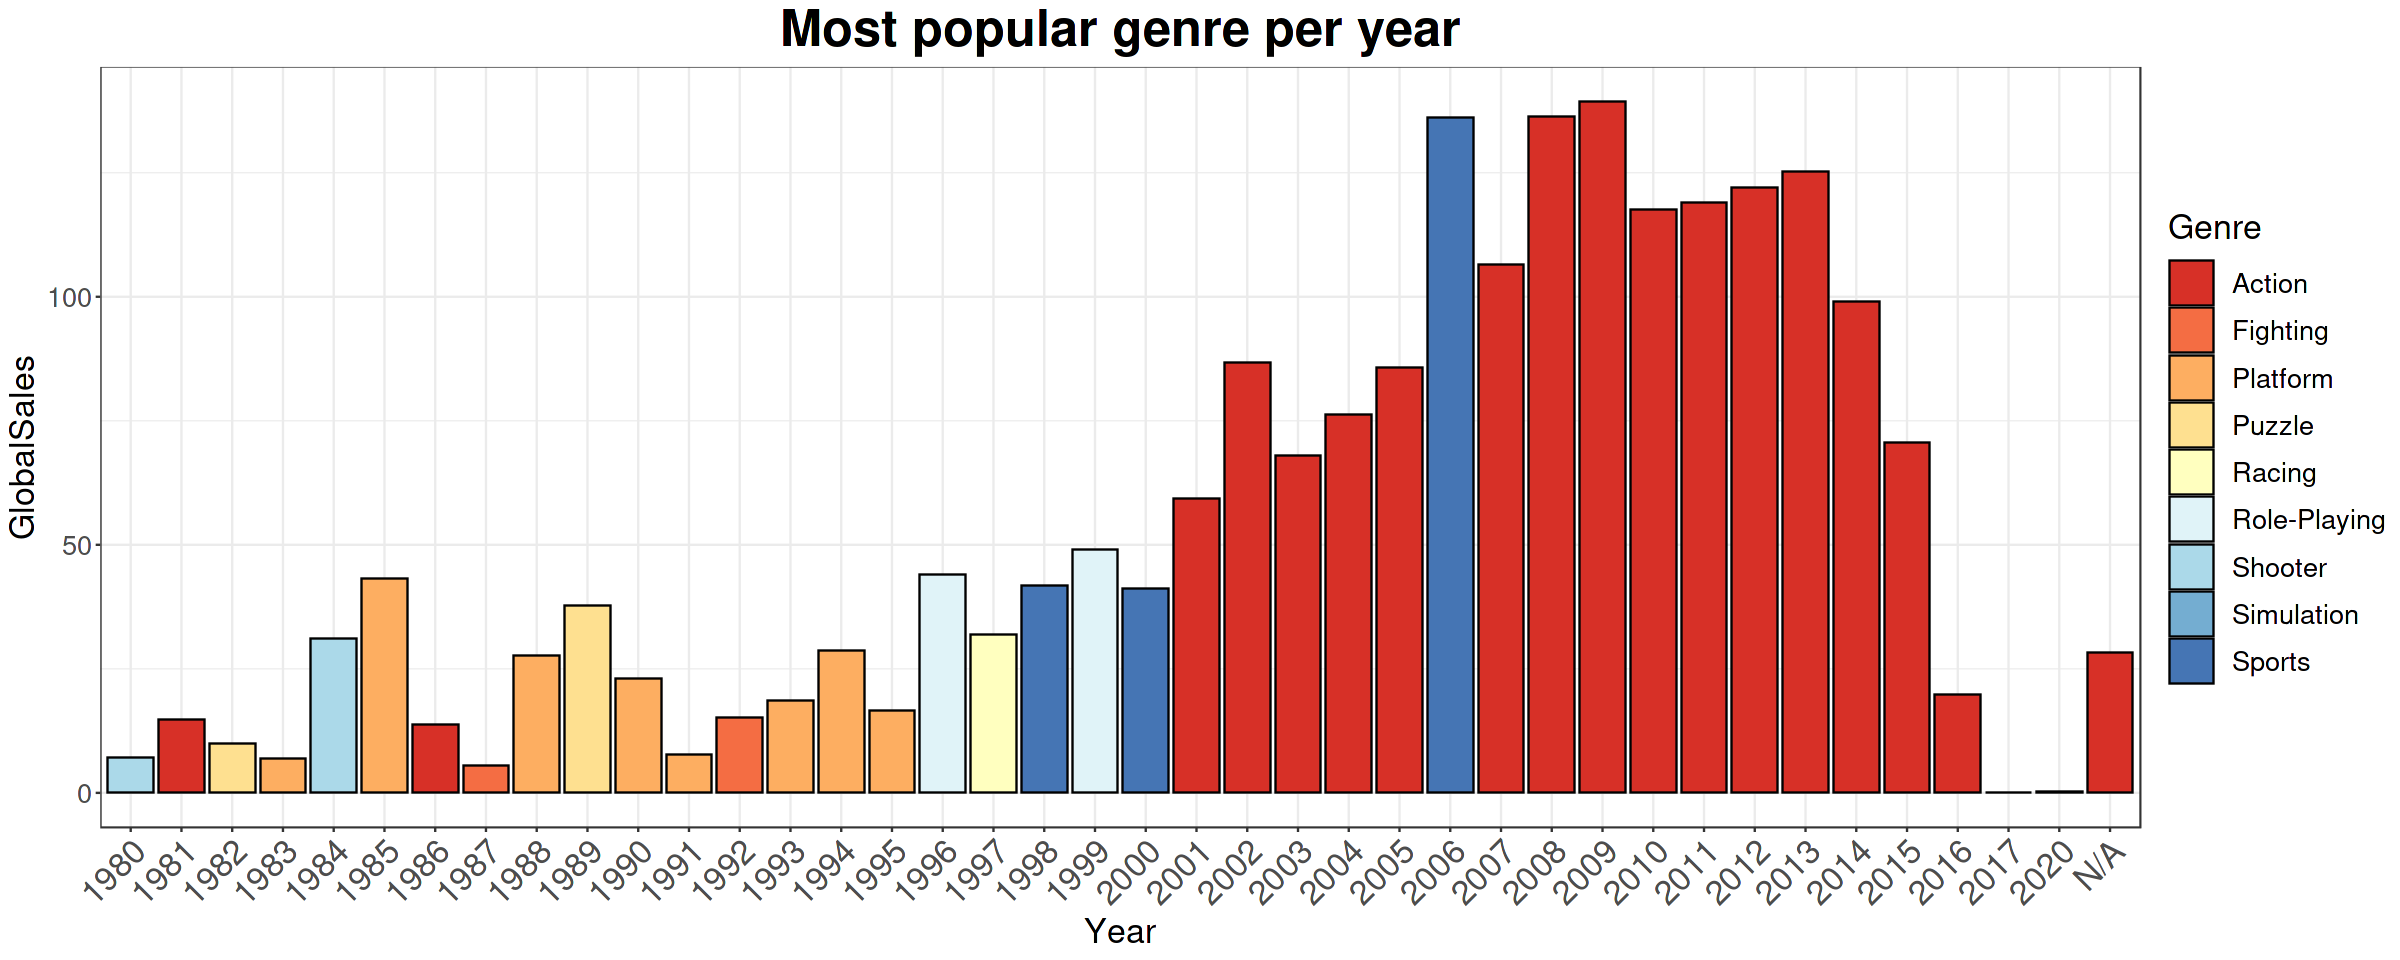

In [ ]:
popular_genre_per_year = game %>% group_by(Year,Genre) %>% 
                         summarise(GlobalSales = sum(Global_Sales)) %>%
                         arrange(desc(GlobalSales)) %>%
                         arrange(Year) %>% top_n(1)

ggplot(data = popular_genre_per_year , 
       aes(x = Year, y = GlobalSales,fill=Genre)) +
geom_bar(colour='black',stat='identity') +
ggtitle('Most popular genre per year') +
theme_bw() +
theme(axis.text.x = element_text(size=20,angle=45,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) +
scale_fill_brewer(palette = 'RdYlBu')

## Most popular game per year

Selecting by Global_Sales



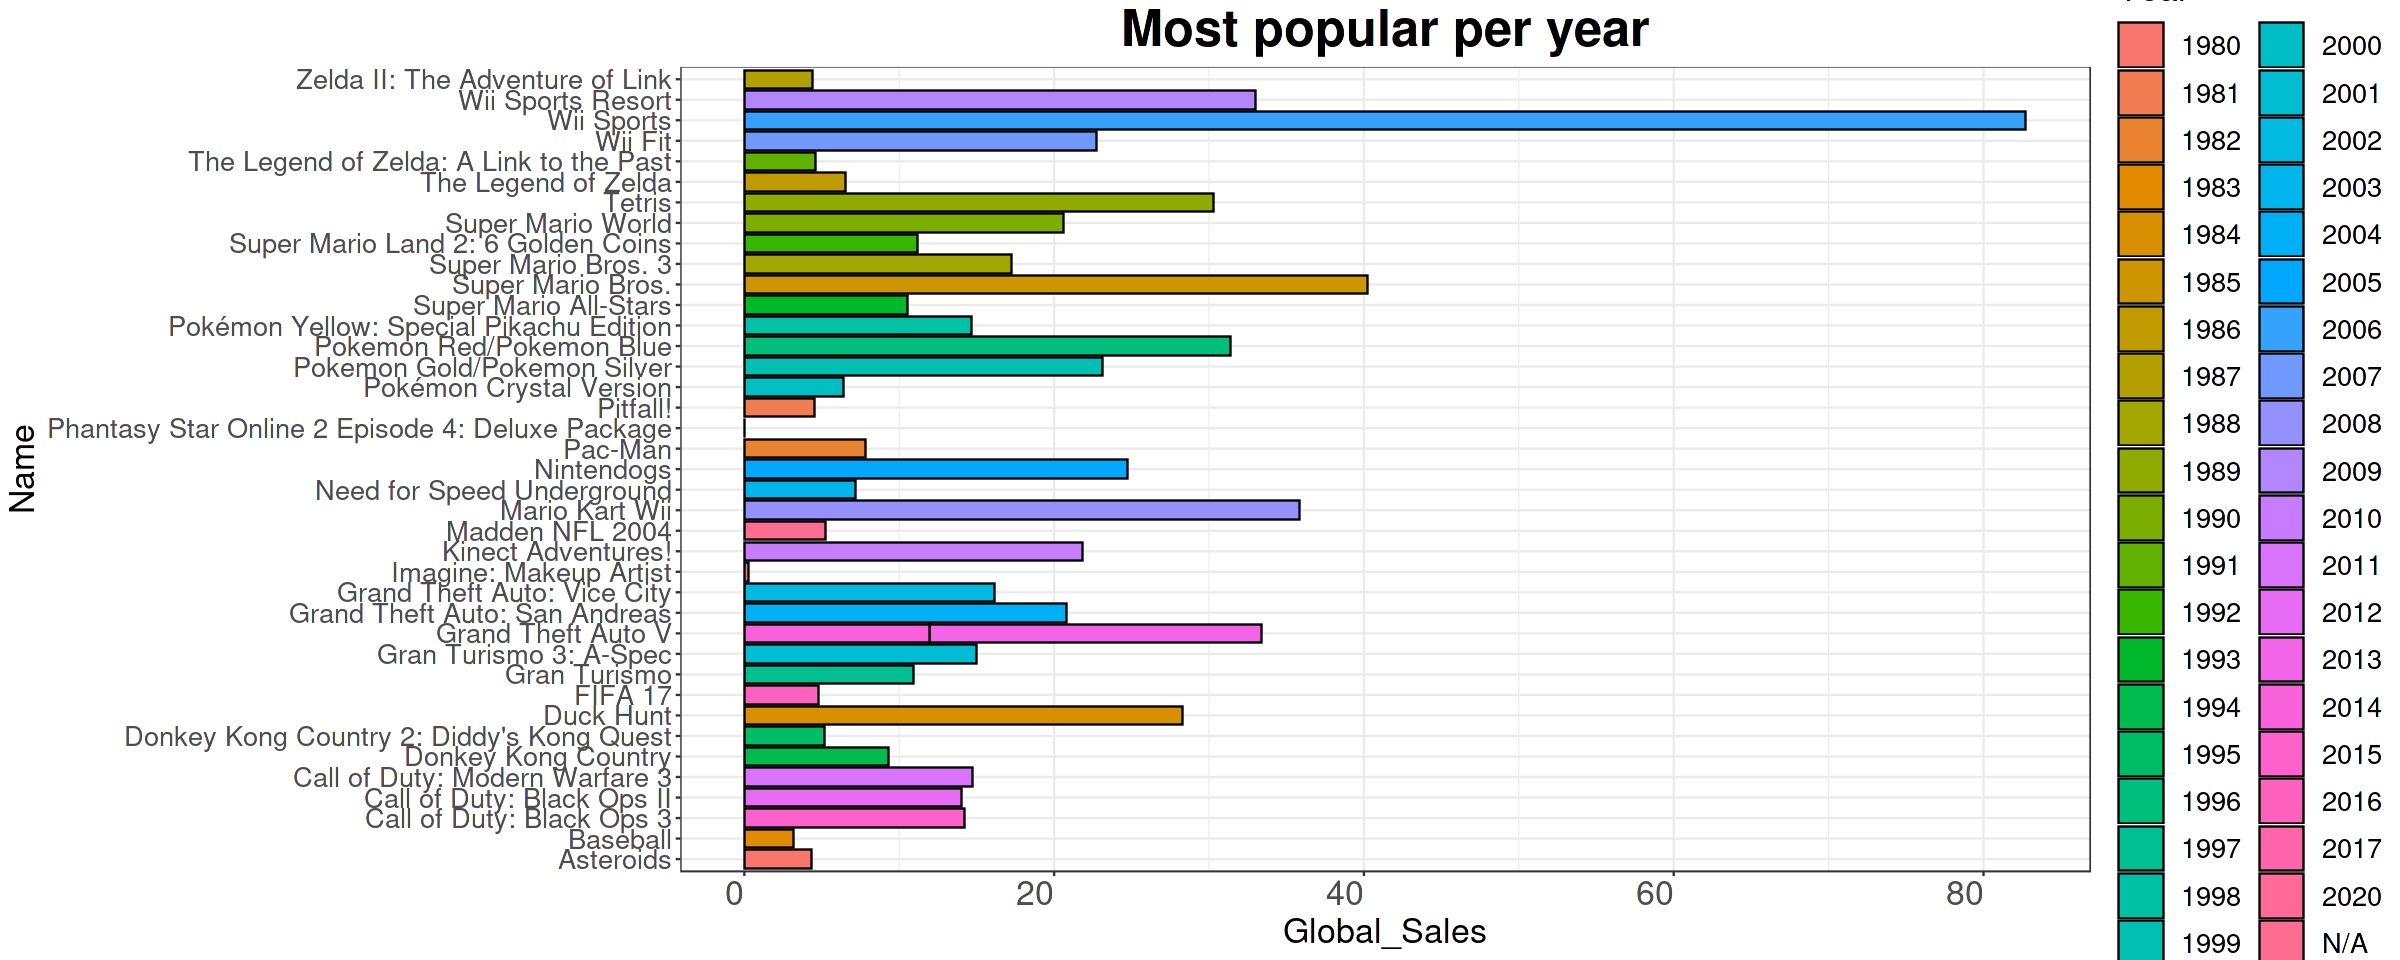

In [ ]:
game %>% group_by(Year) %>% 
               arrange(desc(Global_Sales)) %>%
               top_n(1) %>%
               ggplot(aes(x = Name,y = Global_Sales , fill = Year)) + 
               geom_bar(stat = 'identity' , colour='black') + 
               ggtitle('Most popular per year' ) + 
               theme_bw() + 
               theme(axis.text.x = element_text(size=20,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) +
               coord_flip()

## Most popular games in various genres

Selecting by Global_Sales



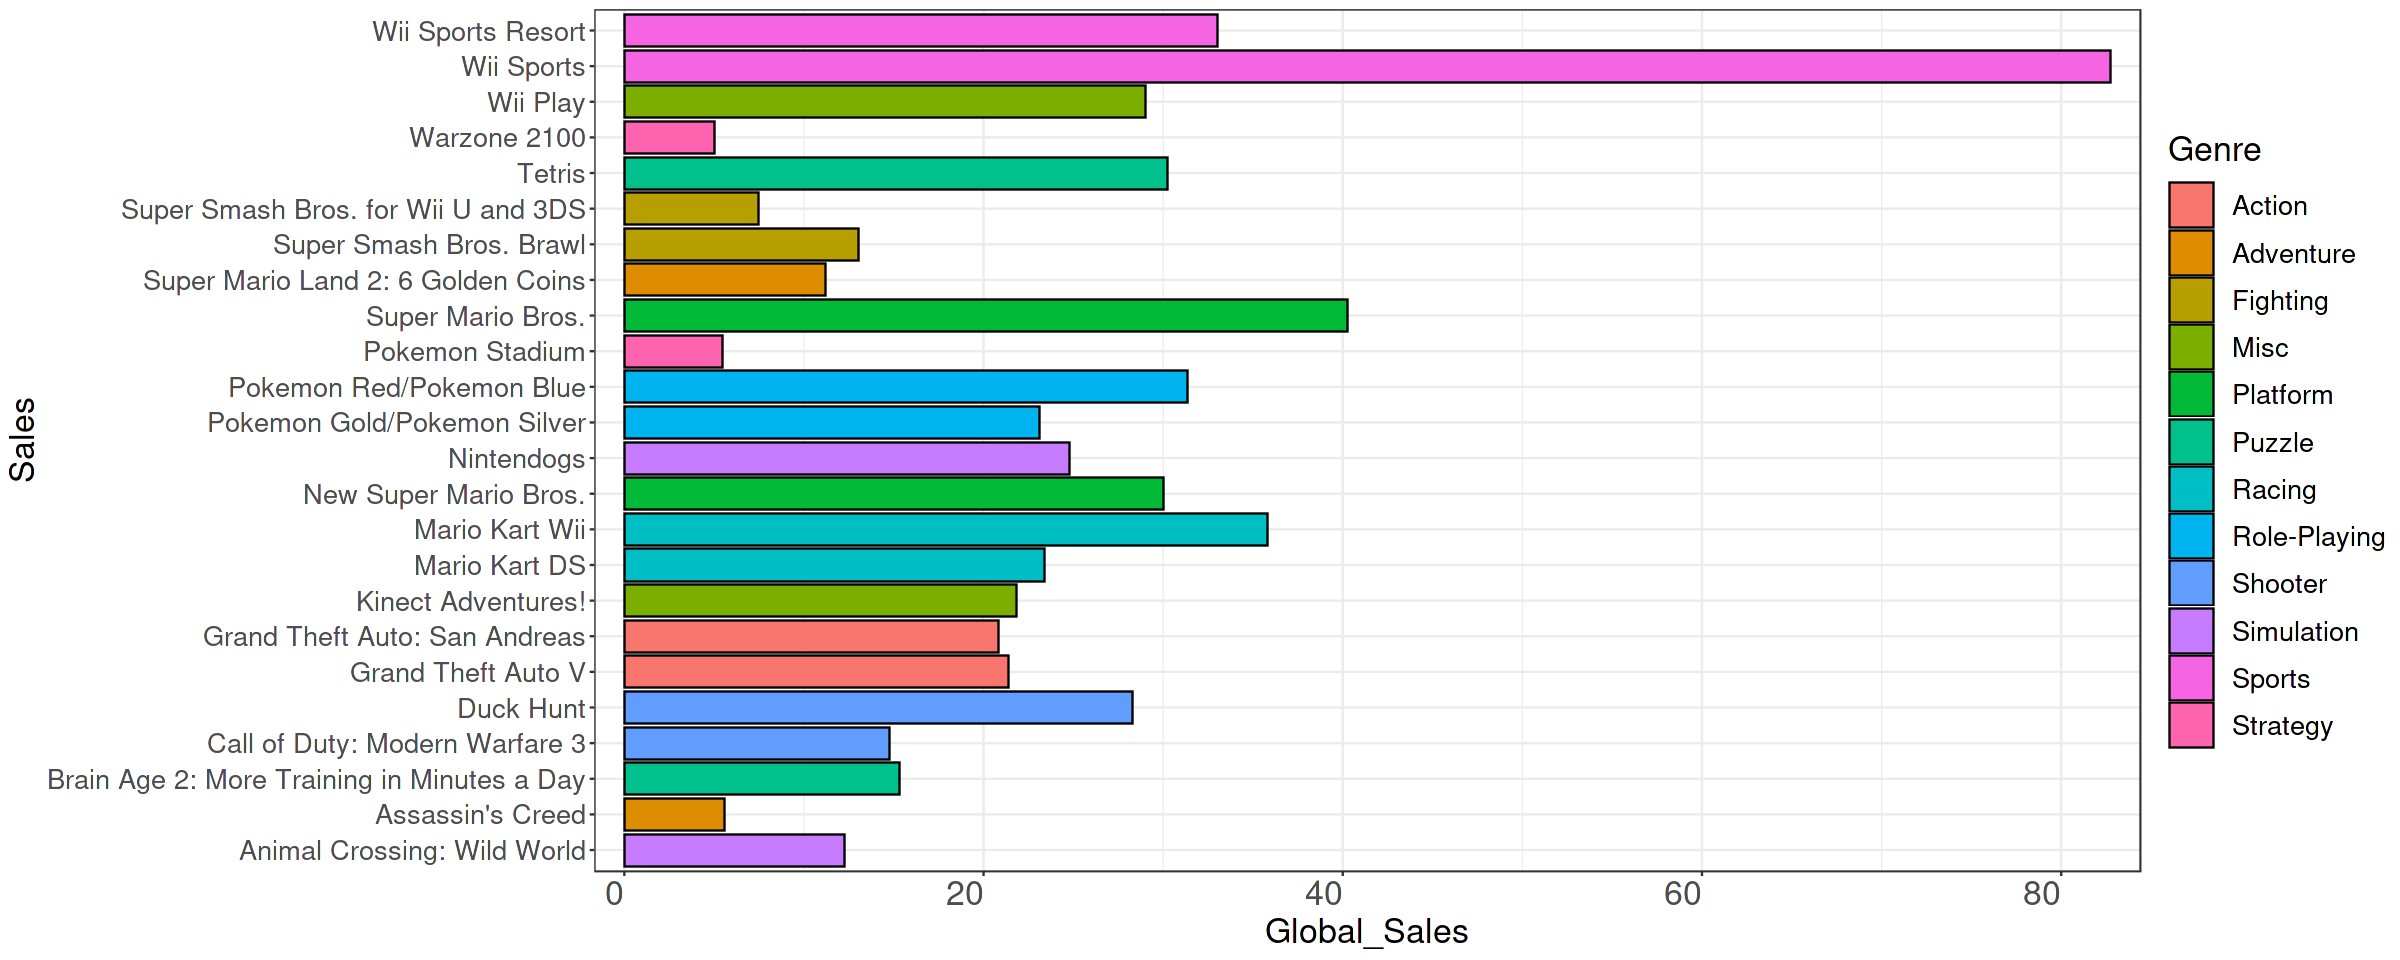

In [ ]:
game %>% group_by(Genre) %>% 
arrange(desc(Global_Sales)) %>%  
top_n(2) %>%
ggplot(aes(x = Name, y = Global_Sales, fill = Genre)) + 
geom_bar(stat = "identity", colour = "black") + 
theme_bw() + theme(axis.text.x = element_text(size=20,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm')) +
scale_y_continuous(expand = c(.02, .02)) + 
xlab("Sales") + 
coord_flip()

## Distribution of Genres

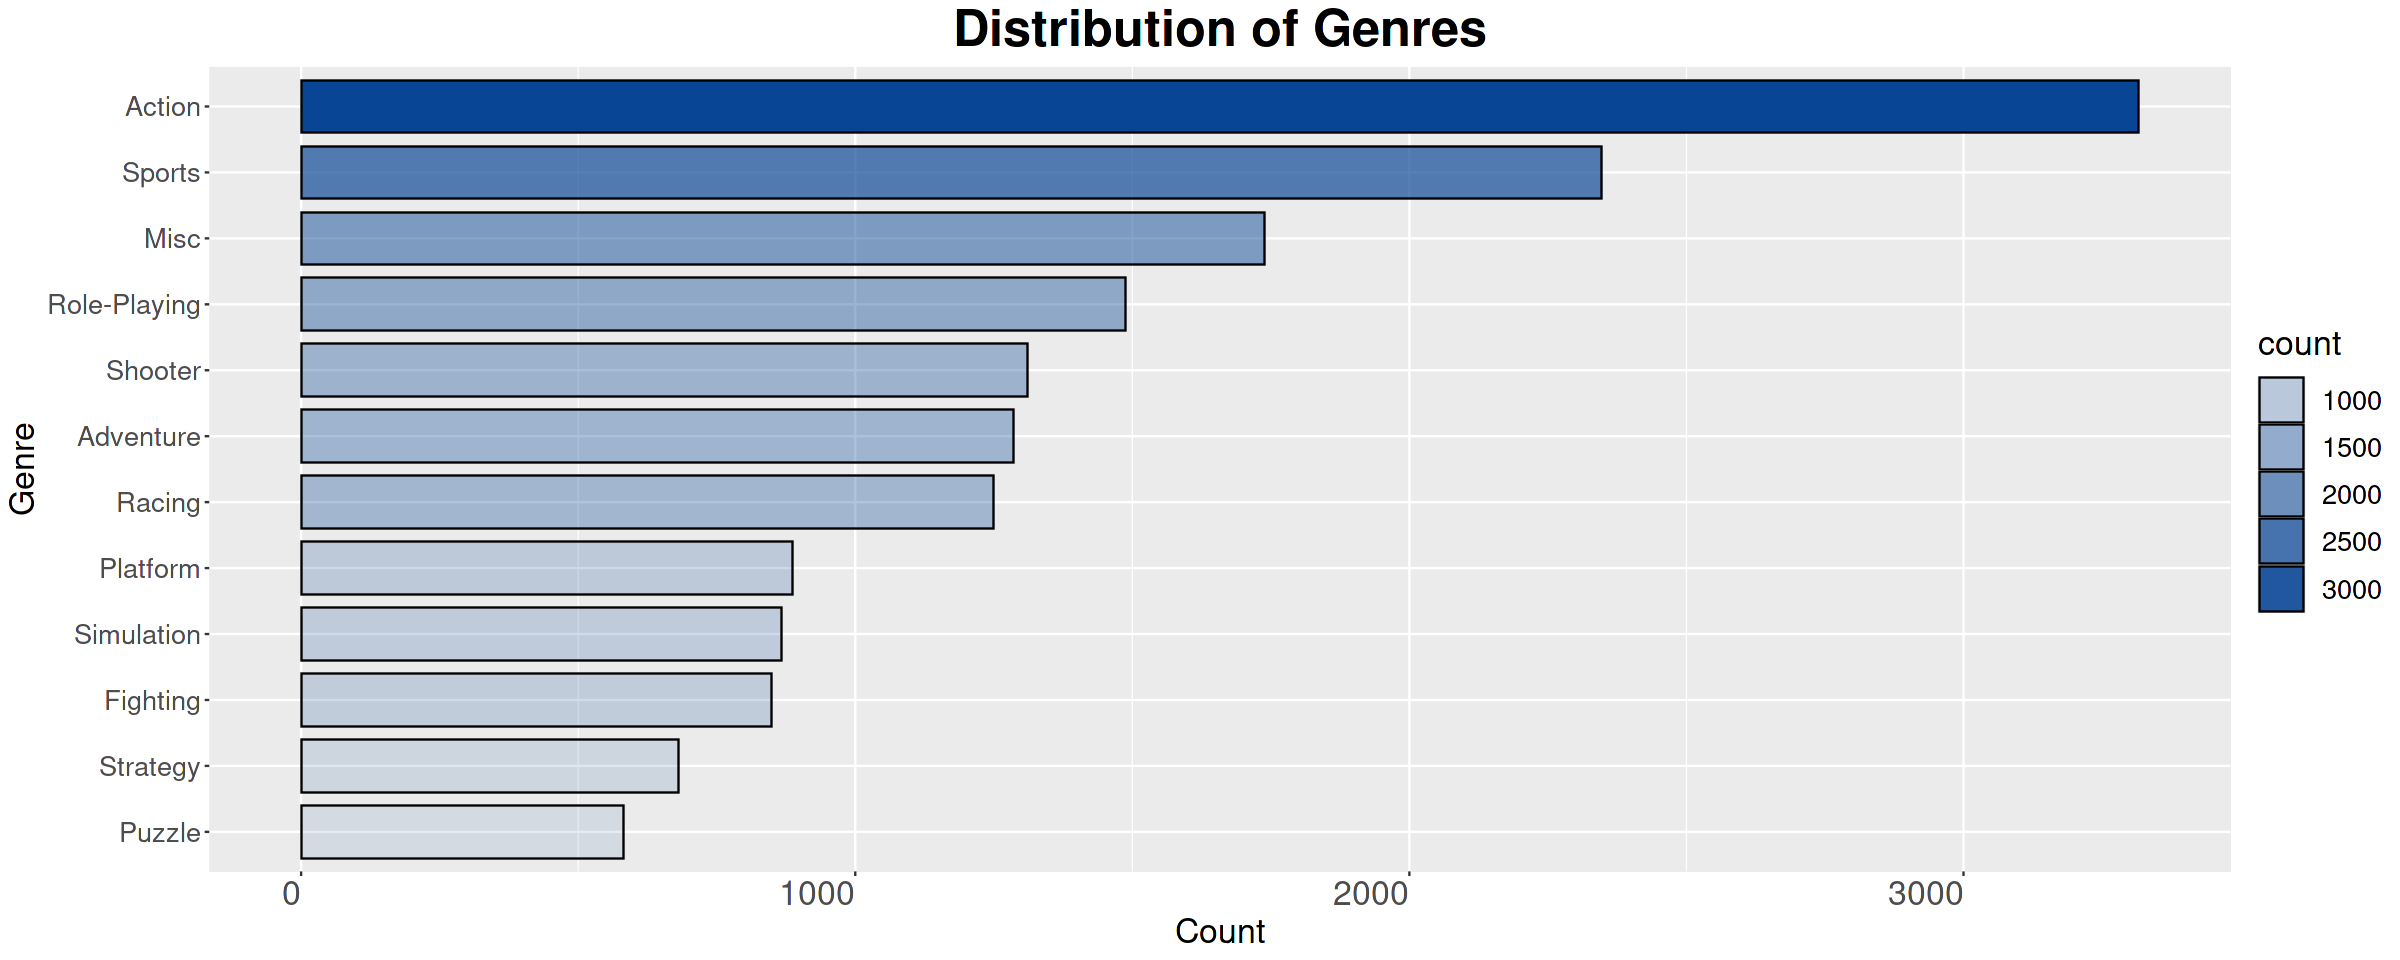

In [ ]:
genre = group_by(game, Genre) %>%
  dplyr::summarise(count=n()) %>%
  arrange(desc(count))

ggplot(genre, aes(x = reorder(factor(Genre), count), y=count, alpha=count)) + 
  geom_bar(colour = "black", fill=colors[8], width = 0.8, stat="identity") + 
  xlab("Genre") + 
  ylab("Count") + 
  ggtitle("Distribution of Genres") +
    theme(axis.text.x = element_text(size=20,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm'))+
  coord_flip()

## Genre Distribution per year

`summarise()` has grouped output by 'Platform'. You can override using the `.groups` argument.



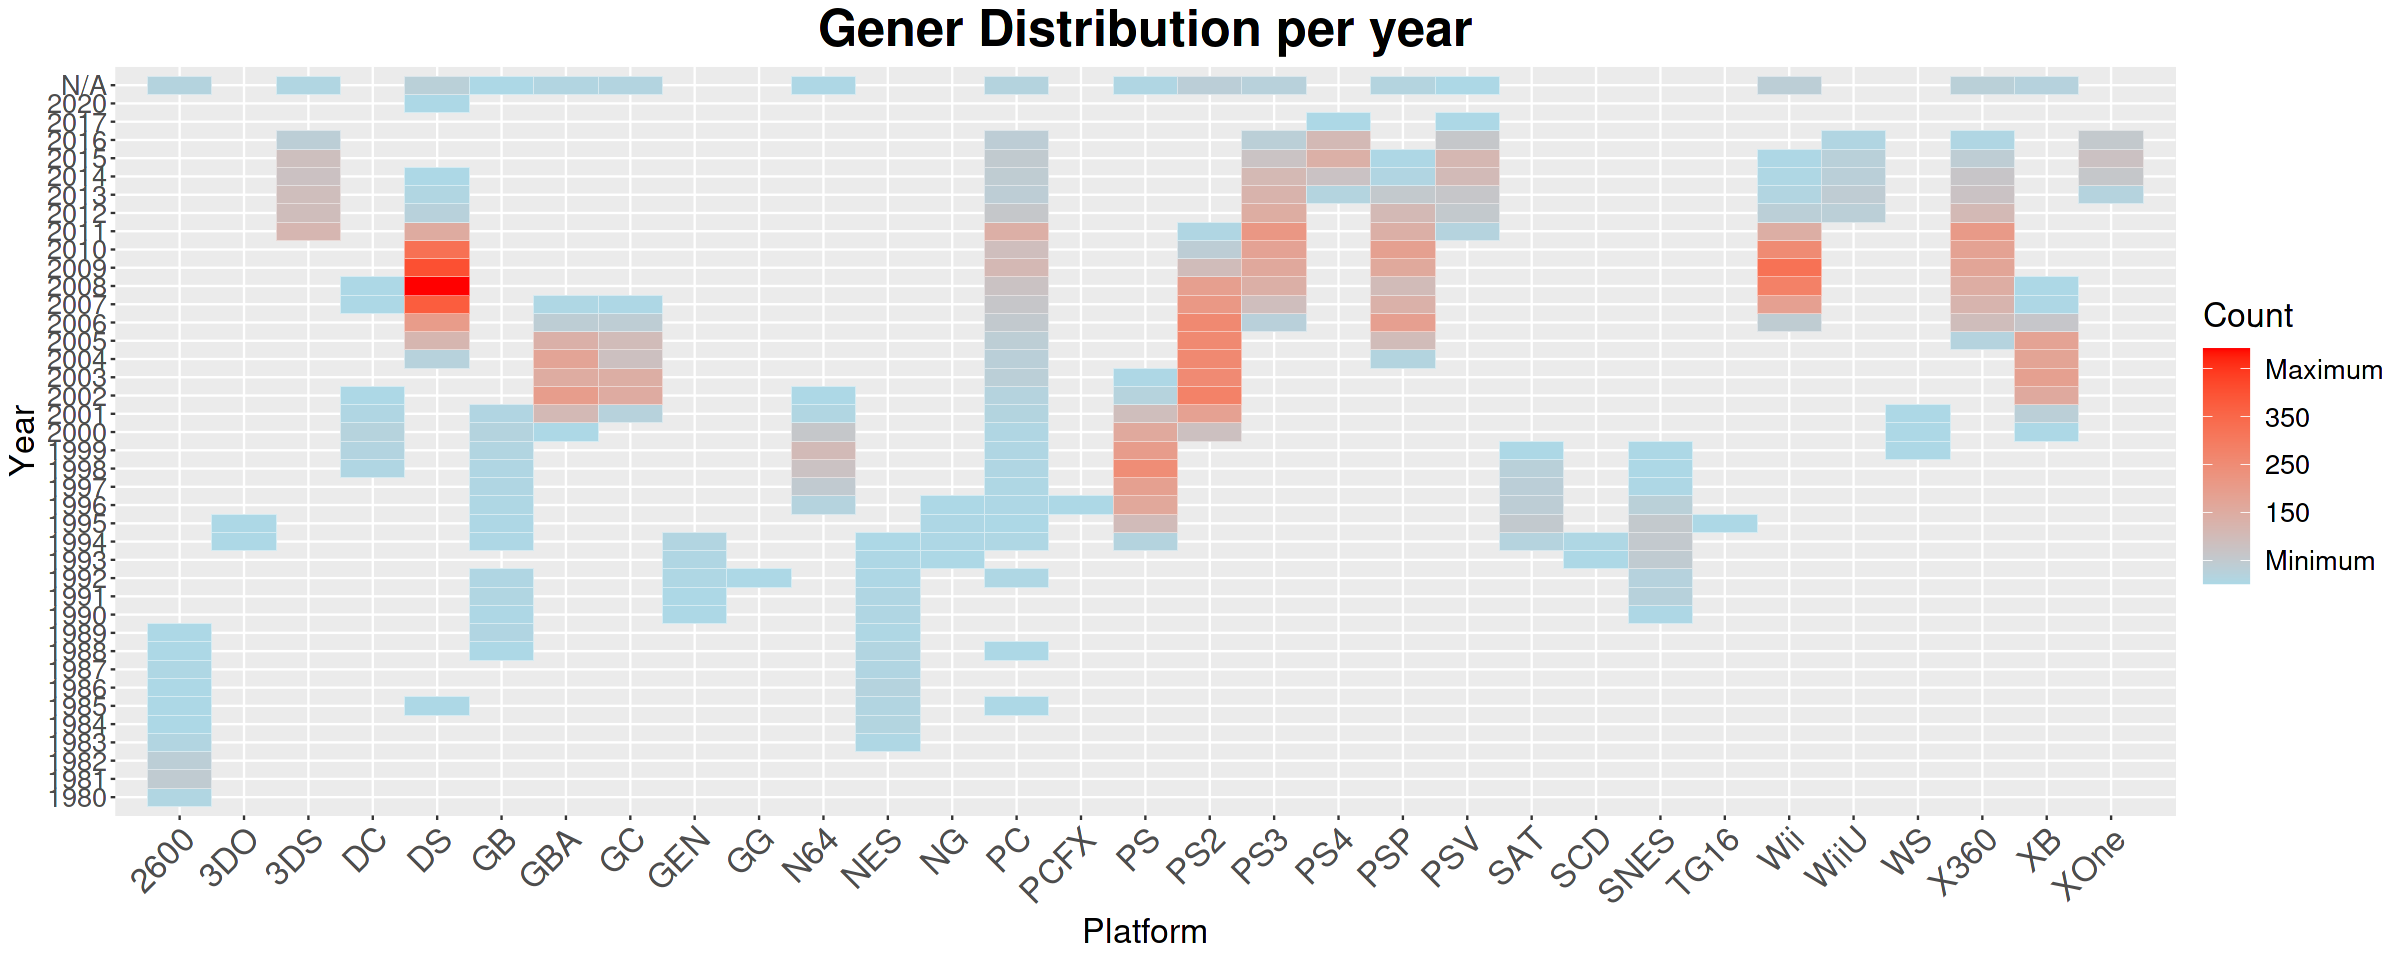

In [ ]:
     
platform_per_year = game %>% group_by(Platform,Year) %>% summarise(Count = n()) %>% arrange(Year)
ggplot(data = platform_per_year , aes(x = Platform , y = Year)) +
geom_tile(aes(fill=Count),colour='white') + 
theme(axis.text.x = element_text(angle=90,hjust=1),
      plot.title = element_text(hjust=.5)) +
ggtitle('Gener Distribution per year') + 
theme(axis.text.x = element_text(size=20,angle=45,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm'))+
scale_fill_gradient(low='lightblue',high='red',breaks=c(50,150,250,350,450),
                    labels=c('Minimum',150,250,350,'Maximum')) +
scale_x_discrete(expand=c(0,1))+ ## distance away from axes
scale_y_discrete(expand=c(0,1)) ## distance away from top axes

## Top 5 Publishers (Global Sales) over the Decades

In [ ]:
top5bydecades <- game %>% 
  mutate(decade = cut(as.numeric(Year), breaks = c(1980, 1990, 2000, 2010, 2020), 
                      labels = c("1980s", "1990s", "2000s", "2010s"), ordered_result = TRUE)) %>% 
  filter(!is.na(decade)) %>% 
  group_by(decade, Publisher) %>% 
  summarise(Sum_Sales = sum(Global_Sales)) %>% 
  arrange(decade, desc(Sum_Sales)) %>% 
  top_n(5)

`summarise()` has grouped output by 'decade'. You can override using the `.groups` argument.

Selecting by Sum_Sales



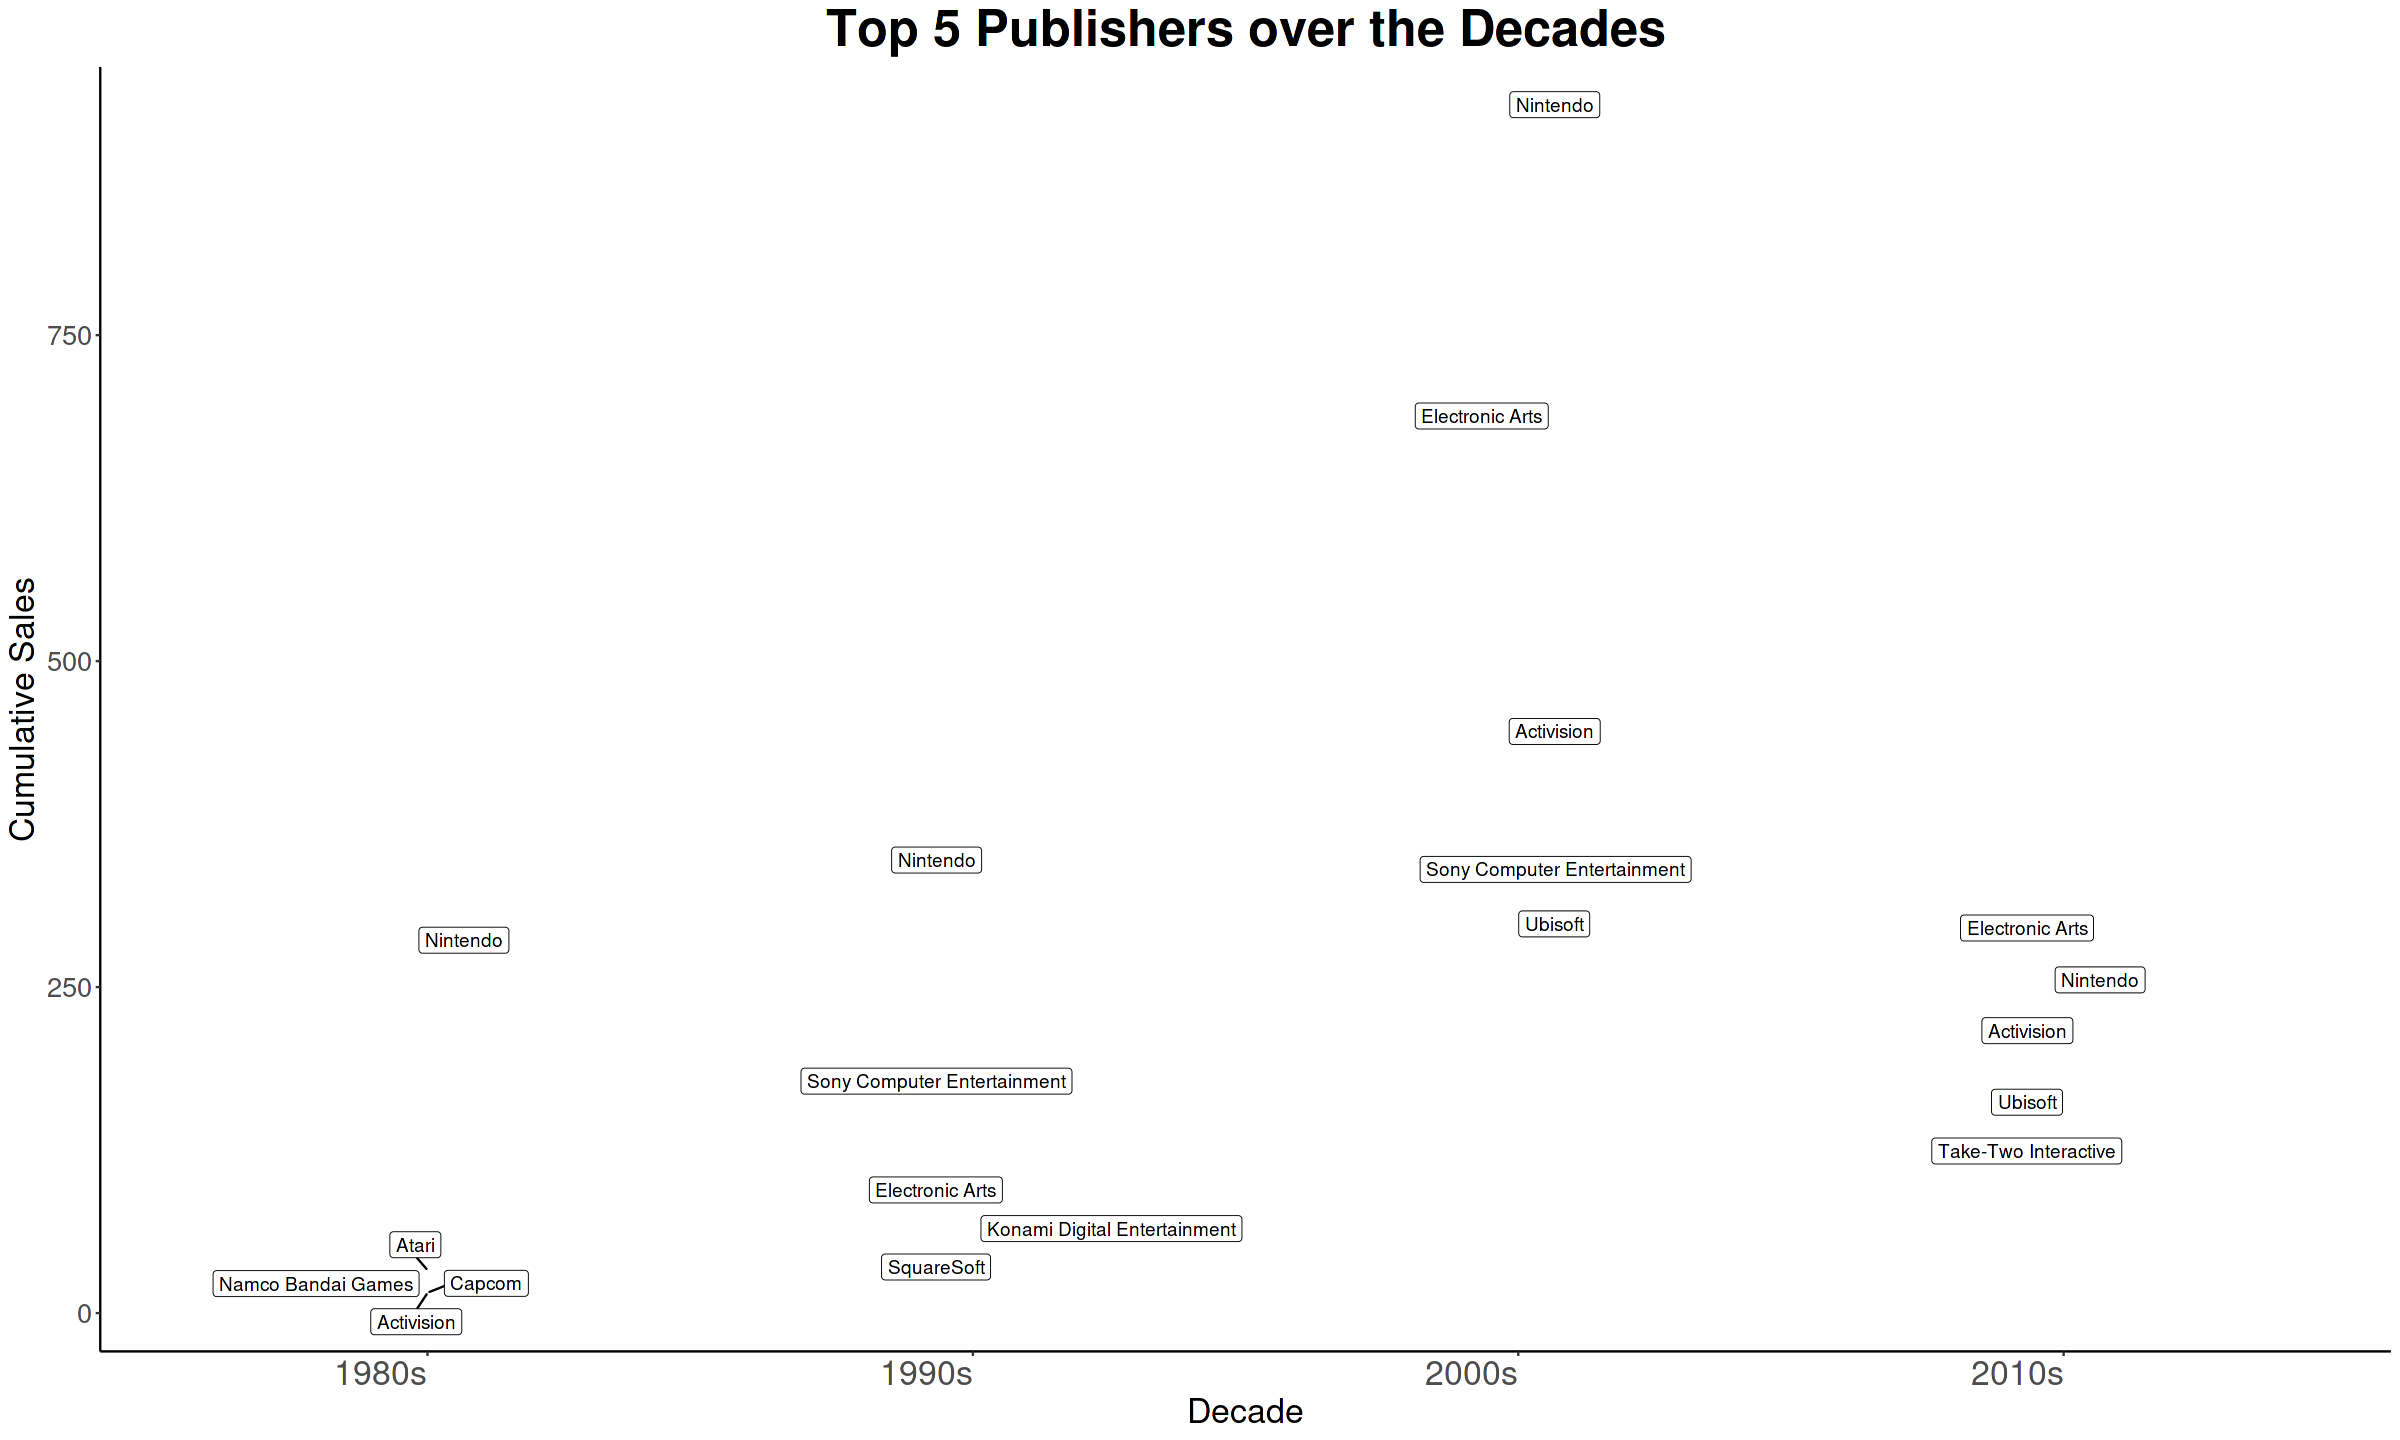

In [ ]:
top5bydecades %>% 
  ggplot(aes(x = decade, y = Sum_Sales)) +
  geom_label_repel(aes(label = Publisher), label.size = 0.2) +
  labs(title = "Top 5 Publishers over the Decades", x = "Decade", y = "Cumulative Sales") +
  theme_classic() +
  theme(axis.text.x = element_text(size=20,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm'))

## XBOX vs PlayStation

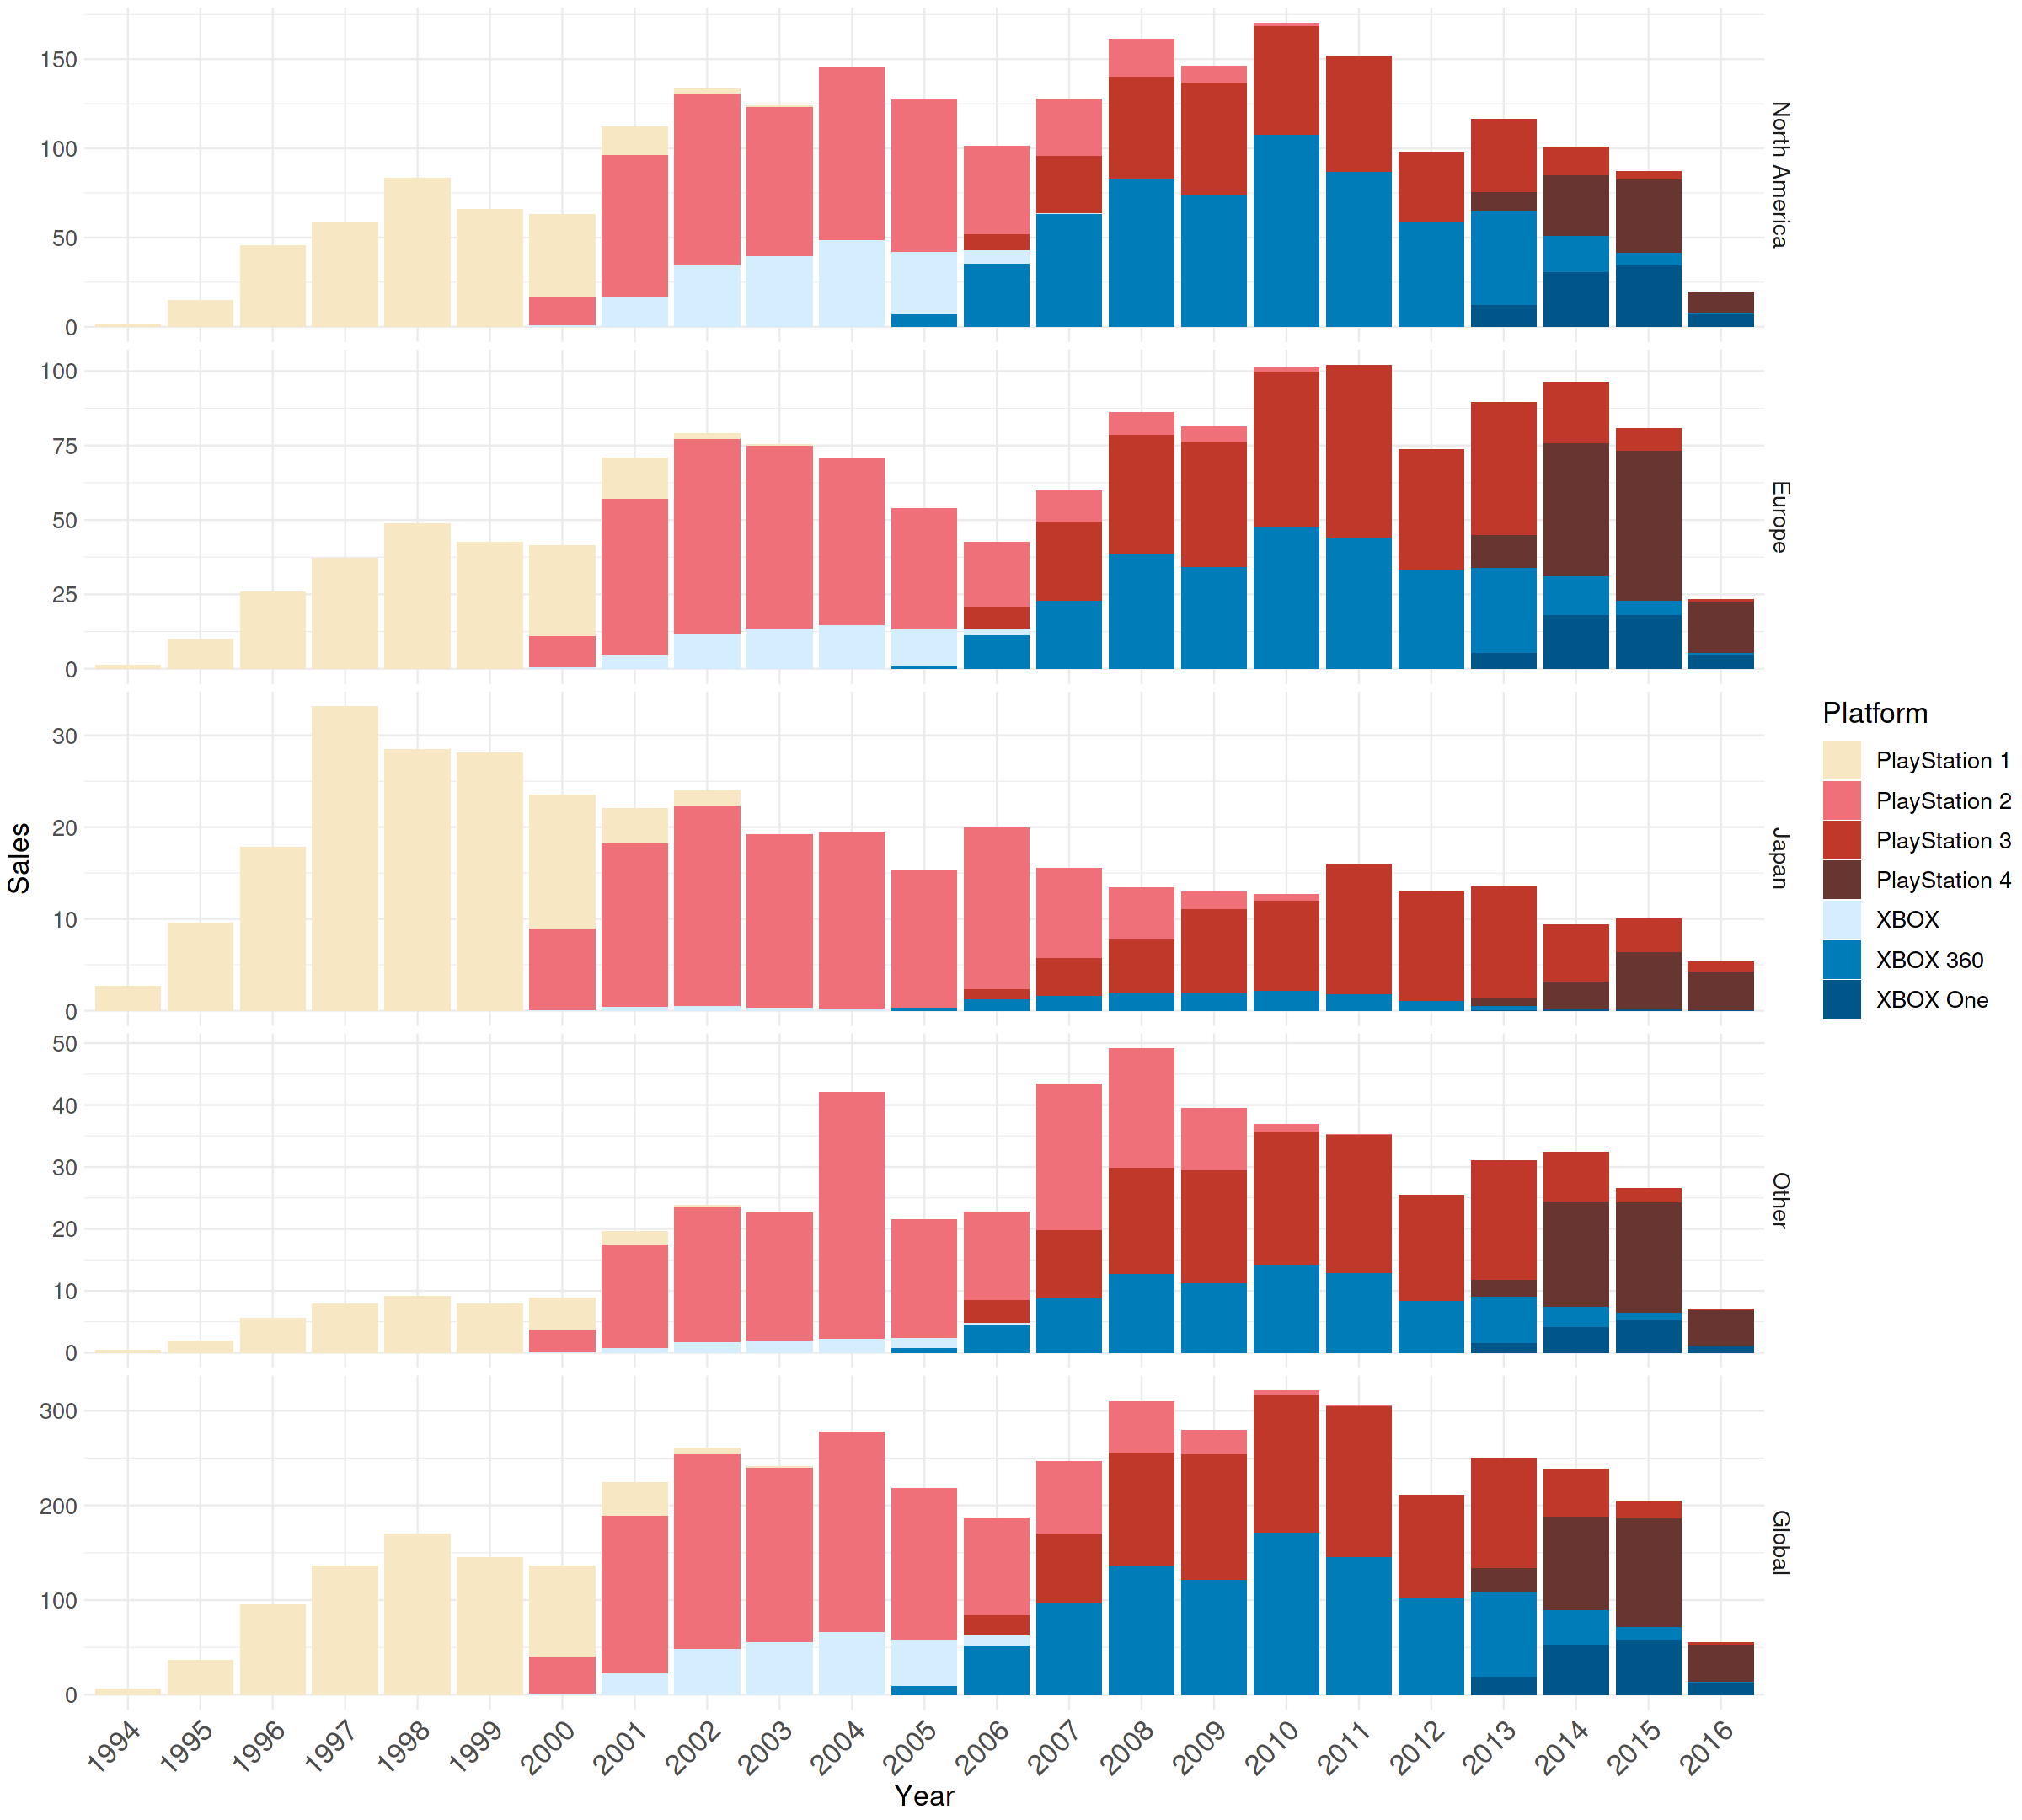

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 18)
xbox_ps <- game %>% 
  filter(Platform %in% c("XB", "X360", "XOne", "PS", str_c("PS", 2:4))) %>% 
  mutate(Platform = plyr::mapvalues(Platform, from = c("XB", "X360", "XOne", "PS", str_c("PS", 2:4)),
                                    to = c(str_c("XBOX", c("", " 360", " One")), str_c("PlayStation ", 1:4)))) %>% 
  group_by(Year, Platform) %>% 
  summarise_if(is.numeric, sum) %>% 
  ungroup() %>% 
  gather(Region, Sales, NA_Sales:Global_Sales) %>% 
  mutate(Region = str_replace(Region, "_Sales$", "") %>% 
           factor(levels = c("NA", "EU", "JP", "Other", "Global"),
                  labels = c("North America", "Europe", "Japan", "Other", "Global"))) %>% 
  filter(!str_detect(Year, "N/A|2017"))

xbox_ps %>% 
  ggplot(aes(x = Year, y = Sales)) +
  geom_bar(aes(fill = Platform), stat = "identity") +
  facet_grid(Region~., scales = "free") +
  theme_minimal() +
theme(axis.text.x = element_text(size=20,angle=45,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm'))+
  scale_fill_manual(values = c("PlayStation 1" = "#F7E8C3", "PlayStation 2" = "#EF7079", "PlayStation 3" = "#BF382A", "PlayStation 4" = "#683531", 
                               "XBOX" = "#D5EEFF", "XBOX 360" = "#007CB9", "XBOX One" = "#005689"))
    

## Top 10 Publiaher by Revenue

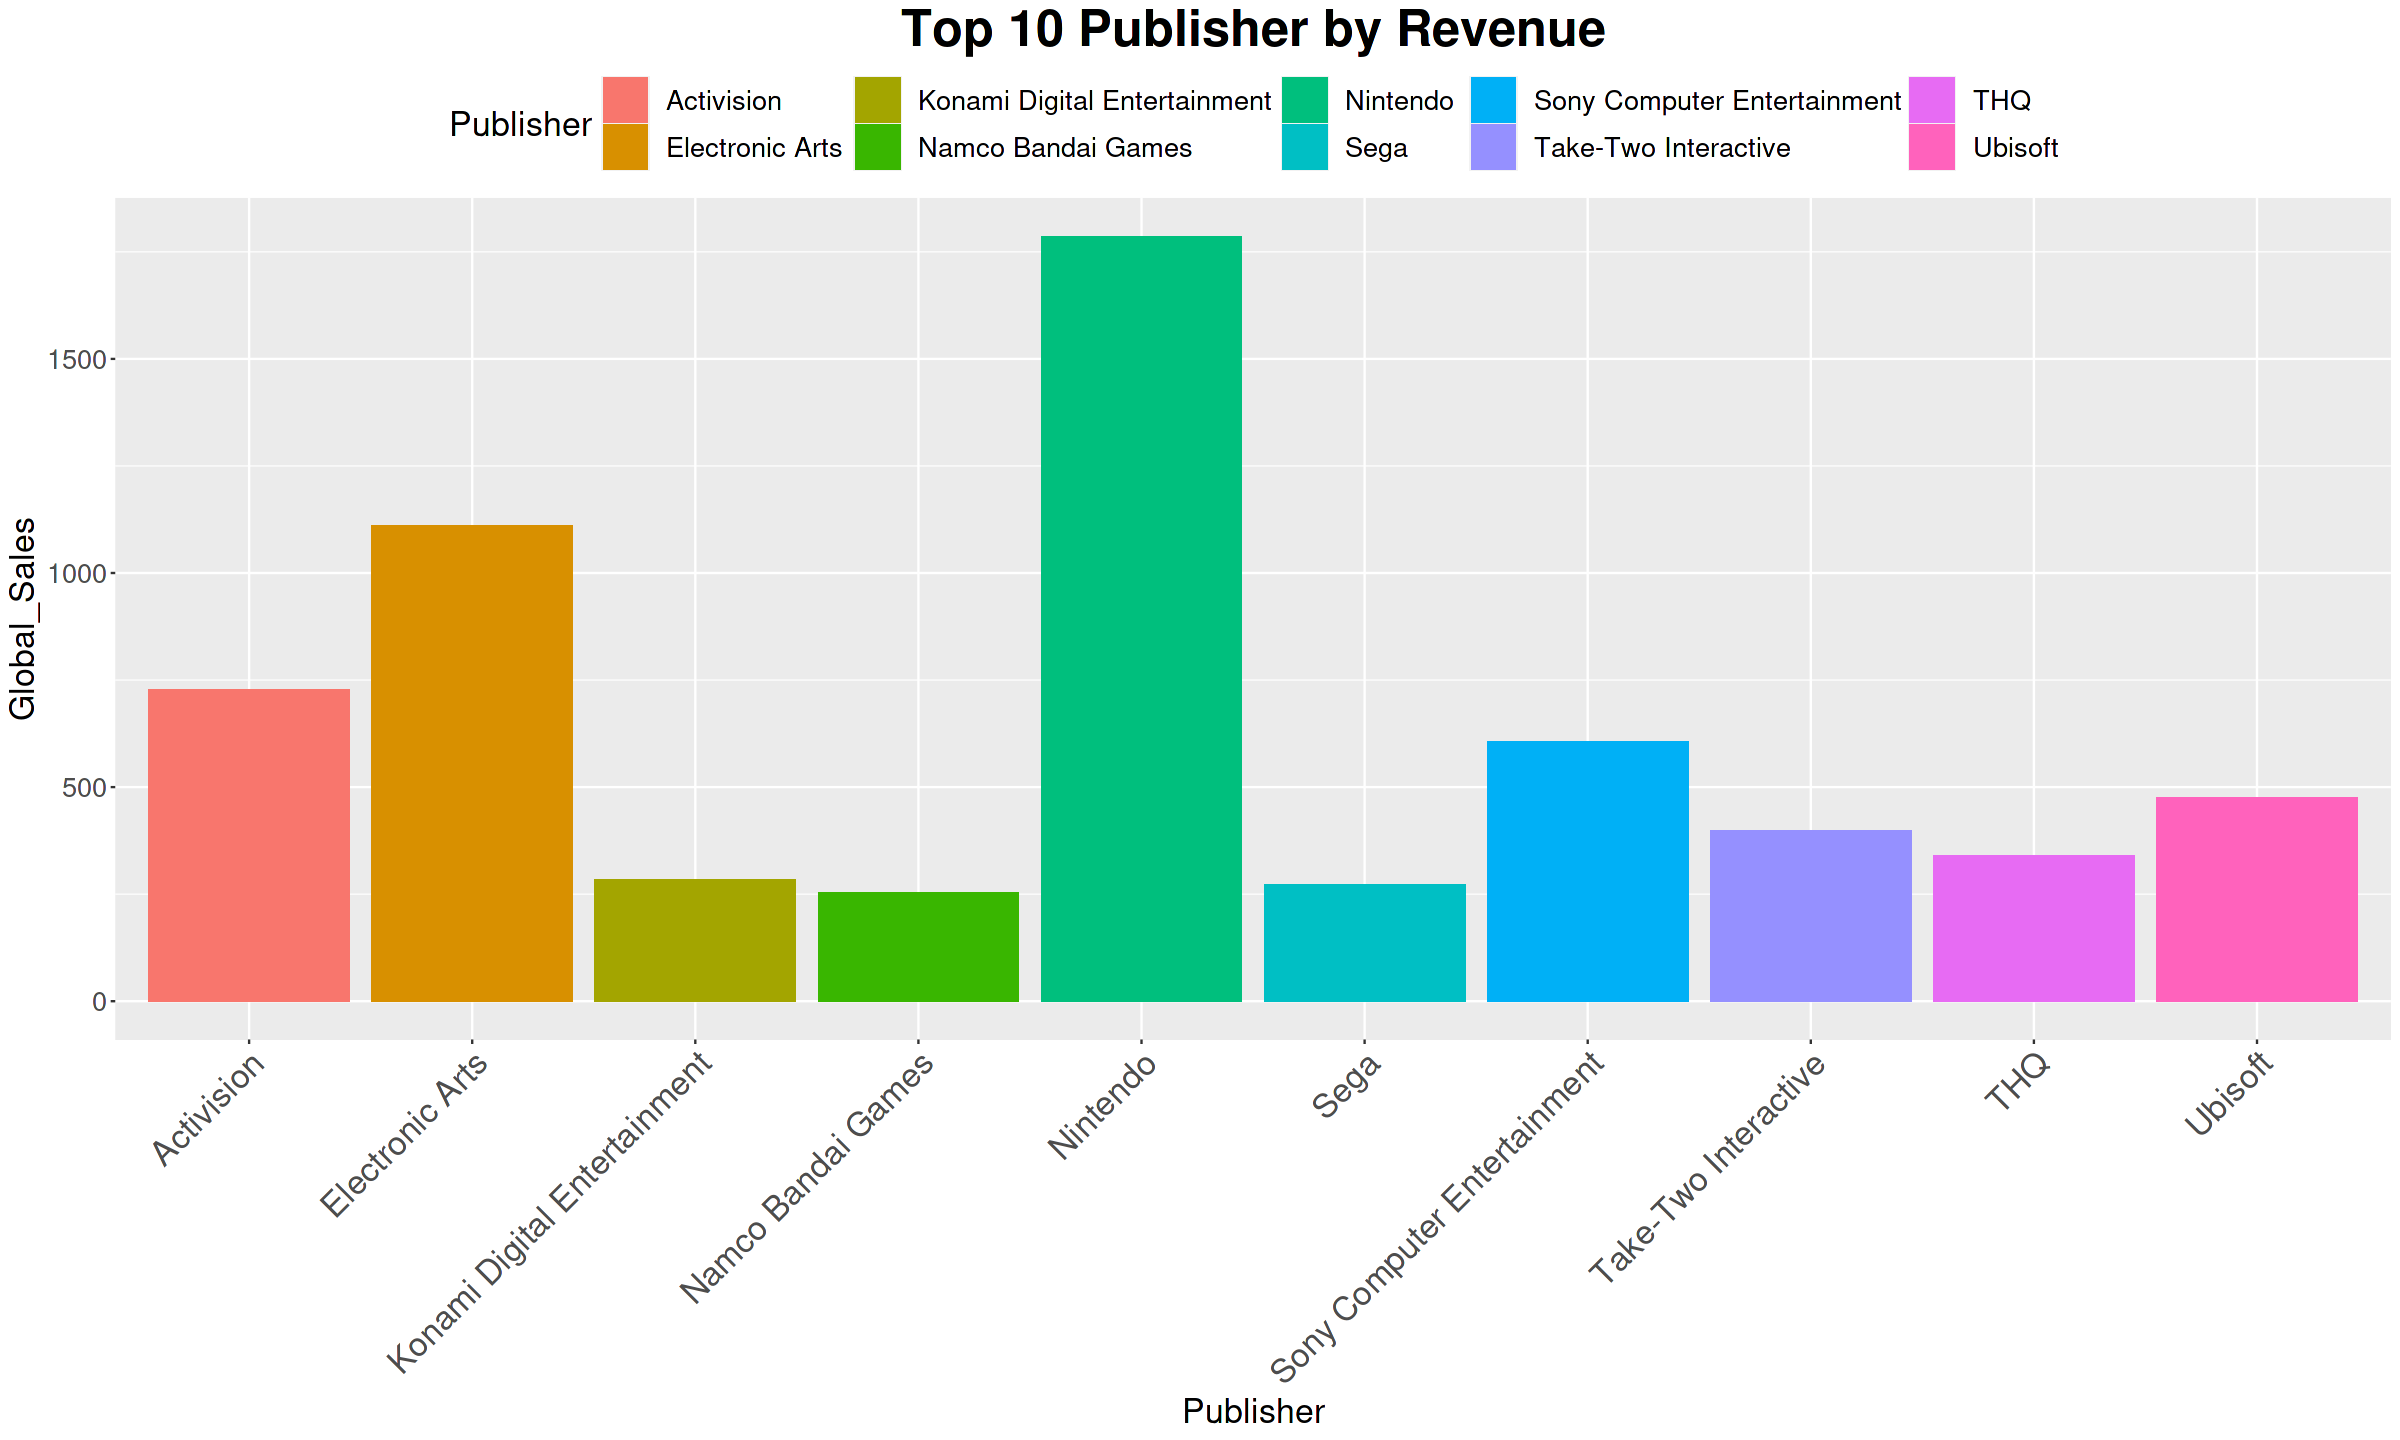

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 12)
#Histogram of top 10 Publisher by revenue
revenue_of_Publisher=aggregate(Global_Sales~Publisher,game,sum)
arrange_Revenue_of_Publisher_by_Global_Sales=arrange(revenue_of_Publisher,desc(Global_Sales))
top_10=arrange_Revenue_of_Publisher_by_Global_Sales[1:10,]
#plot(factor(top_10$Publisher),top_10$Global_Sales,type='h',lwd = 8,xlab="Publisher",ylab="Global Sales",col = "red",main = "Top 10 Publishers by Revenue")
ggplot(top_10,aes(Publisher,Global_Sales, fill=Publisher))+
  geom_bar(stat = "identity")+
  ggtitle("Top 10 Publisher by Revenue") +
  theme(axis.text.x = element_text(size=20,angle=45,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm'),
      legend.position = "top")

Observation: Nintendo is a top publisher followed by Electronic Arts, Activision, Sony Computer Entertainment, Ubisoft, Take-Two Interactive, THQ, Konami Digital Entertainment, Sega and Namco Bandai Games.

## Top 10 Game By Revenue In Each Year

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.

Selecting by Toal_Global_Sales



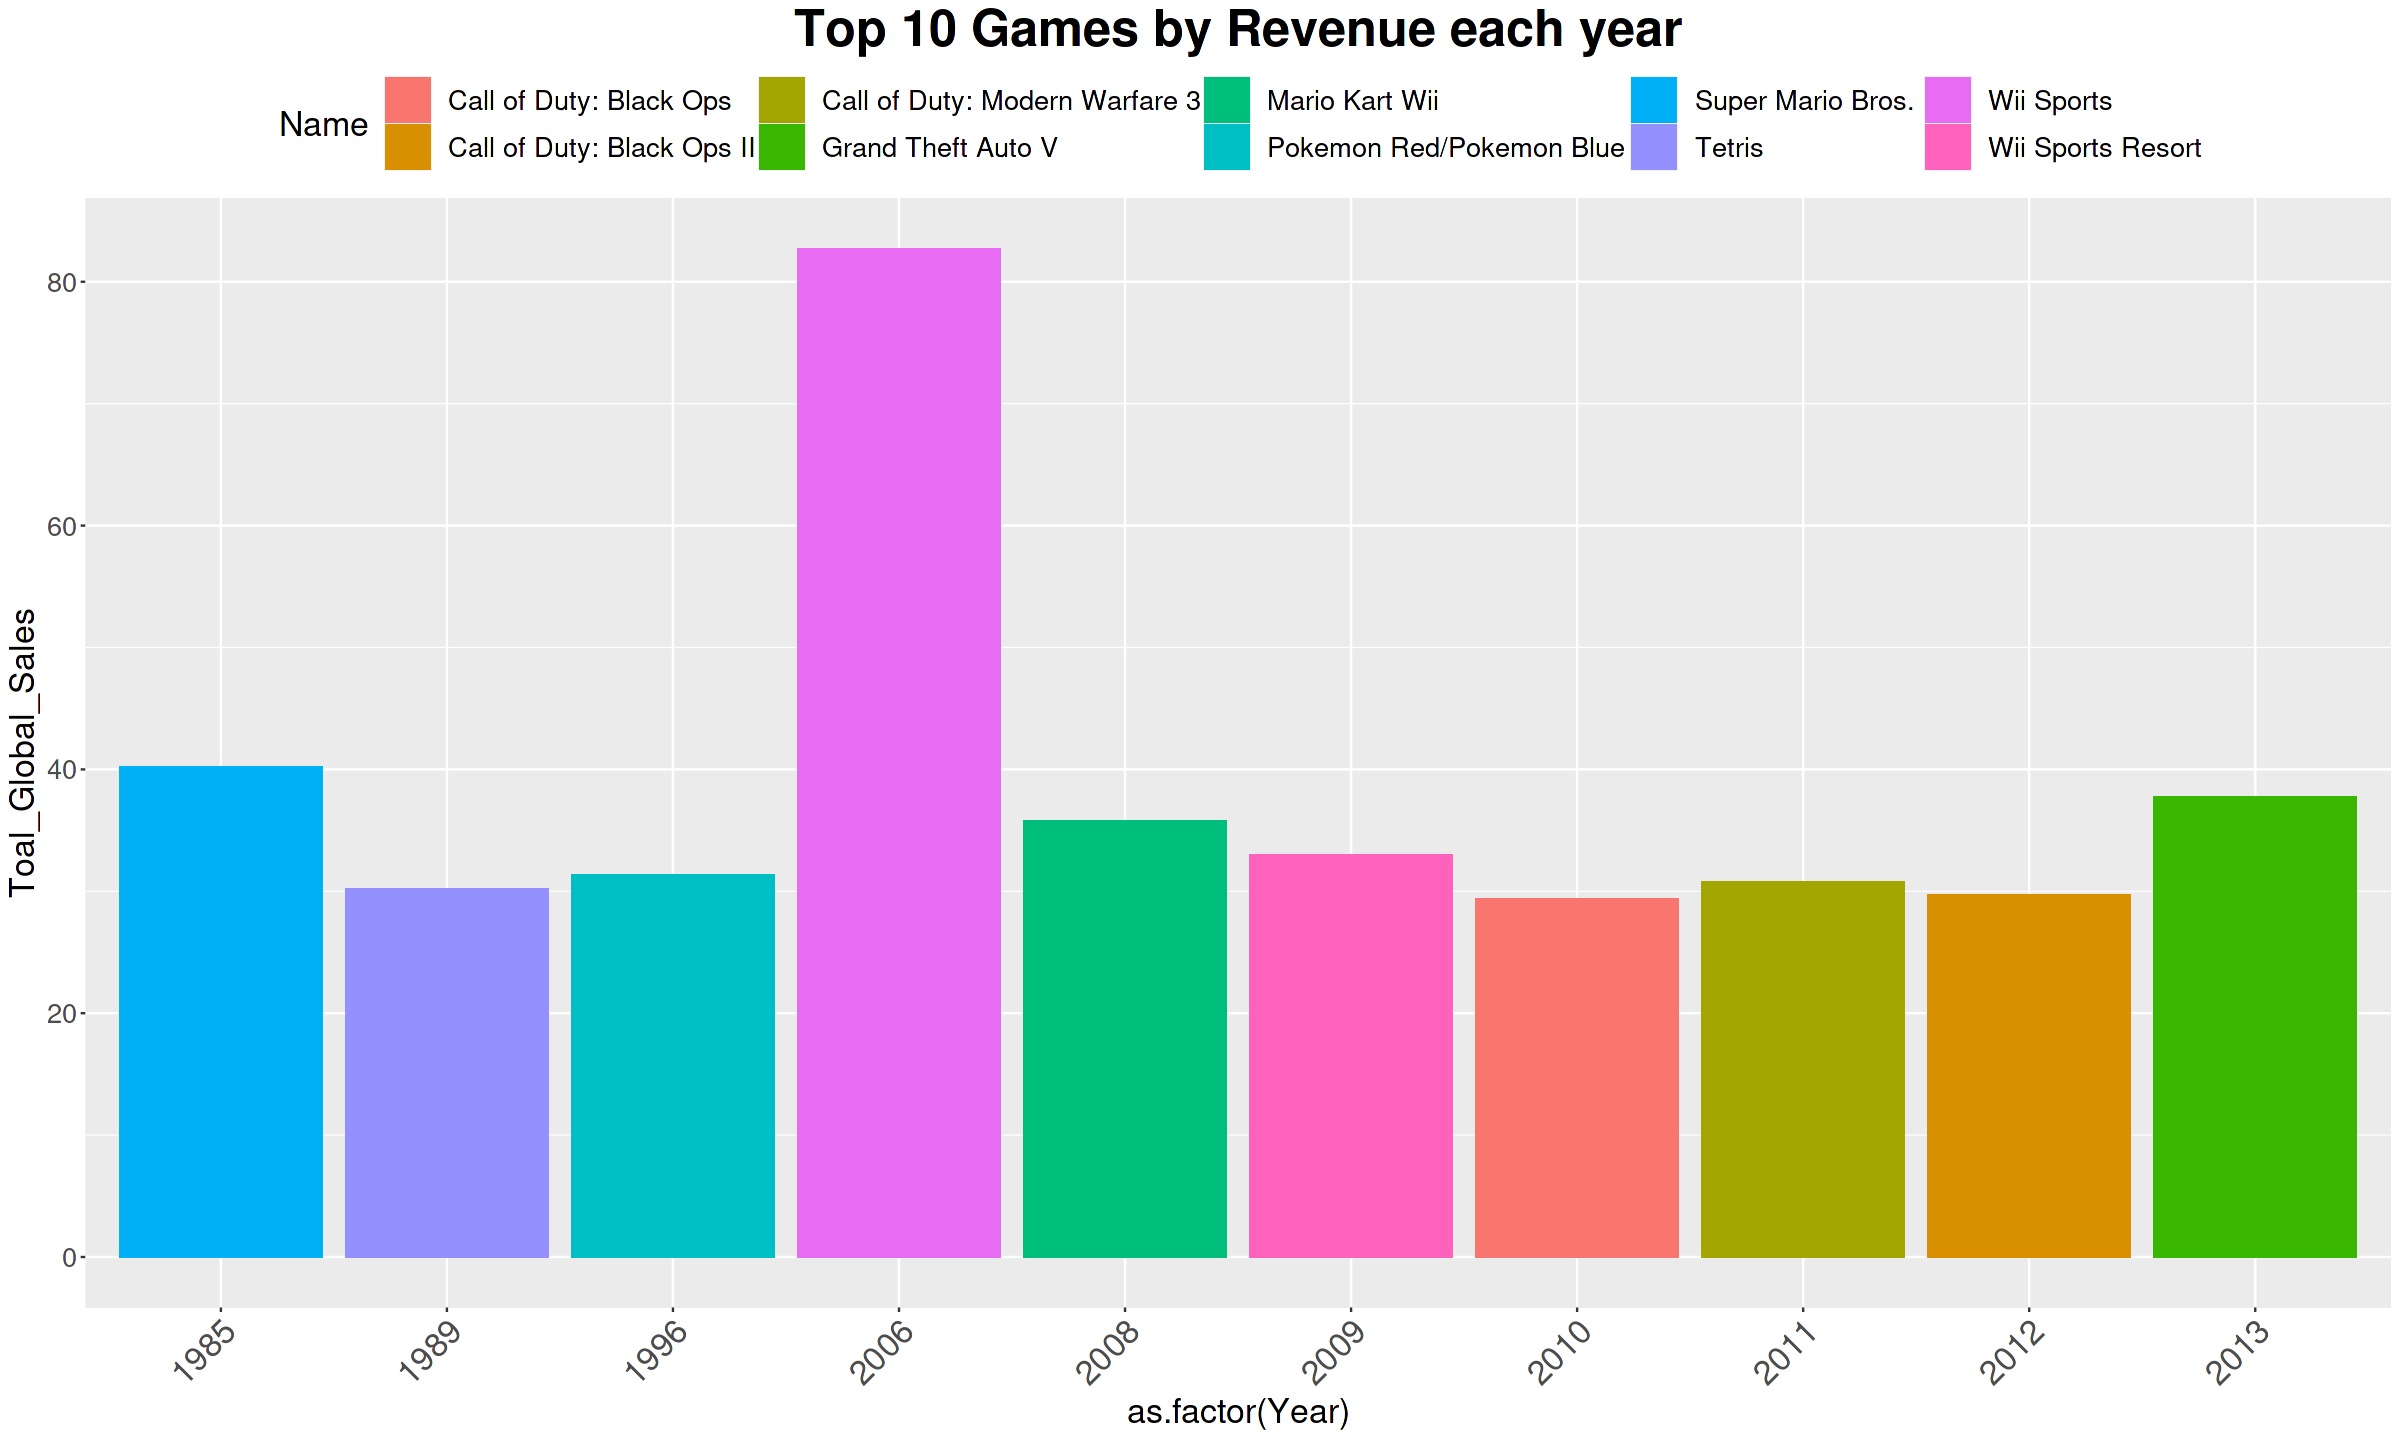

In [ ]:
#Top 10 game by Revenue in each year

arrange_by_Year_and_Name=game %>%
  group_by(Year, Name) %>%
  summarize(Toal_Global_Sales = sum(Global_Sales)) %>%
  arrange(desc(Toal_Global_Sales)) %>%
  top_n(1)
top10_revenue_by_Year_and_Name=arrange_by_Year_and_Name[1:10,]
ggplot(top10_revenue_by_Year_and_Name,aes(x=as.factor(Year),Toal_Global_Sales,fill=Name))+
  geom_bar(stat = "identity")+
  ggtitle("Top 10 Games by Revenue each year") +
   theme(axis.text.x = element_text(size=20,angle=45,hjust=1),
      plot.title = element_text(size=30,face="bold",hjust = 0.5),     
        text = element_text(size = 20),
        legend.key.size = unit(1, 'cm'),
      legend.position = "top")

Wii Sports is the top performer on 2006 and it generates the revenue globally 82.74 million dollars followed by Super Mario Bros (In 1985 –  40.24m)andGrandTheftAutoV(In2013−  37.78 m).

## Analysis of Platform over the years

`summarise()` has grouped output by 'Platform'. You can override using the `.groups` argument.



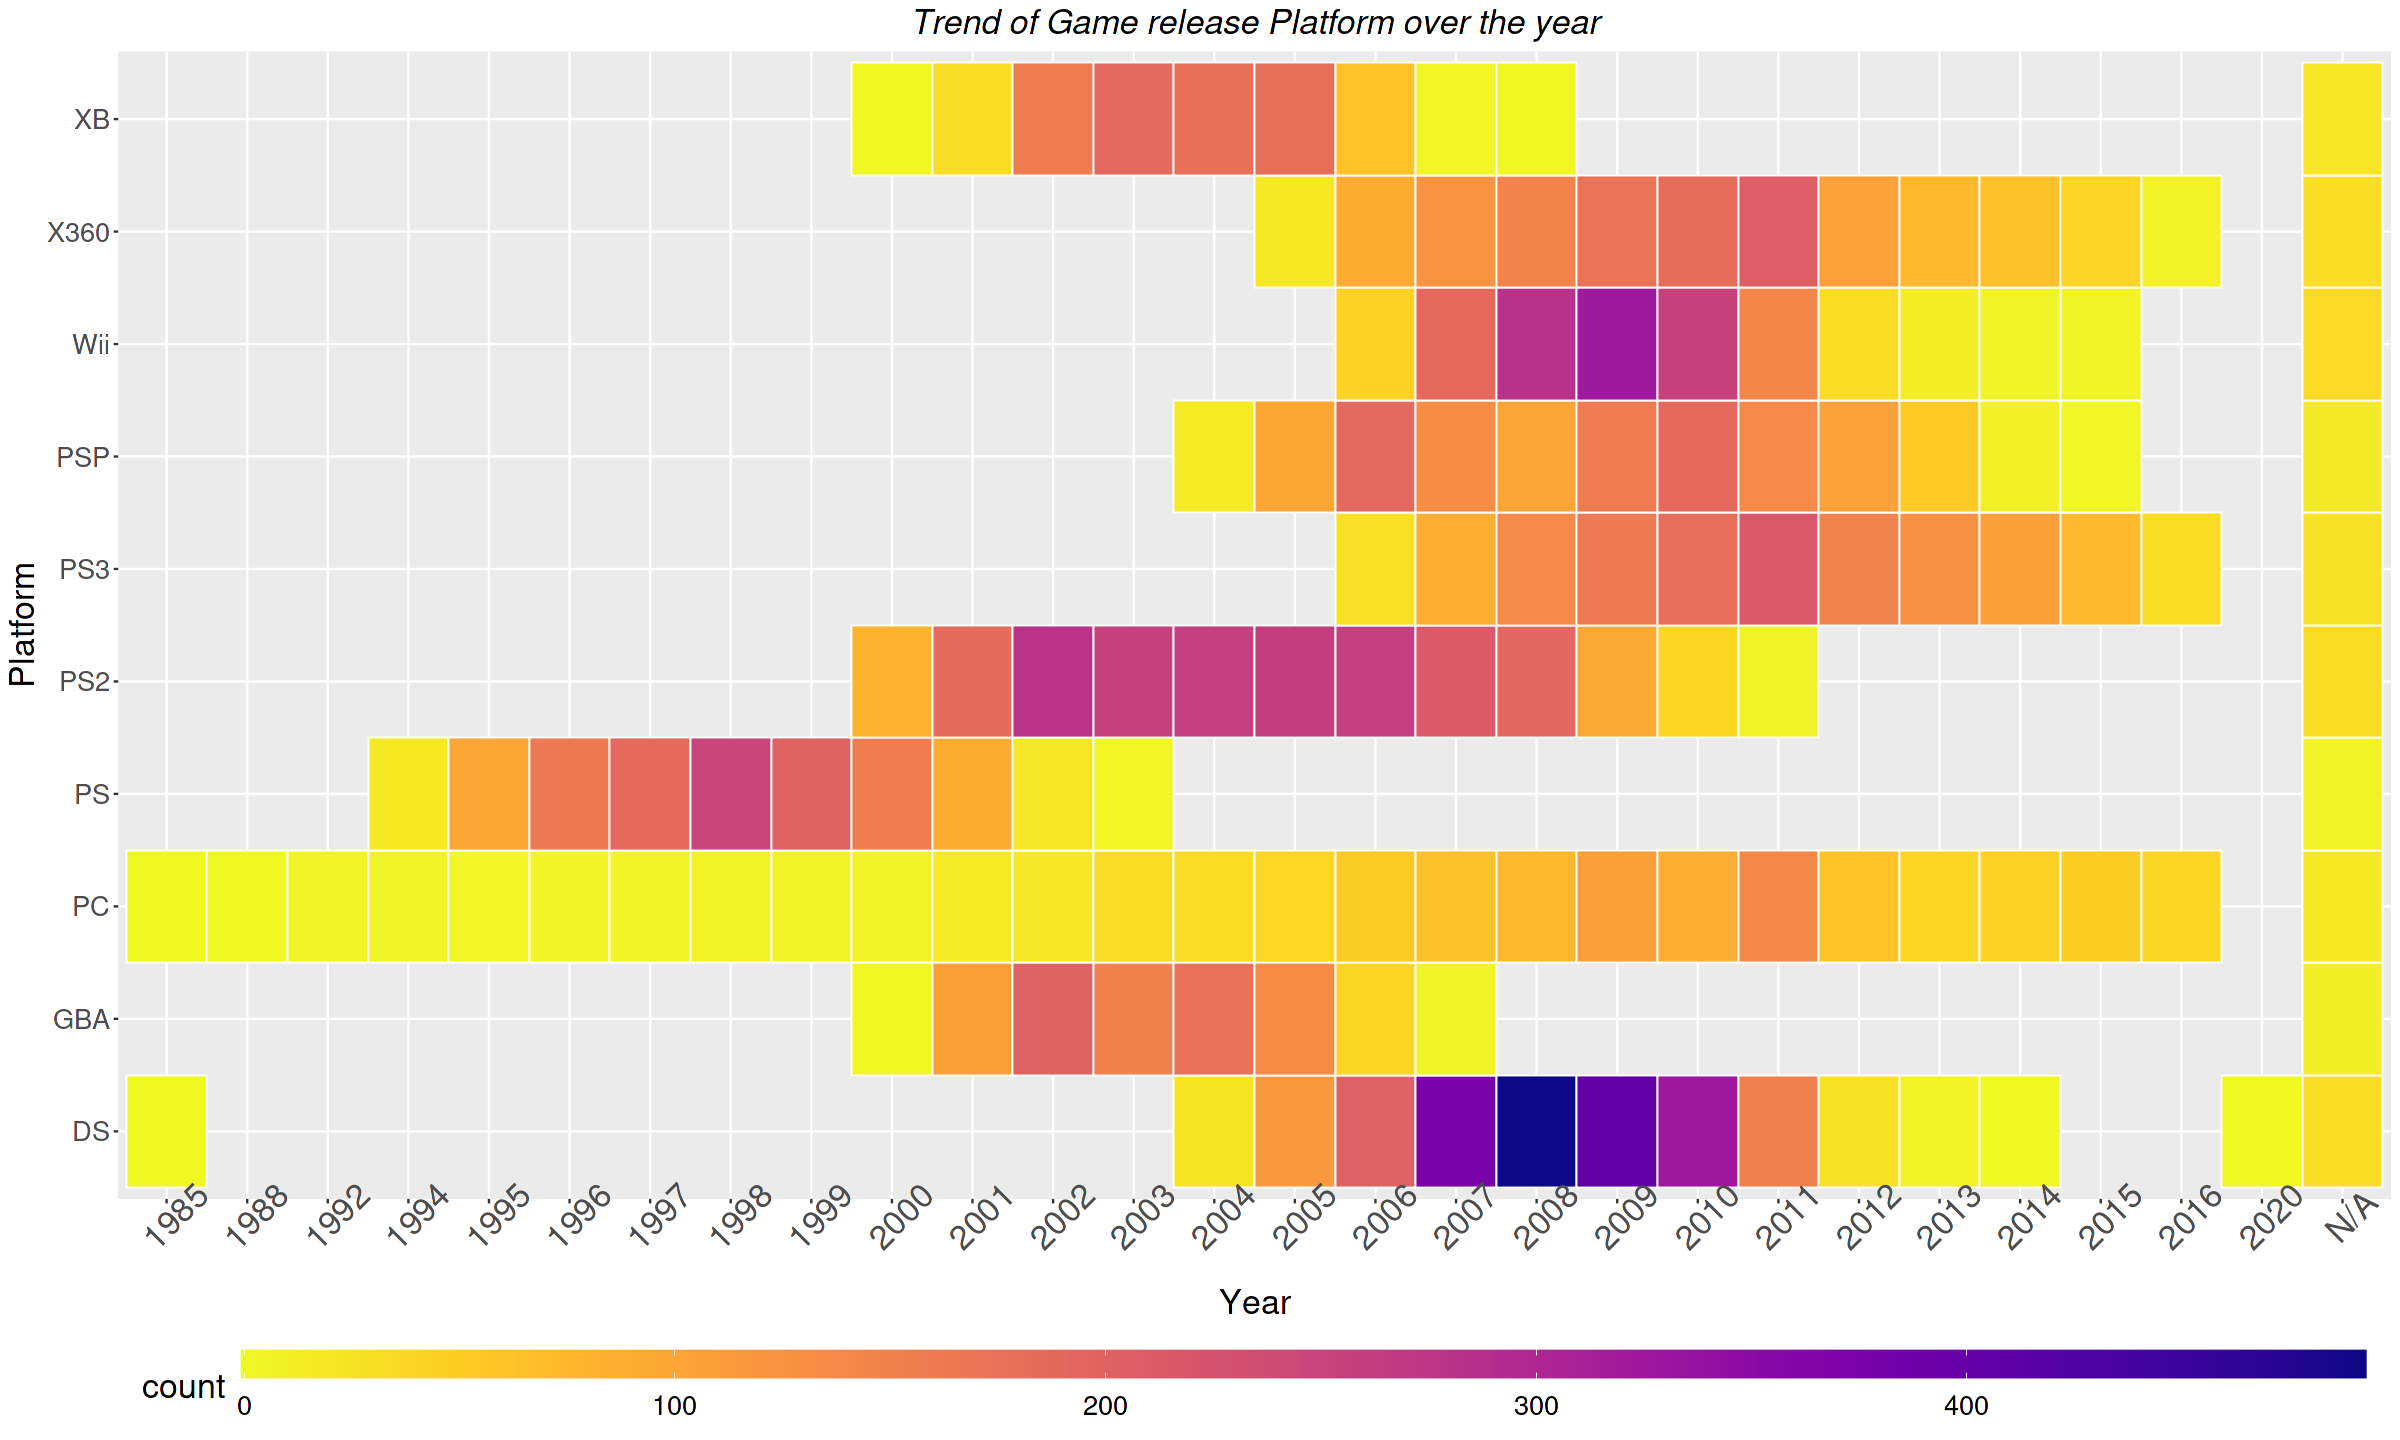

In [ ]:
top10platform=game %>% group_by(Platform) %>% summarise(count=n()) %>% arrange(desc(count)) %>% head(10)
temp=game[game$Platform %in% top10platform$Platform,]
temp = temp %>% group_by(Platform,Year) %>% summarize(count=n()) 
ggplot(temp,aes(Year,Platform,fill=count))+
geom_tile(color="white",size=0.4)+
theme(axis.text.x = element_text(size=20,angle=45,hjust=0.5),
      plot.title=element_text(size=20,hjust=0.5,face='italic'),
      legend.position="bottom",
      text = element_text(size = 20),
      strip.text = element_text(hjust = 0.01, 
        face = "bold", size = 14),
      legend.key.width = unit(9, "cm"))+
ggtitle("Trend of Game release Platform over the year")+
scale_fill_viridis(
  name="count", 
  option = 'C', 
  direction = -1, 
  na.value = "grey",
  limits = c(0, max(temp$count)))

## Analysis of Publishers over the year

`summarise()` has grouped output by 'Publisher'. You can override using the `.groups` argument.



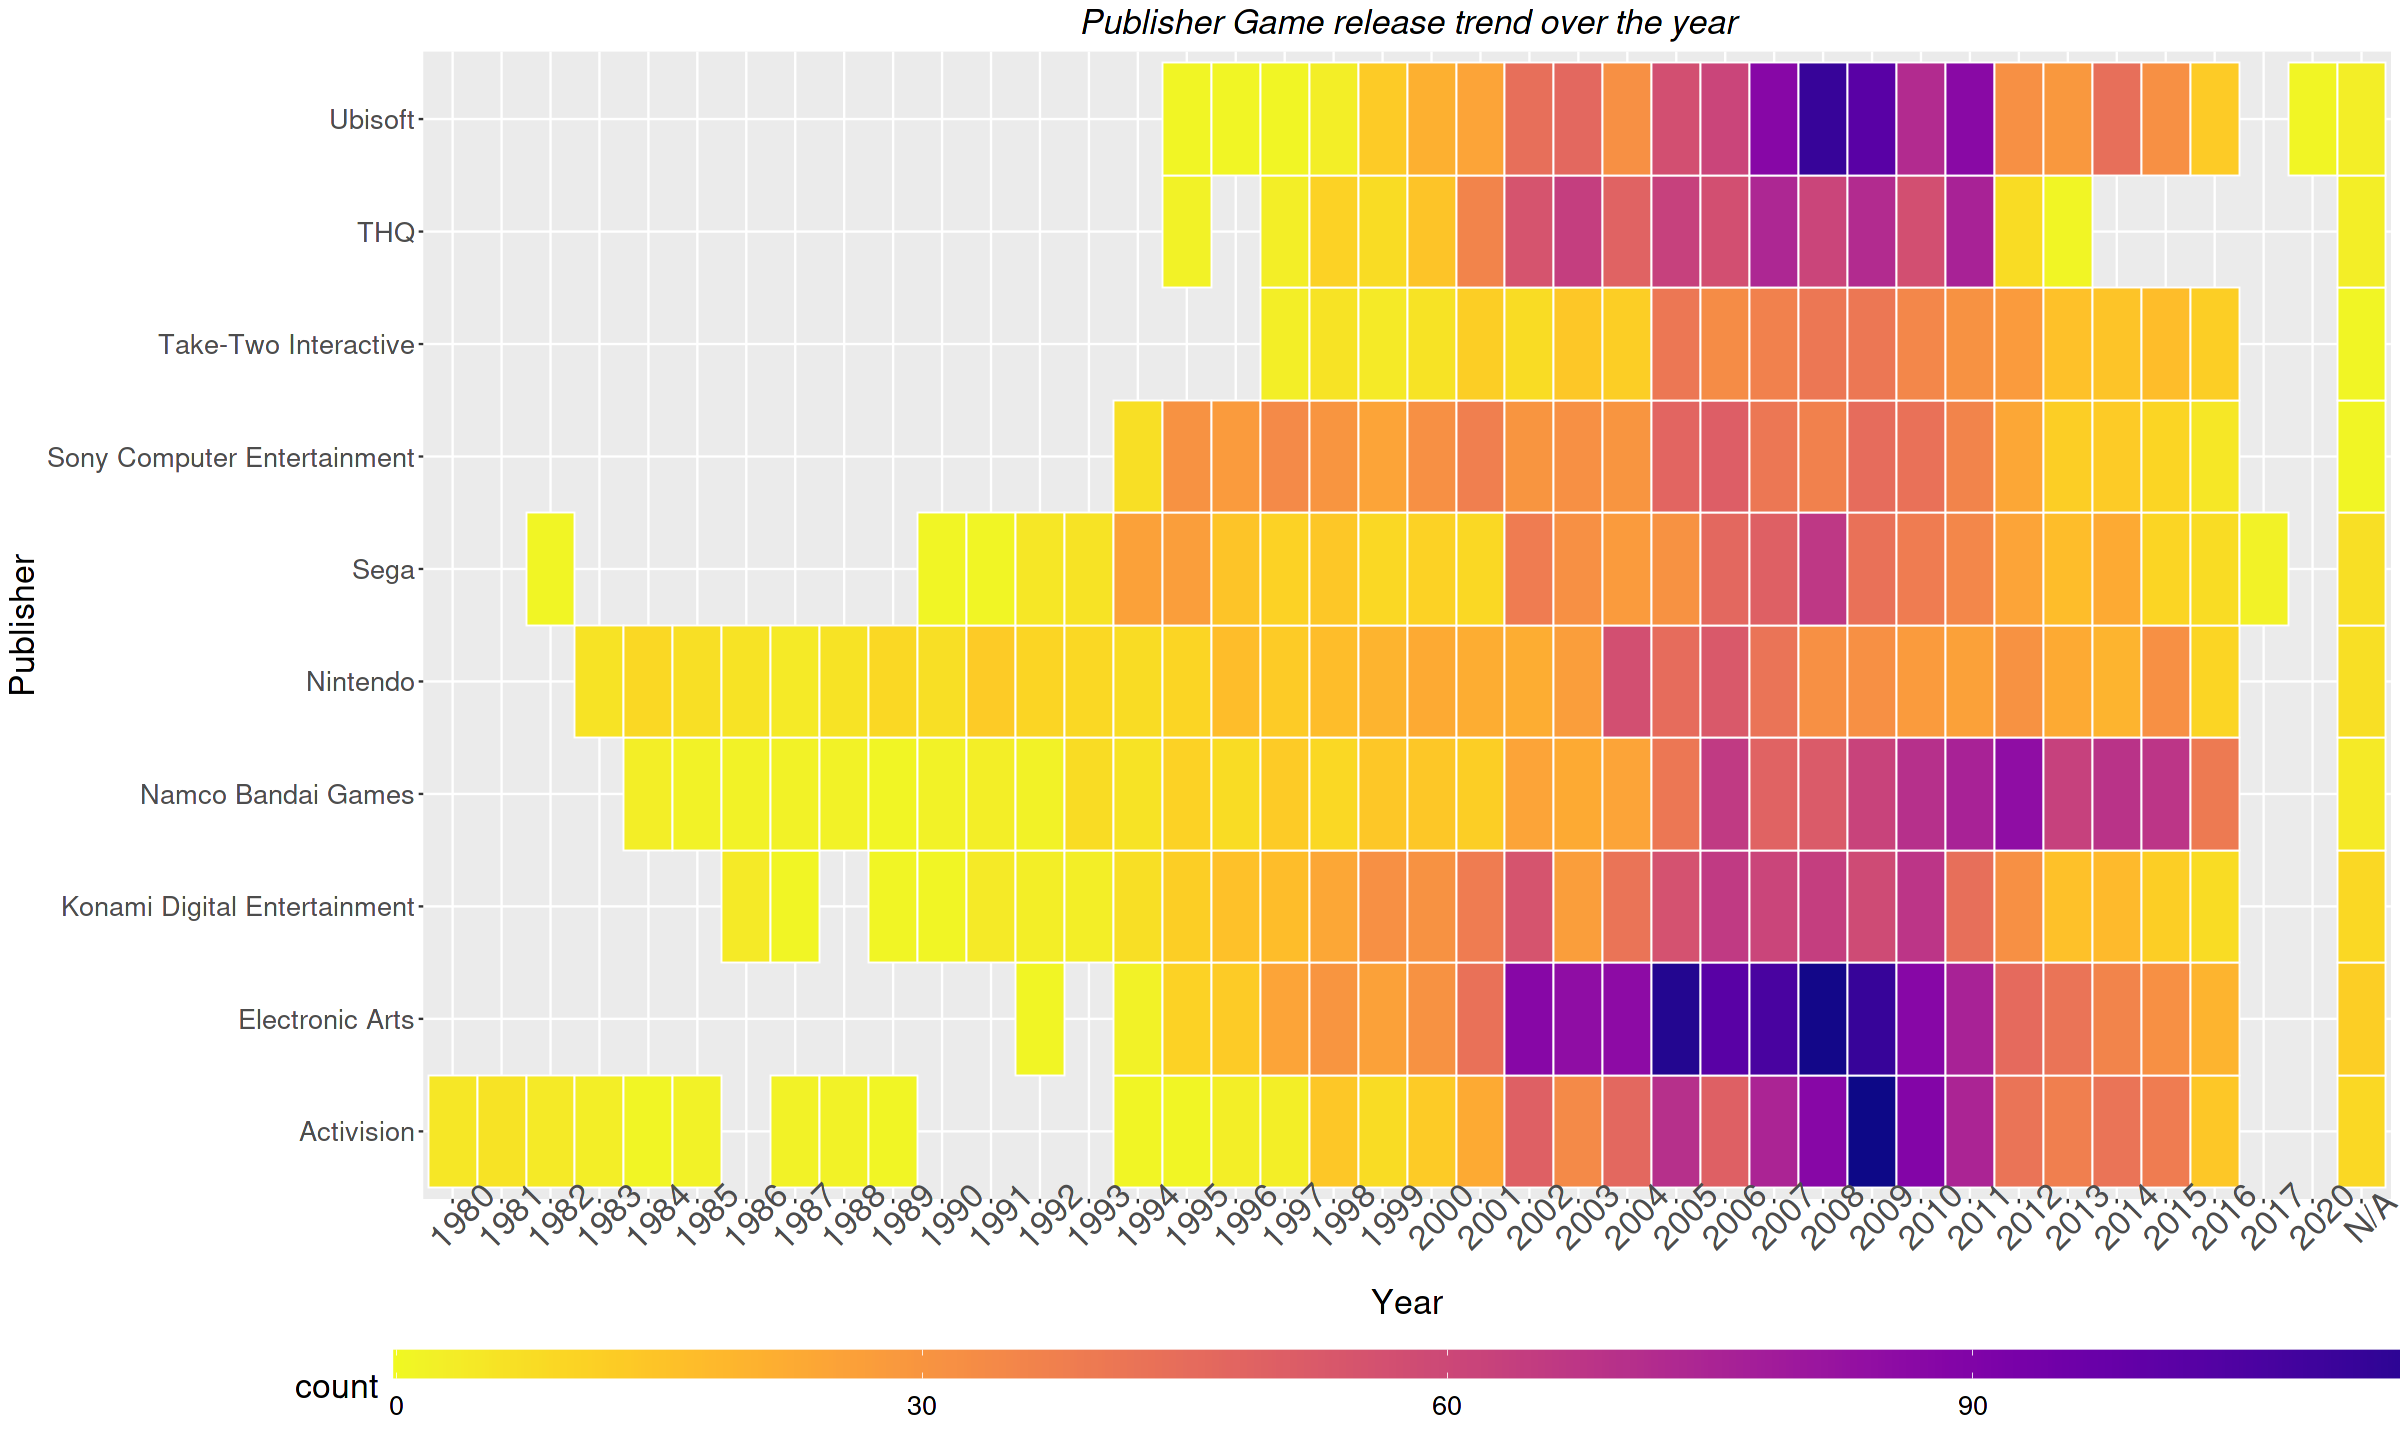

In [ ]:
top10pub=game %>% group_by(Publisher) %>% summarise(count=n()) %>% arrange(desc(count)) %>% head(10)
temp=game[game$Publisher %in% top10pub$Publisher,]
temp = temp %>% group_by(Publisher,Year) %>% summarize(count=n()) 
ggplot(temp,aes(Year,Publisher,fill=count))+
geom_tile(color="white",size=0.4)+
theme(axis.text.x = element_text(size=20,angle=45,hjust=0.5),
      plot.title=element_text(size=20,hjust=0.5,face='italic'),
      legend.position="bottom",
      text = element_text(size = 20),
      strip.text = element_text(hjust = 0.01, 
        face = "bold", size = 14),
      legend.key.width = unit(9, "cm"))+
ggtitle("Publisher Game release trend over the year")+
scale_fill_viridis(
  name="count", 
  option = 'C', 
  direction = -1, 
  na.value = "white",
  limits = c(0, max(temp$count)))

## Does higher game release indicate higher revenue ?

ERROR: Error in +labs(title = "Number of Games Vs Total Sales", col = "Publisher"): invalid argument to unary operator


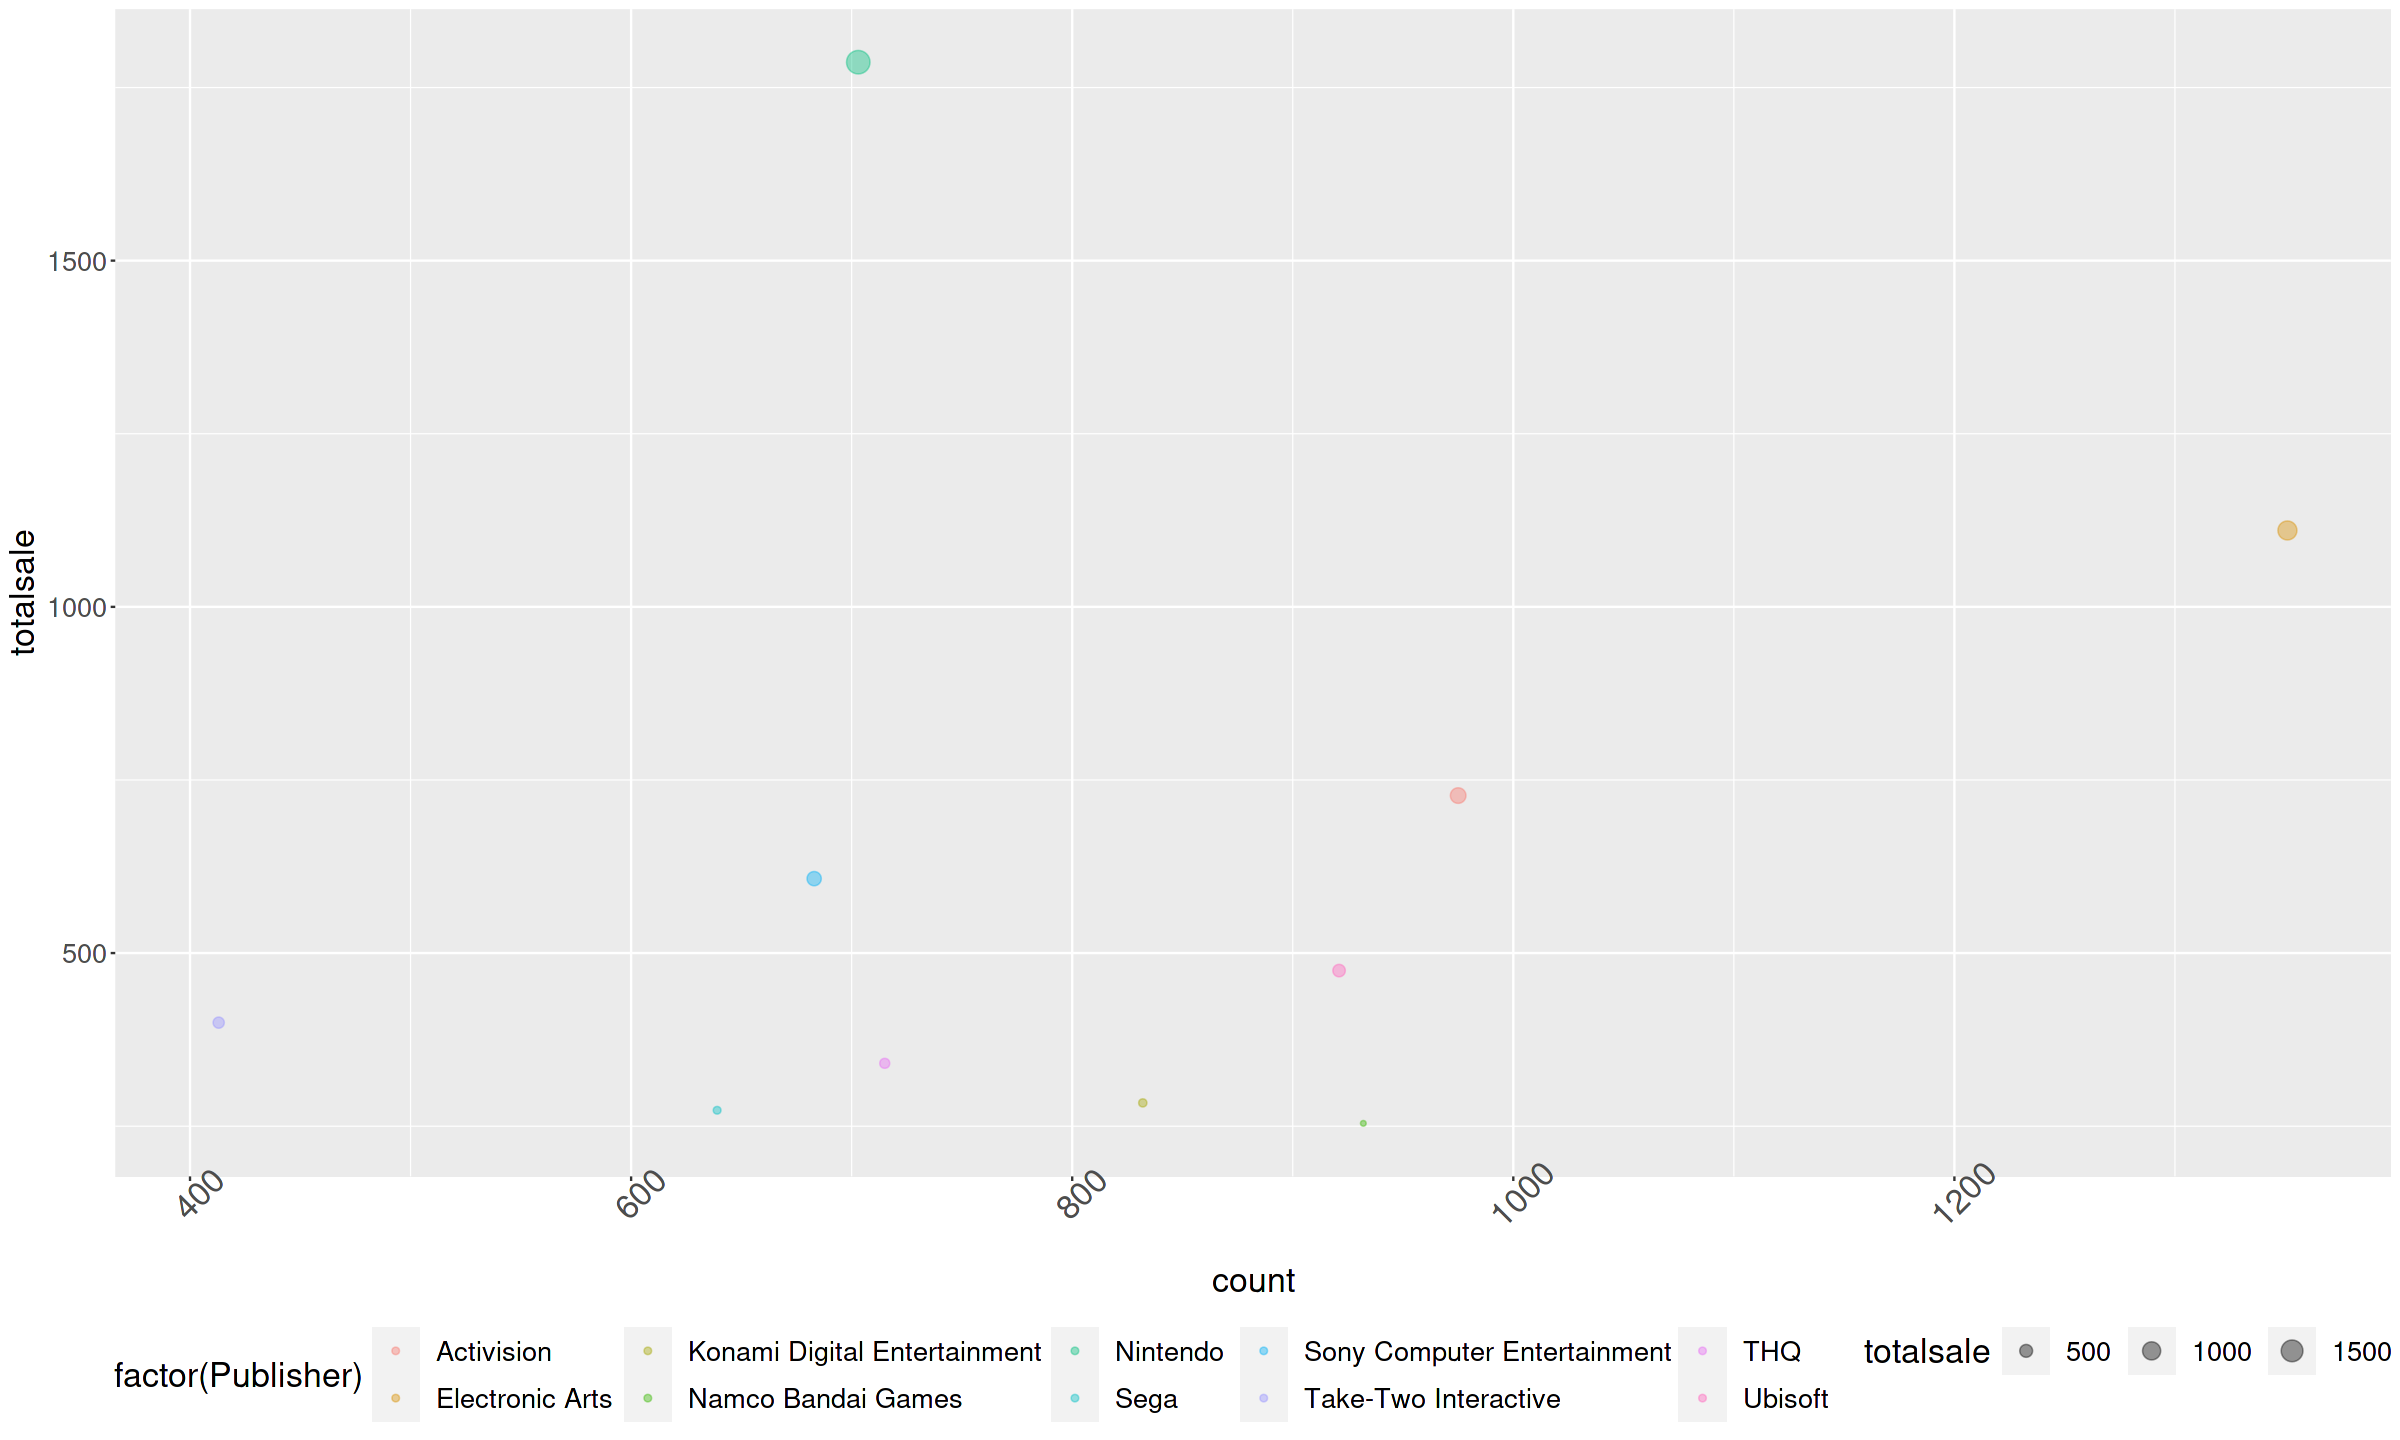

In [ ]:
temp= game[game$Publisher %in% top10pub$Publisher,]
temp = temp %>% group_by(Publisher) %>% summarise(totalsale=sum(Global_Sales)) %>% arrange(desc(totalsale))
temp = merge(top10pub,temp,by="Publisher")
ggplot(temp,aes(x=count,y=totalsale,col=factor(Publisher),size=totalsale))+
geom_point(alpha=0.4)+
theme(axis.text.x = element_text(size=20,angle=45,hjust=0.5),
      plot.title=element_text(size=20,hjust=0.5,face='bold'),
      legend.position="bottom",
      text = element_text(size = 20),
      strip.text = element_text(hjust = 0.01, 
        face = "bold", size = 14),
      legend.key.size = unit(1, "cm"))
+labs(title="Number of Games Vs Total Sales",col="Publisher")

## Correlation of the sales Factor

In [ ]:
#Correlation of the sales Factor
num_Sales=game[,c("NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales")]
cor(num_Sales)

NA_Sales  EU_Sales  JP_Sales  Other_Sales Global_Sales
NA_Sales     1.0000000 0.7677267 0.4497874 0.6347373   0.9410474   
EU_Sales     0.7677267 1.0000000 0.4355845 0.7263849   0.9028358   
JP_Sales     0.4497874 0.4355845 1.0000000 0.2901862   0.6118155   
Other_Sales  0.6347373 0.7263849 0.2901862 1.0000000   0.7483308   
Global_Sales 0.9410474 0.9028358 0.6118155 0.7483308   1.0000000

From the correlation table it is observed that the NA_Sales (0.94), EU_Sales (0.9) and Other_Sales (0.75) are highly positive correlated with the Global_Sales. Although Global_Sales is correlated with the all Sales regions.

In [ ]:
game$Name=as.factor(as.character(game$Name))
game$Platform=as.factor(as.character(game$Platform))
game$Year=as.numeric(as.character(game$Year))
game$Genre=as.factor(as.character(game$Genre))
game$Publisher=as.factor(as.character(game$Publisher))
max(game$Year,na.rm=T)

[1] 2020

## Prediction : SVM

In [ ]:
# Prediction : Support Vector Machines
train =( Year <= 2012)
game.train=game[train,]
game.test = game[!train,]
# Linear classification
y.train=ifelse(game.train$Global_Sales>10.0,1,-1)
dat=data.frame(x=game.train$NA_Sales+game.train$EU_Sales, y=as.factor(y.train))
svmfit=svm(y~., data=dat, kernel="linear", cost=10,scale=FALSE)
#summary(svmfit)
table(Model=svmfit$fitted , Truth=dat$y)
cat("Model Error = ", mean(svmfit$fitted!=dat$y)*100,"%")
y.test=ifelse(game.test$Global_Sales>10.0,1,-1)
dat.te=data.frame(x=game.test$NA_Sales+game.test$EU_Sales, y=as.factor(y.test))
pred.te=predict(svmfit, newdata=dat.te)
table(Predict=pred.te, Truth=dat.te$y)
cat("Prediction Error = ", mean(pred.te!=dat.te$y)*100,"%")

     Truth
Model    -1     1
   -1 14144     5
   1      6    50

Model Error =  0.07743752 %

       Truth
Predict   -1    1
     -1 2078    1
     1     1    6

Prediction Error =  0.09587728 %

SVM Linear - Prediction error of Global Sales will more than 10 million dollar, using North American Sales and European Sales data is 0.096%

## Radial classification

In [ ]:
# Radial classification
svmfit=svm(y~., data=dat, kernel="radial", cost=10, gamma=1)
table(Model=svmfit$fitted , Truth=dat$y)
cat("Model Error = ", mean(svmfit$fitted!=dat$y)*100,"%")
y.test=ifelse(game.test$Global_Sales>10.0,1,-1)
dat.te=data.frame(x=game.test$NA_Sales+game.test$EU_Sales, y=as.factor(y.test))
pred.te=predict(svmfit, newdata=dat.te)
table(predict=pred.te, truth=dat.te$y)
cat("Prediction Error = ", mean(pred.te!=dat.te$y)*100,"%")

     Truth
Model    -1     1
   -1 14144     4
   1      6    51

Model Error =  0.07039775 %

       truth
predict   -1    1
     -1 2078    1
     1     1    6

Prediction Error =  0.09587728 %

SVM Radial Classification - Prediction error of Global Sales will more than 10 million dollar, using North American Sales and European Sales data is 0.096%